In [ ]:
# Testing for GPU availability
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kagglenew"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:


#changing the working directory
%cd /content/gdrive/My Drive/kagglenew
#Check the present working directory using pwd command

/content/gdrive/My Drive/kagglenew


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=998731f062b06317462465b4addcbd4974751c76e7bf9309d109afc15956bdc6
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

  0% 0.00/223k [00:00<?, ?B/s]
100% 223k/223k [00:00<00:00, 28.6MB/s]
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 28.7MB/s]
  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 30.4MB/s]
  0% 0.00/926k [00:00<?, ?B/s]
100% 926k/926k [00:00<00:00, 61.6MB/s]
  0% 0.00/209k [00:00<?, ?B/s]
100% 209k/209k [00:00<00:00, 29.1MB/s]
  0% 0.00/221k [00:00<?, ?B/s]
100% 221k/221k [00:00<00:00, 30.0MB/s]
  0% 0.00/219k [00:00<?, ?B/s]
100% 219k/219k [00:00<00:00, 30.7MB/s]
  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 31.4MB/s]
  0% 0.00/982k [00:00<?, ?B/s]
100% 982k/982k [00:00<00:00, 65.9MB/s]
  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 7.33MB/s]
  0% 0.00/198k [00:00<?, ?B/s]
100% 198k/198k [00:00<00:00, 26.9MB/s]
  0% 0.00/5.01M [00:00<?, ?B/s]
100% 5.01M/5.01M [00:00<00:00, 46.1MB/s]
  0% 0.00/241k [00:00<?, ?B/s]
100% 241k/241k [00:00<00:00, 32.2MB/s]
  0% 0.00/2.14M [00:00<?, ?B/s]
100% 2.14M/2.14M [00:00<00:00, 114MB/s]
  0% 0.00/229k 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob #deal with paths
import os #deal with paths
import cv2 #deal with images
from skimage.io import imread #read images from files
import matplotlib.pyplot as plt #make plots
import seaborn as sb #pretty plots :P 
%matplotlib inline 

In [ ]:
!ls

0005cfc8afb6.png      00cb6555d108.png.zip  01c31b10ab99.png.zip
000c1434d8d7.png.zip  00cc2b75cddd.png	    01c5ba195207.png
001639a390f0.png.zip  00e4ddff966a.png.zip  01e4d86b3a30.png
0024cdab0c1e.png.zip  00f6c1be5a33.png	    020921b796d5.png
002c21358ce6.png      0104b032c141.png.zip  020f6983114d.png.zip
003f0afdcd15.png      010d915e229a.png.zip  021c207614d6.png.zip
005b95c28852.png.zip  0111b949947e.png	    0229c0a80d42.png
006efc72b638.png      0124dffecf29.png.zip  024d0a225db1.png
00836aaacf06.png      0125fbd2e791.png	    0268f4382c67.png
0083ee8054ee.png.zip  012a242ac6ff.png.zip  0299d97f31f7.png
009245722fa4.png      014508ccb9cb.png	    kaggle.json
0097f532ac9f.png.zip  01499815e469.png	    sample_submission.csv
009c019a7309.png      0151781fe50b.png.zip  test.csv
00a8624548a9.png.zip  0161338f53cc.png.zip  train.csv
00b74780d31d.png.zip  0167076e7089.png


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  input1.zip
  inflating: 2016.04C.multisnr.pkl   
replace RML2016.10a_dict.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: RML2016.10a_dict.pkl    y



In [ ]:
# The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:

from pathlib import Path
dset = Path("RML2016.10a.tar.bz2")

# Check if the File Exists

if(not dset.is_file()):
    import urllib.request
    urllib.request.urlretrieve('http://opendata.deepsig.io/datasets/2016.10/RML2016.10a.tar.bz2', 'RML2016.10a.tar.bz2')

In [ ]:
# Decompress the RML2016.10a.tar.bz2 file into RML2016.10a.tar file

# Note: If the RML2016.10a.tar file exists, then this operation is skipped.

import sys
import os
import bz2

tarfile = Path("RML2016.10a.tar")

# Check if the Tar File Exists

if(not tarfile.is_file()):
    zipfile = bz2.BZ2File('./RML2016.10a.tar.bz2') # open the file
    data = zipfile.read() # get the decompressed data
    #write the .tar file
    open('./RML2016.10a.tar', 'wb').write(data) # write a uncompressed fil

In [ ]:

# Extract the .tar file to get RML2016.10a_dict.pkl

# Note: If the RML2016.10a.tar file exists, then this operation is skipped.

import tarfile

pklFile = Path("RML2016.10a_dict.pkl")

# Check if the pkl File Exists

if(not pklFile.is_file()):
    my_tar = tarfile.open('./RML2016.10a.tar')
    my_tar.extractall('./') # specify which folder to extract to
    my_tar.close()

NameError: ignored

In [ ]:

# Extract the pickle file
import pickle
import numpy as np
Xd = pickle.load(open("RML2016.10a_dict.pkl",'rb'),encoding="bytes")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [ ]:
%matplotlib inline
import os
import random
import tensorflow.keras.utils
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, LayerNormalization
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import numpy as np

In [ ]:
random.seed(777)     # To ensure that the dataset is split in a deterministic way.
np.random.seed(777)  # To ensure that the dataset is split in a deterministic way.

# This section of the code shuffles and splits the into Training, Testing and Validation Sets.

index = np.arange(0,220000)
random.shuffle(index)

trainIdx = index[0:110000]
testIdx = index[110000:220000]

trainX = X[trainIdx]

# Create Validation Data Set
indexVal = np.arange(0,110000)
random.shuffle(indexVal)

realTrainIdx = indexVal[0:99000] 
valIdx = indexVal[99000:110000]

# Actual Training Data
realTrainX = trainX[realTrainIdx]
X_train = np.expand_dims(realTrainX, axis=-1) # Training Set Input

# Actual Validation Data
validX = trainX[valIdx]
X_valid = np.expand_dims(validX, axis=-1) # Validation Set Input

# Actual Testing Data
testX = X[testIdx]
X_test = np.expand_dims(testX, axis=-1) # Test Set Input

# This Section of the code Prepapres labels Using One-Hot Encoding

# One Hot Encode Labels
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.asarray(lbl)[:,0])
print(lb.classes_)
lbl_encoded=lb.transform(np.asarray(lbl)[:,0])
ytrain=lbl_encoded[trainIdx]

# Labels for Training Data
y_train = ytrain[realTrainIdx] # Training Set Labels

# Labels for Validation Data 
y_valid = ytrain[valIdx] # Validation Set Labels

# Labels for Testing Data
y_test=lbl_encoded[testIdx] # Test Set Labels

[b'8PSK' b'AM-DSB' b'AM-SSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16'
 b'QAM64' b'QPSK' b'WBFM']


In [ ]:
# Network Design Parameters

# Network Parameters
dropoutRate = 0.5

# Structure
inpShape = (2,128,1) # Shape of Input Data
CNN1_numFilt = 64 # Number of Filters in CNN Layer 1
CNN1_kernSize = (1,3) # Kernel Size of CNN Layer 1

CNN2_numFilt = 64 # Number of Filters in CNN Layer 2
CNN2_kernSize = (1,3) # Kernel Size of CNN Layer 2

CNN3_numFilt = 128 # Number of Filters in CNN Layer 3
CNN3_kernSize = (1,3) # Kernel Size of CNN Layer 3

CNN4_numFilt = 128 # Number of Filters in CNN Layer 4
CNN4_kernSize = (1,3) # Kernel Size of CNN Layer 4

Dense1_numNeurons = 128 # Number of Nodes in the First Fully Connected Layer
numOutput = 11 # Number of Output Nodes

# Activation Functions
activationHidden = 'relu'
activationOutput = 'softmax'

# Loss Function
lossFunction = 'categorical_crossentropy'

# Learning Algorithm
netOptimizer = 'adam'

# Callbacks
callbackList = [
        tensorflow.keras.callbacks.ModelCheckpoint('CNN-Weights_best.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=0, mode='auto')]

# Construct Network
model = models.Sequential()
model.add(Convolution2D(filters=CNN1_numFilt, kernel_size=CNN1_kernSize,input_shape=inpShape, padding='same', activation=activationHidden, name='Conv_1'))

model.add(Dropout(dropoutRate))

model.add(Convolution2D(filters=CNN2_numFilt, kernel_size=CNN2_kernSize,padding='same', activation=activationHidden, name='Conv_2'))
model.add(MaxPooling2D(pool_size=(1,2),padding='same'))
model.add(Dropout(dropoutRate))

model.add(Convolution2D(filters=CNN3_numFilt, kernel_size=CNN3_kernSize,padding='same', activation=activationHidden, name='Conv_3'))




model.add(Dropout(dropoutRate))








model.add(Flatten())
model.add(Dense(Dense1_numNeurons, activation=activationHidden))
model.add(Dense(numOutput, activation=activationOutput))
model.compile(loss=lossFunction, optimizer=netOptimizer,metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 2, 128, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 128, 64)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 2, 128, 64)        12352     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 64, 64)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 64, 64)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 2, 64, 128)        24704     
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 64, 128)       

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:


# Train Model
history = model.fit(X_train,y_train,epochs=50,batch_size=1024,validation_data=(X_valid,y_valid),verbose=2)

Epoch 1/50
97/97 - 8s - loss: 2.2484 - accuracy: 0.1778 - val_loss: 2.0415 - val_accuracy: 0.2642
Epoch 2/50
97/97 - 8s - loss: 1.9315 - accuracy: 0.2805 - val_loss: 1.8261 - val_accuracy: 0.3075
Epoch 3/50
97/97 - 8s - loss: 1.7738 - accuracy: 0.3280 - val_loss: 1.7093 - val_accuracy: 0.3550
Epoch 4/50
97/97 - 8s - loss: 1.6296 - accuracy: 0.3916 - val_loss: 1.6234 - val_accuracy: 0.3949
Epoch 5/50
97/97 - 8s - loss: 1.5535 - accuracy: 0.4195 - val_loss: 1.5683 - val_accuracy: 0.4069
Epoch 6/50
97/97 - 8s - loss: 1.5151 - accuracy: 0.4316 - val_loss: 1.5626 - val_accuracy: 0.4135
Epoch 7/50
97/97 - 8s - loss: 1.4878 - accuracy: 0.4391 - val_loss: 1.5545 - val_accuracy: 0.4176
Epoch 8/50
97/97 - 8s - loss: 1.4716 - accuracy: 0.4451 - val_loss: 1.5092 - val_accuracy: 0.4269
Epoch 9/50
97/97 - 8s - loss: 1.4511 - accuracy: 0.4536 - val_loss: 1.5183 - val_accuracy: 0.4257
Epoch 10/50
97/97 - 8s - loss: 1.4371 - accuracy: 0.4597 - val_loss: 1.4532 - val_accuracy: 0.4515
Epoch 11/50
97/97 -

In [ ]:

# Backup History for Plotting Outputs

np_loss_history = np.array(history.history["loss"])
np.save('CNN-lossHist.npy',np_loss_history)

np_accu_history = np.array(history.history["categorical_accuracy"])
np.save('CNN-accuHist.npy',np_accu_history)

np_val_loss_history = np.array(history.history["val_loss"])
np.save('CNN-valLossHist.npy',np_val_loss_history)

np_val_accu_history = np.array(history.history["val_categorical_accuracy"])
np.save('CNN-valAccuHist.npy',np_val_accu_history)

KeyError: ignored

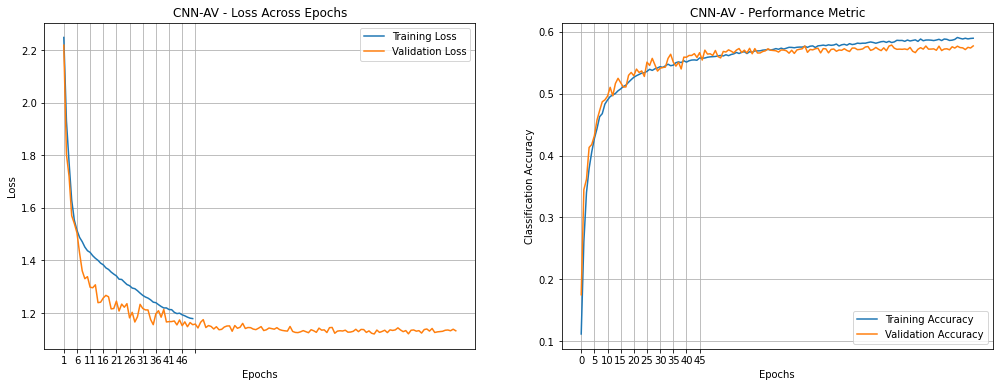

In [ ]:
# Plots The Loss and Acuracy Curves from Testing
# Load Recently Backed-Up Details of History
lHistCNN = np.load('CNN-lossHist.npy')
aHistCNN = np.load('CNN-accuHist.npy')

vLHistCNN = np.load('CNN-valLossHist.npy')
vAHistCNN = np.load('CNN-valAccuHist.npy')

# Show loss curves 
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17, 6))
ax1.set_title('CNN-AV - Loss Across Epochs')
ax1.plot(lHistCNN, label='Training Loss')
ax1.plot(vLHistCNN, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_xticks(np.arange(0,len(lHistCNN)+1,5), minor=False)
ax1.set_xticklabels(np.arange(1,len(lHistCNN)+1,5), fontdict=None, minor=False)
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()
               
ax2.set_title('CNN-AV - Performance Metric')
ax2.plot(aHistCNN, label='Training Accuracy')
ax2.plot(vAHistCNN, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_xticks(np.arange(0,len(lHistCNN),5), minor=False)
ax2.set_xticklabels(np.arange(0,len(lHistCNN),5), fontdict=None, minor=False)
ax2.set_ylabel('Classification Accuracy')
ax2.grid()
ax2.legend(loc='lower right')

In [ ]:

# Re-load Best Weights from Training
model.load_weights('CNN-Weights_best.h5')

# Evaluate Test Dataset Using Trained DNN Model
model.evaluate(X_test,y_test)

ValueError: ignored

In [ ]:

# Helper Functions to Plot Confusion Matrix

# Function to Extract Test Data of Specific SNR
def extractTest(data,labels,labelsEncoded,testIndex,snr):
    testData = data[testIndex]
    labelArray = np.array([labels])
    testLabels = labelArray[:,testIdx,:]
    testLabelsEncoded = labelsEncoded[testIdx]
    
    idxOP = list()
    
    # Loop Through Label Array To Get Index of Specific SNR
    for i in range(0,testLabels.shape[1]):
        if testLabels[0,i,1].decode('ascii')==snr:
            idxOP.append(i)
    
    # Return Subset of Test Data and Corresponding Labels
    opTestData = np.expand_dims(testData[idxOP,:,:],axis=-1)
    opTestLabel = testLabelsEncoded[idxOP]
    
    return opTestData, opTestLabel

def plot_confusion_matrix(cm, titleAdd, title='CNN-AV Confusion matrix', cmap=plt.cm.Blues,normalize=normalize, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title+titleAdd)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion Matrix Function
def prepConfMat(testData,testLabel,predTestLabel,mods,title):
    modString = list()
    for i in range(0,len(mods)):
        modString.append(mods[i].decode('ascii'))
    
    conf = np.zeros([len(mods),len(mods)])
    confnorm = np.zeros([len(mods),len(mods)])
    for i in range(0,testData.shape[0]):
        j = list(testLabel[i,:]).index(1)
        k = int(np.argmax(predTestLabel[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(mods)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plot_confusion_matrix(confnorm, title, labels=modString)

NameError: ignored

In [ ]:

# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=1024)

prepConfMat(X_test,y_test,test_Y_hat,mods,' (All SNRs)')

NameError: ignored

In [ ]:
show_confusion_matrix(test_Y_hat, y_test)

ValueError: ignored

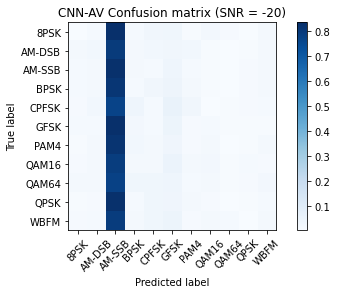

In [ ]:
snr = '-20' 
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

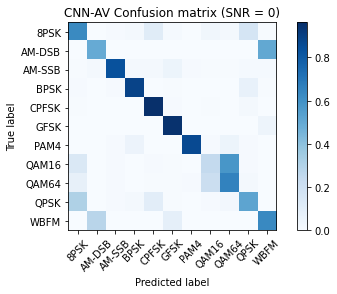

In [ ]:
# SNR Value Can be Changed to View Confusion Matrix at another SNR
snr = '0'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

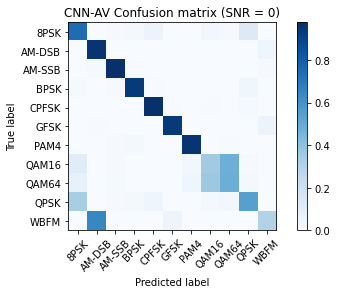

In [ ]:

# SNR Value Can be Changed to View Confusion Matrix at another SNR
snr = '0'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

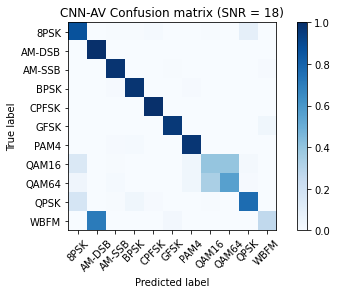

In [ ]:

# SNR Value Can be Changed to View Confusion Matrix at another SNR
snr = '18'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

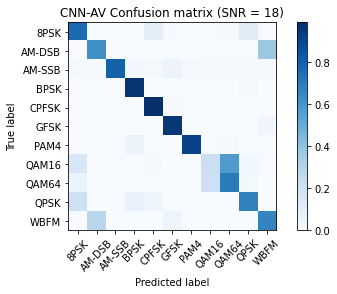

In [ ]:
# New 18
snr = '18'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

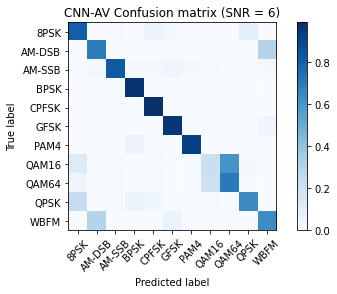

In [ ]:
# New 18
snr = '6'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

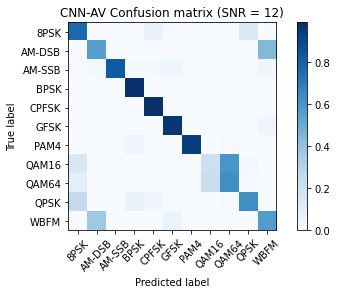

In [ ]:
# New 18
snr = '12'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

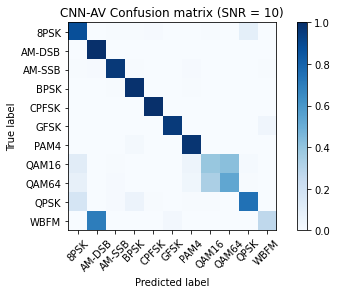

In [ ]:

# SNR Value Can be Changed to View Confusion Matrix at another SNR
snr = '10'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

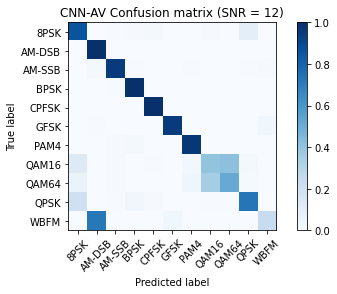

In [ ]:
# SNR Value Can be Changed to View Confusion Matrix at another SNR
snr = '12'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

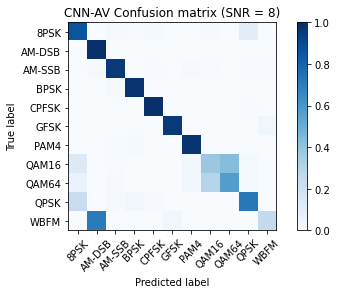

In [ ]:
snr = '8'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

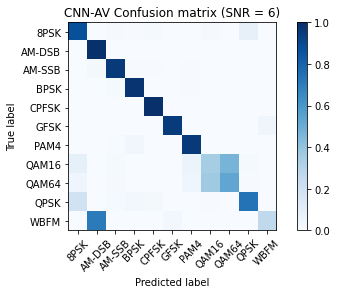

In [ ]:
snr = '6'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

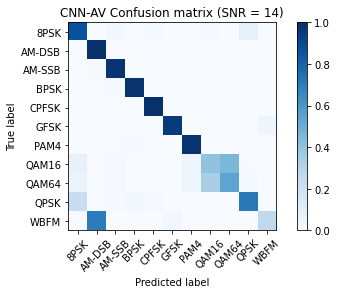

In [ ]:
snr = '14'
title = ' (SNR = '+snr+')'
x_testSNR, y_TestSNR = extractTest(X,lbl,lbl_encoded,testIdx,snr)
y_hat_snr = model.predict(x_testSNR, batch_size=1024)
prepConfMat(x_testSNR,y_TestSNR,y_hat_snr,mods,title)

Overall Accuracy:  0.09371057848260948 for SNR b'-20'
Overall Accuracy:  0.0944081336238199 for SNR b'-18'
Overall Accuracy:  0.09310407901957198 for SNR b'-16'
Overall Accuracy:  0.10781818181818181 for SNR b'-14'
Overall Accuracy:  0.15267038302463587 for SNR b'-12'
Overall Accuracy:  0.21616161616161617 for SNR b'-10'
Overall Accuracy:  0.3221110100090992 for SNR b'-8'
Overall Accuracy:  0.4658273381294964 for SNR b'-6'
Overall Accuracy:  0.5978400146439685 for SNR b'-4'
Overall Accuracy:  0.7100700848395426 for SNR b'-2'
Overall Accuracy:  0.7417146974063401 for SNR b'0'
Overall Accuracy:  0.7789396441019997 for SNR b'2'
Overall Accuracy:  0.7794091316025067 for SNR b'4'
Overall Accuracy:  0.7818181818181819 for SNR b'6'
Overall Accuracy:  0.7881040892193308 for SNR b'8'
Overall Accuracy:  0.7898642533936652 for SNR b'10'
Overall Accuracy:  0.7839663988312637 for SNR b'12'
Overall Accuracy:  0.7925844346549192 for SNR b'14'
Overall Accuracy:  0.7768279374317933 for SNR b'16'
Overal

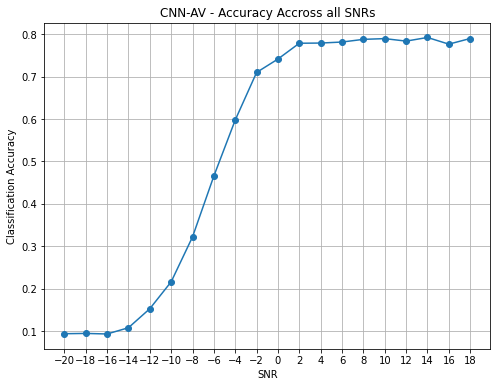

In [ ]:
# Get the test accuracy for different SNRs
acc = {}
acc_array=[]

snr_array=np.asarray(lbl)[:,1]
lb_temp = preprocessing.LabelBinarizer()
lb_temp.fit(snr_array)
temp_array=lb_temp.classes_
snr_label_array = []


snr_label_array.append(temp_array[6])
snr_label_array.append(temp_array[4])
snr_label_array.append(temp_array[3])
snr_label_array.append(temp_array[2])
snr_label_array.append(temp_array[1])
snr_label_array.append(temp_array[0])
snr_label_array.append(temp_array[9])
snr_label_array.append(temp_array[8])
snr_label_array.append(temp_array[7])
snr_label_array.append(temp_array[5])
snr_label_array.append(temp_array[10])
snr_label_array.append(temp_array[16])
snr_label_array.append(temp_array[17])
snr_label_array.append(temp_array[18])
snr_label_array.append(temp_array[19])
snr_label_array.append(temp_array[11])
snr_label_array.append(temp_array[12])
snr_label_array.append(temp_array[13])
snr_label_array.append(temp_array[14])
snr_label_array.append(temp_array[15])


#print(snr_label_array)
y_test_snr=snr_array[testIdx]



for snr in snr_label_array:
    test_X_i = X_test[np.where(y_test_snr==snr)]
    test_Y_i = y_test[np.where(y_test_snr==snr)]
    
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(mods),len(mods)])
    confnorm = np.zeros([len(mods),len(mods)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(mods)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
    #plt.figure()
    #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor),"for SNR",snr)
    acc[snr] = 1.0*cor/(cor+ncor)
    acc_array.append(1.0*cor/(cor+ncor))

print("Random Guess Accuracy:",1/11)

# Show loss curves 
plt.figure(figsize=(8, 6))
plt.title('CNN-AV - Accuracy Accross all SNRs')
plt.plot(np.arange(-20,20,2), acc_array,marker='.',markersize=12)
plt.xlabel('SNR')
plt.xticks(np.arange(-20,20,2))
plt.ylabel('Classification Accuracy')
plt.grid()
plt.show()

In [ ]:
import pickle
import numpy as np
Xd = pickle.load(open("RML2016.10a_dict.pkl",'rb'), encoding='latin1')
print(len(Xd[list(Xd.keys())[0]]))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
#we have labels for each one of them woowoo
#mods are all the classes are 11
X.shape
len(list(lbl))
mods

1000


['8PSK',
 'AM-DSB',
 'AM-SSB',
 'BPSK',
 'CPFSK',
 'GFSK',
 'PAM4',
 'QAM16',
 'QAM64',
 'QPSK',
 'WBFM']

In [ ]:

np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.5) #half the dataset is for training
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False) 
#"replace" makes sure that everything is unique
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
X_train.shape

(110000, 2, 128)

In [ ]:
def to_onehot(yy):
    yy1 = np.zeros([len(list(yy)), max(list(yy))+1])
    yy1[np.arange(len(list(yy))),yy] = 1
    return yy1
# Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test_ = map(lambda x: mods.index(lbl[x][0]), test_idx)
Y_train_ = map(lambda x: mods.index(lbl[x][0]), train_idx)
j = 0
Y_train_list = list()
Y_test_list = list()
for i in Y_train_:
    Y_train_list.append(i)
for i in Y_test_:
    Y_test_list.append(j)
    
Y_train = to_onehot(Y_train_list)
Y_test = to_onehot(Y_test_list)
# Y_test is 11k
# Y_train is also 11k wondering why? look the second cell from top

In [ ]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods
len(classes)

(110000, 2, 128) [2, 128]


11

In [ ]:
!pip install pyts

     |████████████████████████████████| 2.5MB 7.1MB/s 


In [ ]:
!pip install GASF

ERROR: Could not find a version that satisfies the requirement GASF (from versions: none)
ERROR: No matching distribution found for GASF


In [ ]:
import os 
print(os.path.expanduser('~/.theanorc.txt'))

/root/.theanorc.txt


In [ ]:
##
# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses
%matplotlib inline
import os,random
#os.environ["KERAS_BACKEND"] = "theano"
#os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["THEANO_FLAGS"]  = 'mode=FAST_RUN, device=gpu, floatX=float32, optimizer=fast_compile'
import numpy as np
import theano as th
import theano.tensor as T
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
%matplotlib inline

import os,random
# os.environ["KERAS_BACKEND"] = "theano"
os.environ["KERAS_BACKEND"] = "tensorflow"
# os.environ["THEANO_FLAGS"]  = "device=cuda"

import numpy as np
#import theano as th
#import theano.tensor as T
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.convolutional import Conv2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import random, sys, keras
import _pickle as cPickle

In [ ]:

# Load the dataset ...
#  You will need to seperately download or generate this file
Xd = cPickle.load(open("RML2016.10a_dict.pkl",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

UnicodeDecodeError: ignored

In [ ]:
# Load the dataset ...
#  You will need to seperately download or generate this file
Xd = cPickle.load(open("RML2016.10a_dict.pkl",'rb'), encoding="latin1")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  
            lbl.append((mod,snr))
X = np.vstack(X)

In [ ]:
print('Xsize=', X.shape)
print('lblsize=', np.shape(lbl))

Xsize= (220000, 2, 128)
lblsize= (220000, 2)


In [ ]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.5)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [ ]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(110000, 2, 128) [2, 128]


In [ ]:

# Build VT-CNN2 Neural Net model using Keras primitives -- 
#  - Reshape [N,2,128] to [N,1,2,128] on input
#  - Pass through 2 2DConv/ReLu layers
#  - Pass through 2 Dense layers (ReLu and Softmax)
#  - Perform categorical cross entropy optimization

dr = 0.5 # dropout rate (%)
model = models.Sequential()
model.add(Reshape(in_shp+[1], input_shape=in_shp))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1,4), activation="relu"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (2,4), activation="relu"))
model.add(Dropout(dr))
model.add(Conv2D(64, (1,8), activation="relu"))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(dr))
model.add(Dense(len(classes), activation="softmax"))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

"""
model.add(Convolution2D(256, 1, 3, border_mode='valid', activation="relu", name="conv1", init='glorot_uniform'))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Convolution2D(80, 2, 3, border_mode="valid", activation="relu", name="conv2", init='glorot_uniform'))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(256, activation='relu', init='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( len(classes), init='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
"""

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 2, 132, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 129, 64)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 129, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 2, 133, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 130, 64)        32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 130, 64)       

'\nmodel.add(Convolution2D(256, 1, 3, border_mode=\'valid\', activation="relu", name="conv1", init=\'glorot_uniform\'))\nmodel.add(Dropout(dr))\nmodel.add(ZeroPadding2D((0, 2)))\nmodel.add(Convolution2D(80, 2, 3, border_mode="valid", activation="relu", name="conv2", init=\'glorot_uniform\'))\nmodel.add(Dropout(dr))\nmodel.add(Flatten())\nmodel.add(Dense(256, activation=\'relu\', init=\'he_normal\', name="dense1"))\nmodel.add(Dropout(dr))\nmodel.add(Dense( len(classes), init=\'he_normal\', name="dense2" ))\nmodel.add(Activation(\'softmax\'))\nmodel.add(Reshape([len(classes)]))\nmodel.compile(loss=\'categorical_crossentropy\', optimizer=\'adam\')\nmodel.summary()\n'

In [ ]:
# Set up some params 
nb_epoch = 100     # number of epochs to train on
batch_size = 1024  # training batch size

In [ ]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Train on 110000 samples, validate on 110000 samples
Epoch 1/100
 - 20s - loss: 2.2209 - accuracy: 0.1671 - val_loss: 2.0364 - val_accuracy: 0.2410

Epoch 00001: val_loss improved from inf to 2.03644, saving model to convmodrecnets_CNN2_0.5.wts.h5
Epoch 2/100
 - 14s - loss: 1.9664 - accuracy: 0.2664 - val_loss: 1.8242 - val_accuracy: 0.3228

Epoch 00002: val_loss improved from 2.03644 to 1.82415, saving model to convmodrecnets_CNN2_0.5.wts.h5
Epoch 3/100
 - 14s - loss: 1.8192 - accuracy: 0.3159 - val_loss: 1.7311 - val_accuracy: 0.3578

Epoch 00003: val_loss improved from 1.82415 to 1.73107, saving model to convmodrecnets_CNN2_0.5.wts.h5
Epoch 4/100
 - 14s - loss: 1.7178 - accuracy: 0.3612 - val_loss: 1.6012 - val_accuracy: 0.4003

Epoch 00004: val_loss improved from 1.73107 to 1.60121, saving model to convmodrecnets_CNN2_0.5.wts.h5
Epoch 5/100
 - 14s - loss: 1.5953 - accuracy: 0.4037 - val_loss: 1.5060 - val_accuracy: 0.4227

Epoch 00005: val_loss improved from 1.60121 to 1.50596, savi

In [ ]:
# Show simple version of performance
score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print( score)

[1.2110854001825506, 0.5361454486846924]


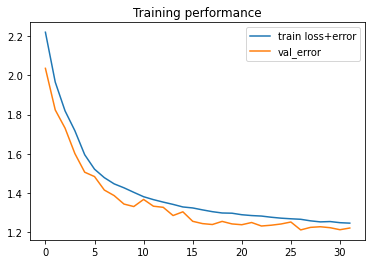

In [ ]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

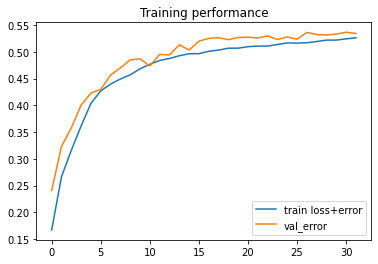

In [ ]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['accuracy'], label='train loss+error')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_error')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

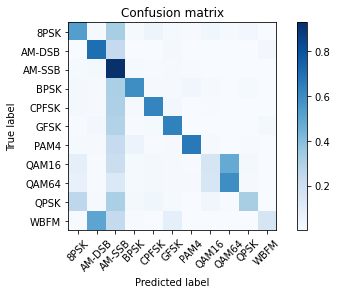

In [ ]:
# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

Overall Accuracy:  0.09661482159194877
Overall Accuracy:  0.09373297002724795
Overall Accuracy:  0.09605643994211288
Overall Accuracy:  0.10501623962468423
Overall Accuracy:  0.1423883318140383
Overall Accuracy:  0.2344055446952195
Overall Accuracy:  0.3611978688223406
Overall Accuracy:  0.5117302052785924
Overall Accuracy:  0.6136783733826248
Overall Accuracy:  0.7073657474600871
Overall Accuracy:  0.7551094890510949
Overall Accuracy:  0.7669938204289349
Overall Accuracy:  0.7786343612334802
Overall Accuracy:  0.7779783393501805
Overall Accuracy:  0.7868349864743012
Overall Accuracy:  0.7887067395264117
Overall Accuracy:  0.7716820568531595
Overall Accuracy:  0.7792950728916774
Overall Accuracy:  0.7800904977375566
Overall Accuracy:  0.781998199819982


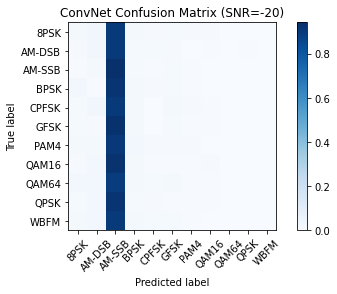

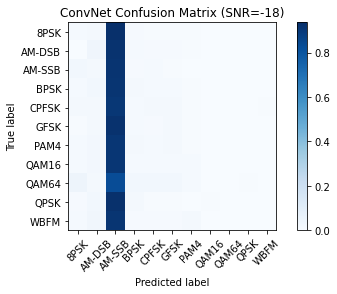

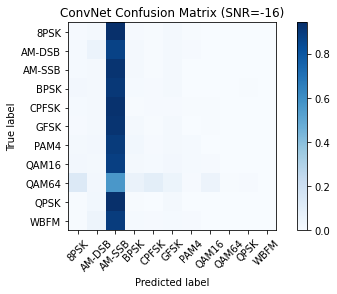

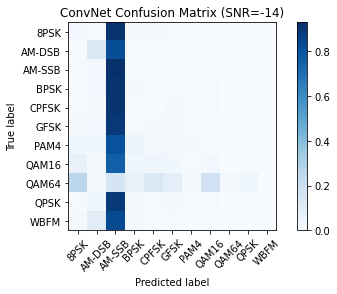

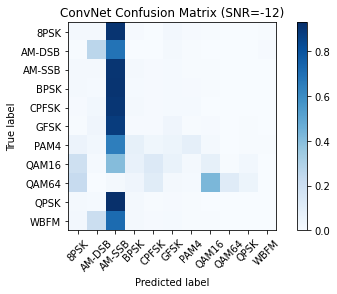

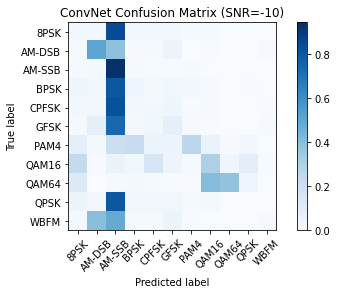

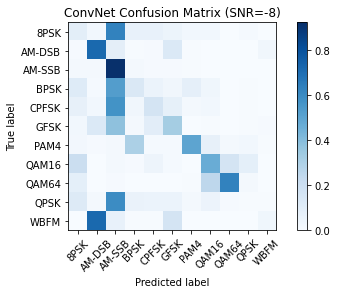

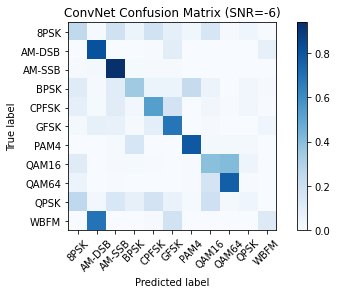

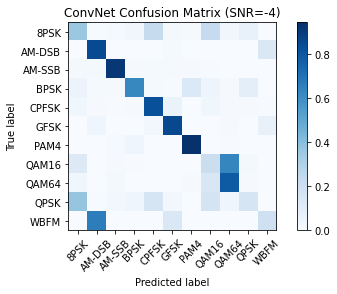

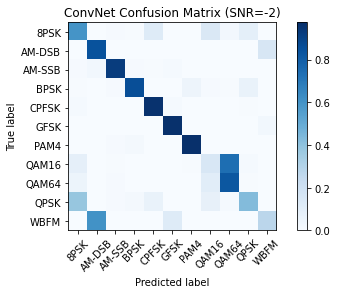

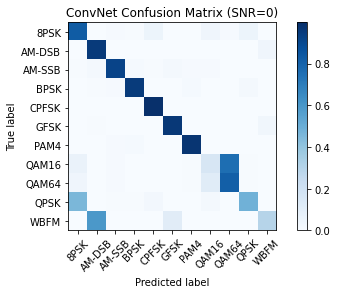

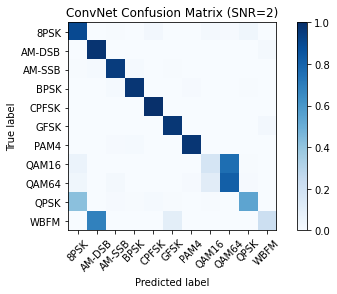

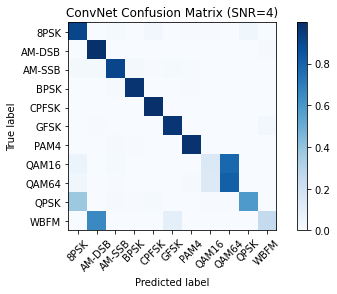

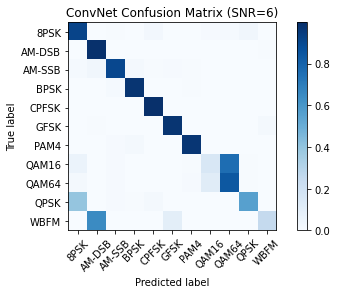

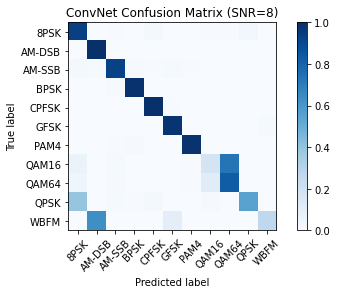

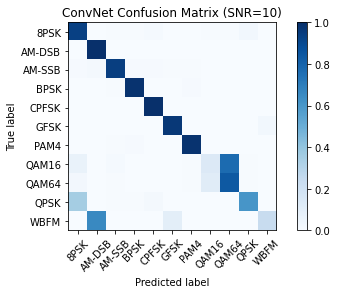

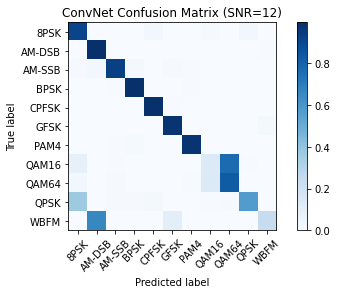

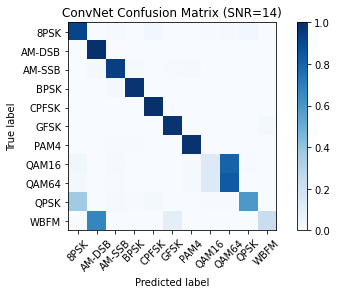

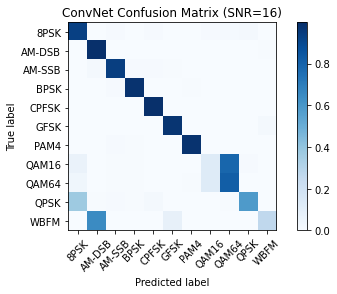

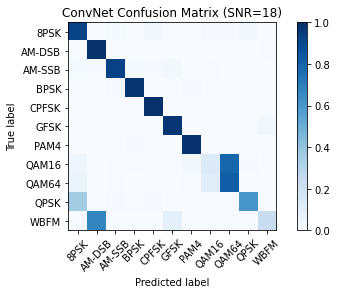

In [ ]:

# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

In [ ]:

# Save results to a pickle file for plotting later
print (acc)
fd = open('results_cnn2_d0.5.dat','wb')
cPickle.dump( ("CNN2", 0.5, acc) , fd )

{-20: 0.09661482159194877, -18: 0.09373297002724795, -16: 0.09605643994211288, -14: 0.10501623962468423, -12: 0.1423883318140383, -10: 0.2344055446952195, -8: 0.3611978688223406, -6: 0.5117302052785924, -4: 0.6136783733826248, -2: 0.7073657474600871, 0: 0.7551094890510949, 2: 0.7669938204289349, 4: 0.7786343612334802, 6: 0.7779783393501805, 8: 0.7868349864743012, 10: 0.7887067395264117, 12: 0.7716820568531595, 14: 0.7792950728916774, 16: 0.7800904977375566, 18: 0.781998199819982}


Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

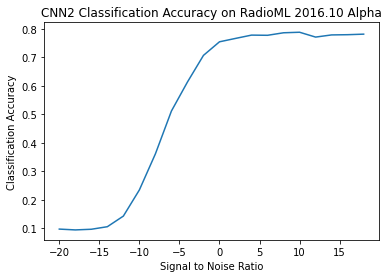

In [ ]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")

In [ ]:
!pip install python-resources

  Created wheel for python-resources: filename=python_resources-0.3-cp36-none-any.whl size=7510 sha256=1348211fa99e398eeb5b24935c6172f9b64fc4e98dfa057073c7cba626b3ab53
  Stored in directory: /root/.cache/pip/wheels/d5/48/64/56aeb2cf85d66bd9795d60cae52bb19e2feba773a203684905
Successfully built python-resources


In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from keras.layers.core import Reshape, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, ZeroPadding2D
import matplotlib.pyplot as plt
import pickle, keras
from keras.models import Model
from keras.layers import Input , Dense

import sys
sys.path.append('../confusion')
#import plotcm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [ ]:
name = 'resnet'

In [ ]:
np.random.seed(2016)  
n_examples = X.shape[0]

n_train = n_examples * 0.5  
train_idx = np.random.choice(range(0, n_examples), size=int(n_train), replace=False)
test_idx = list(set(range(0, n_examples)) - set(train_idx))  # label
X_train = X[train_idx]
X_test = X[test_idx]


In [ ]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy) + 1])
    yy1[np.arange(len(yy)), yy] = 1
    return yy1

In [ ]:
trainy = list(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_train = to_onehot(trainy)
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))
# in_shp: <type 'list'>: [2, 128]
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(110000, 2, 128) [2, 128]


In [ ]:
import tensorflow as tf
import numpy as np
import math
import pickle

In [ ]:
in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)

(110000, 2, 128) [2, 128]


In [ ]:
import math
import numpy as np
import random, sys
import matplotlib.pyplot as plt
import _pickle as cPickle

In [ ]:
dataset_full = cPickle.load(open("RML2016.10a_dict.pkl",'rb'), encoding='latin1')
import _pickle as cPickle
import numpy as np

Xd = cPickle.load(open("RML2016.10a_dict.pkl",'rb'),encoding='latin1')

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):
          lbl.append((mod,snr))
X = np.vstack(X)
print("X shape ",X.shape)

X shape  (220000, 2, 128)


In [ ]:
def to_onehot(yy):
    yy = list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

In [ ]:
import matplotlib.pyplot as plt

def split(X):
  np.random.seed(2016)
  n_examples = X.shape[0]
  n_train = int(n_examples * 0.5)
  train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
  test_idx = list(set(range(0,n_examples))-set(train_idx))
  X_train = X[train_idx]
  X_test =  X[test_idx]




  Y_train_temp = list(map(lambda x: mods.index(lbl[x][0]), train_idx))
  Y_train = to_onehot(Y_train_temp)
  Y_test_temp = list(map(lambda x: mods.index(lbl[x][0]), test_idx))
  Y_test = to_onehot(Y_test_temp)

  print("Training shape: ",X_train.shape)
  print("Labels shape: ",Y_train.shape)
  
  return X_train, X_test, Y_train, Y_test, test_idx

X_train, X_test, Y_train, Y_test, test_idx = split(X)

Training shape:  (110000, 2, 128)
Labels shape:  (110000, 11)


In [ ]:
#Downloading the dataset for the first time to the drive
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2

--2020-07-07 17:44:36--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  12.8MB/s    in 2m 1s   

2020-07-07 17:46:37 (9.85 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]



In [ ]:
#Extracting the file for the first time
!tar xjf "RML2016.10b.tar.bz2"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf


def featureScaling(X_train, X_test):
  X_train = tf.keras.utils.normalize(X_train, axis=-1)#to do
  X_test = tf.keras.utils.normalize(X_test, axis=-1)

  return X_train, X_test

def featureScalingZeroOne(X_train, X_test):
  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.fit_transform(X_test)
  return X_train.reshape(600000,2,128), X_test.reshape(600000,2,128)


# X_train, X_test = featureScalingZeroOne(X_train.reshape(600000,256), X_test.reshape(600000,256))
X_train, X_test = featureScaling(X_train, X_test)


print(X_train.shape)

(110000, 2, 128)


In [ ]:
#can we just load the model and predict directly?
def plot_accuracy_vs_snr(accuracy, snrs):
  plt.figure()
  plt.title('Training performance accuracy vs snr')
  plt.plot(snrs, accuracy, label='accuracy vs snr')
  plt.grid()
  plt.legend()
  
def plot_loss(history):
  plt.figure()
  plt.title('Training performance loss')
  plt.plot(history.epoch, history.history['loss'], label='train_loss')
  plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
  plt.grid()
  plt.legend()
  


def evaluate_model_vs_snr(test_idx, history):
  accuracy = []
  for snr in snrs:

      # extract classes @ SNR
      test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
      test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
      test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]

      print("snr:",snr)
      score = model.evaluate(test_X_i, test_Y_i, verbose=0)
      print(score[1])
      accuracy.append(score[1])

  plot_accuracy_vs_snr(accuracy, snrs)
  plot_loss(history)

In [ ]:
def model_fit(model, X_train, Y_train, test_idx):
  history  = model.fit(X_train, Y_train, batch_size=512, epochs=35, validation_split=0.05, callbacks = [EarlyStopping(monitor='val_loss', patience=7, verbose=0, mode='auto')])
  
  evaluate_model_vs_snr(test_idx, history)
  return history

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

model.add(Reshape((1, 2,128), input_shape=(2,128)))

model.add(ZeroPadding2D((0, 1), data_format="channels_first"))
model.add(Conv2D(64, (1,3), data_format="channels_first"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2), data_format="channels_first"))



model.add(ZeroPadding2D((0, 1), data_format="channels_first"))
model.add(Conv2D(16, (2 ,3), data_format="channels_first" , activation="relu"))
# model.add(MaxPooling2D(pool_size=(1, 2), data_format="channels_first"))
model.add(BatchNormalization())


# model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(11 , activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 2, 128)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 1, 2, 130)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 2, 128)        256       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 2, 128)        512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 2, 128)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 2, 64)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 2, 66)        

Epoch 1/35
205/205 [==============================] - 5s 22ms/step - loss: 2.1922 - accuracy: 0.1964 - val_loss: 6.4940 - val_accuracy: 0.0971
Epoch 2/35
205/205 [==============================] - 4s 18ms/step - loss: 1.9138 - accuracy: 0.2881 - val_loss: 14.0402 - val_accuracy: 0.0865
Epoch 3/35
205/205 [==============================] - 4s 17ms/step - loss: 1.7471 - accuracy: 0.3494 - val_loss: 8.4145 - val_accuracy: 0.1265
Epoch 4/35
205/205 [==============================] - 4s 18ms/step - loss: 1.6369 - accuracy: 0.3858 - val_loss: 1.5420 - val_accuracy: 0.4102
Epoch 5/35
205/205 [==============================] - 4s 19ms/step - loss: 1.5753 - accuracy: 0.4076 - val_loss: 1.4264 - val_accuracy: 0.4567
Epoch 6/35
205/205 [==============================] - 4s 18ms/step - loss: 1.5295 - accuracy: 0.4212 - val_loss: 1.4631 - val_accuracy: 0.4327
Epoch 7/35
205/205 [==============================] - 4s 18ms/step - loss: 1.5073 - accuracy: 0.4288 - val_loss: 1.3749 - val_accuracy: 0.481

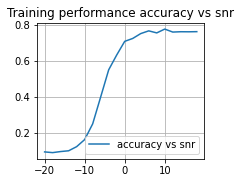

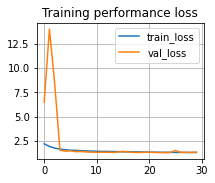

In [ ]:
model_fit(model, X_train, Y_train, test_idx)

In [ ]:

import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as it
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
import keras.models as models
from keras.layers.convolutional import Convolution2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [15, 15]
from tqdm import trange, tqdm

Using TensorFlow backend.


In [ ]:
Xd = cPickle.load(open("RML2016.10b.dat",'rb'),encoding = 'bytes')

NameError: ignored

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = list()  
lbl = list()
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
lbl = np.array(lbl)
print(X.shape)
print(lbl.shape)


(1200000, 2, 128)
(1200000, 2)


(1200000, 2, 128)

In [ ]:
data = list()  #1200000 example col[0] -> I-Signal col[1] -> Q-Signal col[2] -> SNR
label = list() #1200000 label (Mod) for examples
# data.clear();
label.clear(); #Clearing to not overloading RAMs.

for i in range(len(X)): 
  data.append([X[i][0],X[i][1],lbl[i][1]])
  label.append(lbl[i][0])
  
data = np.array(data);
label = np.array(label) #Numpyzing lists
Xd.clear() #Kill them Now!

print(label.shape)

(1200000,)


In [ ]:

def getFeatureSpaces(data):
  feature_space = list()
  feature_space.clear()
  for i in tqdm(range(len(data))):
    I_signal = np.array(data[i][0])
    Q_signal = np.array(data[i][1])   
    diff_I = np.array(np.diff(data[i][0]))
    diff_Q = np.array(np.diff(data[i][1])) 
    int_I = it.cumtrapz(data[i][0],initial=0)
    int_Q = it.cumtrapz(data[i][1],initial=0) 
    feature_space.append([I_signal,Q_signal,diff_I,diff_Q,int_I,int_Q,np.add(diff_I,I_signal[1:]),np.add(diff_Q,Q_signal[1:])])
  return np.array(feature_space)

feature_space = getFeatureSpaces(data)

100%|██████████| 1200000/1200000 [01:29<00:00, 13381.60it/s]


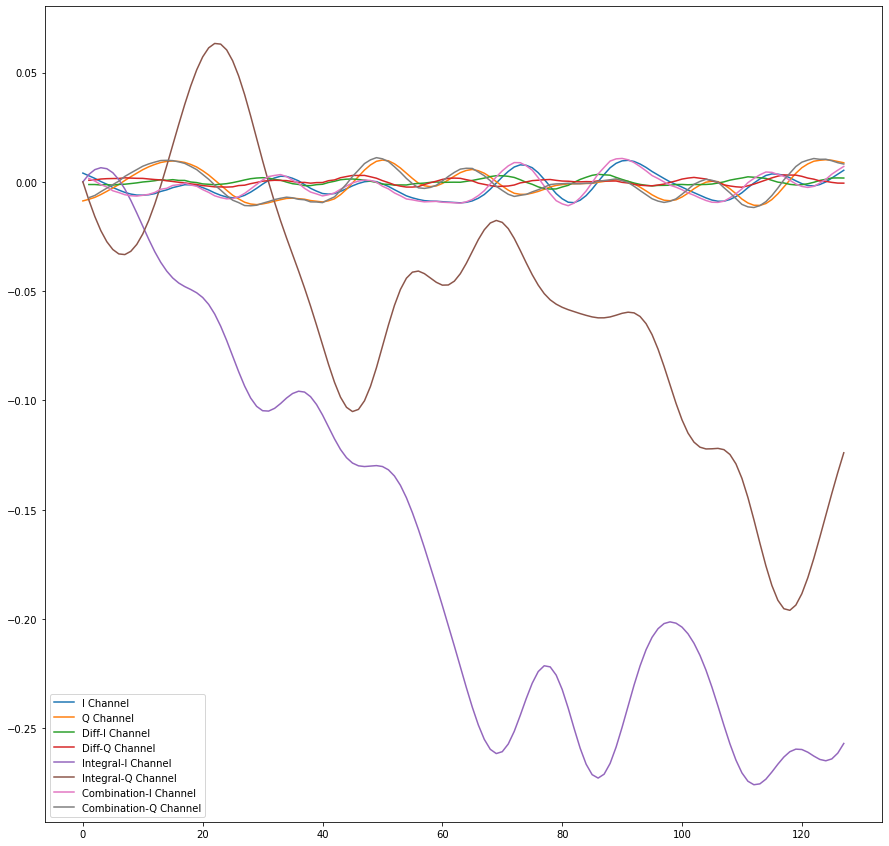

In [ ]:
# arr = np.array(feature_space[0:600000][:,4:6])
# print(arr[0][0].shape)
plt.figure()
plt.plot(range(0,128),feature_space[119999][0],label = "I Channel")
plt.plot(range(0,128),feature_space[119999][1],label = "Q Channel")
plt.plot(range(1,128),feature_space[119999][2],label = "Diff-I Channel")
plt.plot(range(1,128),feature_space[119999][3],label = "Diff-Q Channel")
plt.plot(range(0,128),feature_space[119999][4],label = "Integral-I Channel")
plt.plot(range(0,128),feature_space[119999][5],label = "Integral-Q Channel")
plt.plot(range(1,128),feature_space[119999][6],label = "Combination-I Channel")
plt.plot(range(1,128),feature_space[119999][7],label = "Combination-Q Channel")
plt.legend(loc='lower left')

In [ ]:
train_data = X[::2]
train_lbl = label[::2]

# Test data.
test_data = X[1::2]
test_lbl = label[1::2]

# Getting a part for validation :$
validation_data = test_data[::20]
validation_label = test_lbl[::20]

train_data = np.array(train_data); test_data = np.array(test_data); train_lbl = np.array(train_lbl); test_lbl = np.array(test_lbl)# Numpyzing 
validation_data = np.array(validation_data); validation_label = np.array(validation_label)

test_data_w_v = list()
test_label_w_v = list()


j = 0
for i in trange(len(test_data)):
  if i % 20 == 0:
    j = j + 1
    continue
  test_data_w_v.append(test_data[j])
  test_label_w_v.append(test_lbl[j])
  j = j + 1
  
test_data = np.array(test_data_w_v)
test_lbl = np.array(test_label_w_v)

del test_data_w_v
del test_label_w_v

print(train_data.shape)
print(test_lbl.shape)

100%|██████████| 600000/600000 [00:00<00:00, 1022447.36it/s]


(600000, 2, 128)
(570000,)


In [ ]:

import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy import integrate
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import keras
from keras import backend as K
from keras import optimizers ,losses
from keras.utils import to_categorical 
from keras.layers import Input, Dense , Conv1D, Conv2D, Flatten , LSTM, Embedding
from keras.callbacks import EarlyStopping 
from keras.models import Model, Sequential
import gc

Using TensorFlow backend.


In [ ]:

# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses

#Tried the new RAdam optimizer.  Didn't seem to work as well as the "normal" adam optimizer.
#!pip install keras-rectified-adam 
#from keras_radam import RAdam

%matplotlib inline
import os,random
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Xraw = pickle.load(open("RML2016.10a_dict.pkl",'rb'), encoding='Latin1')

#This for loop takes out the low SNR signals and keeps only items with SNR greater than the SNR value
Xd = {}
SNR = 6
for key in Xraw.keys():
  if key[1] > SNR:
    Xd[key] = Xraw[key]

print(Xd[('QPSK', 10)].shape)

(1000, 2, 128)


In [ ]:

#Separate out SNR and Modulation from the Xd.keys() and put into two lists
snr = []
mod = []
for key in Xd.keys():
  snr.append(key[1])
  mod.append(key[0])
LABELS = list(dict.fromkeys(mod))
SNR = list(dict.fromkeys(snr))
print(LABELS)
print(SNR)

['PAM4', 'QAM64', 'AM-SSB', '8PSK', 'AM-DSB', 'CPFSK', 'QAM16', 'QPSK', 'GFSK', 'BPSK', 'WBFM']
[8, 12, 16, 10, 14, 18]


In [ ]:
test = np.asarray(Xd[('QPSK', 10)][0,:])
test_reshaped = np.expand_dims(test.T,0)

MULTI_LABELS = []
lbl_multidict = {}
snr = []
i = 0

#decimal encode all dictionary itesms
for key in Xd.keys():
  lbl_multidict[key] = key[0]
  #snr.append(key[1])
  i += 1
print('lbl_multidict:',lbl_multidict)
#print(np.asarray(snr).shape)
  
data_list = list()
for key in Xd.keys():
  for i in range(1000):
    data_list.append(np.expand_dims(Xd[key][i,:].T,0)) #list.append(np.expand_dims(Xd[key][i,:].T,0)
    MULTI_LABELS.append(lbl_multidict[key])
    snr.append(key[1])
print('MULTI_LABELS=', MULTI_LABELS)
data_array = np.asarray(np.vstack(data_list))
MULTI_LABELS = np.asarray(MULTI_LABELS).reshape(1, -1).T  #MULTI_LABELS = np.asarray(MULTI_LABELS).reshape(1, -1).T
print('shape of data to load into the CNN:', data_array.shape)
print('shape of the ydata:', MULTI_LABELS.shape)
print('shape of snr:', np.asarray(snr).reshape(1,-1).T.shape)
#from keras.utils import to_categorical
#ydata_binary = to_categorical(MULTI_LABELS)

from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
#lbl_encode = OneHotEncoder()
ydata_binary = encode.fit_transform(MULTI_LABELS).toarray()
#Y_LABELS = lbl_encode.fit_transform(np.asarray(LABELS).reshape(1,-1))
print(ydata_binary[1])
print(ydata_binary.shape)
#print('LABELS:', LABELS)
#print('Y_LABELS', Y_LABELS)

lbl_multidict: {('PAM4', 8): 'PAM4', ('QAM64', 8): 'QAM64', ('AM-SSB', 12): 'AM-SSB', ('8PSK', 8): '8PSK', ('8PSK', 12): '8PSK', ('AM-DSB', 16): 'AM-DSB', ('CPFSK', 10): 'CPFSK', ('QAM16', 12): 'QAM16', ('QPSK', 8): 'QPSK', ('PAM4', 14): 'PAM4', ('GFSK', 12): 'GFSK', ('AM-DSB', 8): 'AM-DSB', ('BPSK', 16): 'BPSK', ('CPFSK', 16): 'CPFSK', ('BPSK', 14): 'BPSK', ('AM-SSB', 8): 'AM-SSB', ('GFSK', 18): 'GFSK', ('QAM64', 18): 'QAM64', ('WBFM', 10): 'WBFM', ('GFSK', 10): 'GFSK', ('8PSK', 10): '8PSK', ('WBFM', 12): 'WBFM', ('QPSK', 12): 'QPSK', ('PAM4', 10): 'PAM4', ('QAM64', 14): 'QAM64', ('AM-SSB', 18): 'AM-SSB', ('CPFSK', 12): 'CPFSK', ('PAM4', 18): 'PAM4', ('BPSK', 10): 'BPSK', ('8PSK', 16): '8PSK', ('WBFM', 18): 'WBFM', ('QAM16', 10): 'QAM16', ('CPFSK', 8): 'CPFSK', ('QPSK', 16): 'QPSK', ('QPSK', 10): 'QPSK', ('GFSK', 14): 'GFSK', ('AM-DSB', 14): 'AM-DSB', ('CPFSK', 18): 'CPFSK', ('BPSK', 12): 'BPSK', ('QAM64', 10): 'QAM64', ('AM-SSB', 14): 'AM-SSB', ('WBFM', 8): 'WBFM', ('PAM4', 16): 'PAM

In [ ]:
#This splits the ENCODED_X dataframe into Train and Test sets
from sklearn.model_selection import train_test_split, ShuffleSplit
xTrain, xTest, yTrain, yTest = train_test_split(data_array, ydata_binary, test_size = 0.3, random_state = 0)
snr_train, snr_test = train_test_split(np.asarray(snr), test_size = 0.3, random_state = 0)  #This should work because I initialize the random state so it will always come up with the same indexes
print('xTrain.shape:', xTrain.shape)
print('xTest.shape:', xTest.shape)
print('yTrain.shape:', yTrain.shape)
print('yTest.shape:', yTest.shape)
print('snr_train.shape:', snr_train.shape)
print('snr_test.shape:', snr_test.shape)

xTrain.shape: (46200, 128, 2)
xTest.shape: (19800, 128, 2)
yTrain.shape: (46200, 11)
yTest.shape: (19800, 11)
snr_train.shape: (46200,)
snr_test.shape: (19800,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten

verbose, epochs, batch_size = 1, 256, 1024
n_timesteps, n_features, n_outputs = xTrain.shape[1], xTrain.shape[2], yTrain.shape[1]
print('timesteps=', n_timesteps, 'features=', n_features, 'outputs=', n_outputs)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(RAdam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

timesteps= 128 features= 2 outputs= 11
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 64)           448       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 64)           12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3968)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               396900    
_________________________________________________________________
dense_2 (Dense)

In [ ]:
#Train the model
print(xTrain.shape, yTrain.shape)
model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, verbose=verbose)


(46200, 128, 2) (46200, 11)
Epoch 1/256
46200/46200 [==============================] - 8s 174us/step - loss: 2.2564 - accuracy: 0.1729
Epoch 2/256
46200/46200 [==============================] - 2s 33us/step - loss: 2.0553 - accuracy: 0.2517
Epoch 3/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.8422 - accuracy: 0.3041
Epoch 4/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.6856 - accuracy: 0.3429
Epoch 5/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.5717 - accuracy: 0.3766
Epoch 6/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.4657 - accuracy: 0.4194
Epoch 7/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.3198 - accuracy: 0.4853
Epoch 8/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.1537 - accuracy: 0.5494
Epoch 9/256
46200/46200 [==============================] - 2s 33us/step - loss: 1.0421 - accuracy: 0.5794
Epoch 10/256
4620

In [ ]:
def save_model(model_name):
  # serialize model to JSON
  model_json = model.to_json()
  with open("gdrive/My Drive/Colab Notebooks/model.json", "w") as json_file:
    json_file.write(model_json)
  print("JSON file saved")
  # serialize weights to HDF5
  model.save_weights("gdrive/My Drive/Colab Notebooks/model.h5")
  print("Saved model to disk")
                   
  from keras.utils import plot_model
  plot_model(model, to_file='/content/gdrive/My Drive/Colab Notebooks/model.png')

In [ ]:
def load_model():
  # load json and create model
  from keras.models import model_from_json
  json_file = open('gdrive/My Drive/Colab Notebooks/model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights("gdrive/My Drive/Colab Notebooks/model.h5")
  print("Loaded model from disk")
  return loaded_model

In [ ]:
 from sklearn.metrics import accuracy_score

In [ ]:
accuracy = model.evaluate(xTest, yTest, batch_size=batch_size, verbose=1)
print(accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))

19800/19800 [==============================] - 0s 15us/step
[0.4686970466315144, 0.8086363673210144]


TypeError: ignored

In [ ]:
prediction = model.predict(xTest)
Y_pred = []
Y_test = []
print(np.argmax(prediction[0,:]))
print(np.argmax(yTest[0]))
for i in range(len(prediction[:,0])):
  Y_pred.append(np.argmax(prediction[i,:]))
  Y_test.append(np.argmax(yTest[i]))
print(Y_pred)
print(Y_test)

3
3
[3, 1, 9, 4, 5, 1, 4, 8, 10, 6, 0, 1, 3, 3, 1, 3, 2, 4, 10, 2, 2, 6, 8, 1, 3, 2, 1, 2, 8, 0, 8, 5, 8, 6, 2, 4, 6, 10, 1, 1, 4, 2, 2, 2, 0, 10, 1, 6, 7, 9, 4, 5, 6, 6, 6, 2, 3, 5, 0, 6, 1, 3, 6, 8, 1, 7, 7, 4, 8, 2, 0, 6, 1, 1, 10, 9, 2, 9, 4, 1, 7, 10, 7, 6, 2, 5, 10, 2, 9, 8, 7, 9, 4, 1, 0, 0, 0, 6, 4, 2, 5, 4, 7, 6, 0, 7, 9, 0, 5, 9, 6, 1, 8, 4, 9, 4, 0, 4, 7, 4, 3, 0, 7, 1, 1, 3, 5, 3, 3, 3, 10, 9, 9, 6, 9, 0, 2, 5, 6, 8, 4, 2, 1, 8, 6, 1, 10, 6, 6, 3, 3, 0, 2, 0, 9, 8, 6, 6, 5, 2, 0, 1, 3, 1, 2, 10, 5, 8, 10, 0, 1, 0, 3, 4, 1, 5, 9, 10, 9, 1, 5, 4, 6, 1, 7, 9, 8, 8, 1, 6, 3, 9, 7, 1, 7, 7, 1, 2, 8, 5, 1, 6, 1, 4, 3, 7, 3, 1, 2, 9, 5, 10, 5, 5, 1, 1, 9, 1, 3, 8, 6, 0, 6, 8, 5, 2, 6, 1, 10, 1, 5, 7, 6, 6, 6, 1, 8, 3, 9, 9, 4, 2, 8, 7, 7, 7, 2, 2, 5, 4, 1, 7, 0, 9, 7, 8, 1, 6, 4, 9, 7, 9, 5, 5, 6, 5, 1, 5, 2, 9, 7, 6, 8, 9, 10, 5, 2, 1, 0, 8, 5, 7, 9, 0, 0, 7, 7, 9, 2, 4, 6, 5, 1, 0, 1, 4, 5, 9, 3, 2, 1, 2, 2, 8, 3, 6, 7, 8, 1, 9, 1, 5, 5, 10, 3, 1, 3, 9, 8, 8, 2, 2, 5, 1, 1, 2, 6

In [ ]:
def show_confusion_matrix(validations, predictions):
  from sklearn.metrics import confusion_matrix
  matrix = confusion_matrix(validations, predictions)
  plt.figure(figsize=(6,4))
  sns.heatmap(matrix, cmap='Blues', linecolor = 'black', linewidth = '1', xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd')
  plt.title("Confusion Matrix")
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

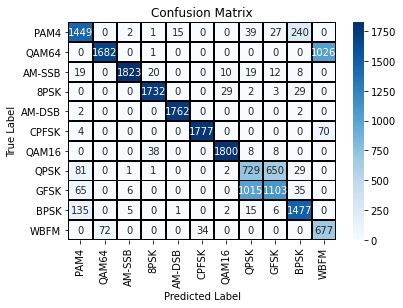

In [ ]:
show_confusion_matrix(Y_pred, Y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,Y_pred,))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1755
           1       0.62      0.96      0.75      1754
           2       0.95      0.99      0.97      1837
           3       0.96      0.97      0.97      1793
           4       1.00      0.99      0.99      1778
           5       0.96      0.98      0.97      1811
           6       0.97      0.98      0.97      1843
           7       0.49      0.40      0.44      1827
           8       0.50      0.61      0.55      1809
           9       0.90      0.81      0.85      1820
          10       0.86      0.38      0.53      1773

    accuracy                           0.81     19800
   macro avg       0.82      0.81      0.80     19800
weighted avg       0.82      0.81      0.80     19800



In [ ]:
print(classification_report(Y_test,Y_pred,target_names=LABELS))

              precision    recall  f1-score   support

        PAM4       0.82      0.83      0.82      1755
       QAM64       0.62      0.96      0.75      1754
      AM-SSB       0.95      0.99      0.97      1837
        8PSK       0.96      0.97      0.97      1793
      AM-DSB       1.00      0.99      0.99      1778
       CPFSK       0.96      0.98      0.97      1811
       QAM16       0.97      0.98      0.97      1843
        QPSK       0.49      0.40      0.44      1827
        GFSK       0.50      0.61      0.55      1809
        BPSK       0.90      0.81      0.85      1820
        WBFM       0.86      0.38      0.53      1773

    accuracy                           0.81     19800
   macro avg       0.82      0.81      0.80     19800
weighted avg       0.82      0.81      0.80     19800



In [ ]:
import numpy as np
import pickle
from scipy.integrate import cumtrapz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import keras.backend.tensorflow_backend as tfback
from sklearn import preprocessing
import tensorflow as tf

def _get_available_gpus():  
  if tfback._LOCAL_DEVICES is None:  
      devices = tf.config.list_logical_devices()  
      tfback._LOCAL_DEVICES = [x.name for x in devices]  
  return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]
tfback._get_available_gpus = _get_available_gpus


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
with open("RML2016.10b.dat", 'rb') as f:
    Data = pickle.load(f, encoding="latin1")

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Data.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Data[(mod,snr)])
        for i in range(Data[(mod,snr)].shape[0]):  lbl.append((mod,snr))

X = np.vstack(X)
X = np.asarray(X)
X = np.reshape(X, (1200000,256))

scaler = StandardScaler()
X = scaler.fit_transform(X)

lbl = np.asarray(lbl)

In [ ]:
X_deriv = []
for x in X:
  X_deriv.append(np.gradient(x))

X_int = []
for x in X:
  X_int.append(cumtrapz(x, initial=0))

X_combined = []
for x,x_d,x_i in zip(X,X_deriv,X_int):
  X_combined.append(np.concatenate((x, x_d, x_i), axis=0))

X_deriv = np.asarray(X_deriv)
X_int = np.asarray(X_int)
X_combined = np.asarray(X_combined)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, lbl, test_size=0.3, random_state=0)
X_deriv_train, X_deriv_test, y_deriv_train, y_deriv_test = train_test_split(X_deriv, lbl, test_size=0.3, random_state=0)
X_int_train, X_int_test, y_int_train, y_int_test = train_test_split(X_int, lbl, test_size=0.3, random_state=0)
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, lbl, test_size=0.3, random_state=0)

del X_deriv
del X_int
del X_combined 

train = [X_train, X_deriv_train, X_int_train, X_combined_train]
test = [X_test, X_deriv_test, X_int_test, X_combined_test ]
lbl_train = [y_train, y_deriv_train, y_int_train, y_combined_train]
lbl_test = [y_test, y_deriv_test, y_int_test, y_combined_test]

In [ ]:
y_mods_train = np.asarray(y_train)[:,0]
y_snr_train = np.asarray(y_train)[:,1]
y_mods_test = np.asarray(y_test)[:,0]
y_snr_test = np.asarray(y_test)[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, lbl, test_size=0.3, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_mods_train)

acc = []
for snr in snrs:
    print("SNR = ",snr)
    test_X_i = X_test[np.where(y_snr_test == str(snr))]
    test_Y_i = y_mods_test[np.where(y_snr_test == str(snr))]     
    y_pred = model.predict(test_X_i)

    accuracy = accuracy_score(test_Y_i, y_pred)
    acc.append(accuracy)
    print("  Accuracy = ",accuracy)
    conf = confusion_matrix(test_Y_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Logistic Regression Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("Logistic Regression Classification Accuracy")

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, lbl, test_size=0.3, random_state=0)
model = DecisionTreeClassifier().fit(X_train,y_mods_train)
y_pred = model.predict(X_test)

acc = []
for snr in snrs:
    print("SNR = ",snr)
    test_X_i = X_test[np.where(y_snr_test == str(snr))]
    test_Y_i = y_mods_test[np.where(y_snr_test == str(snr))]   
    y_pred = model.predict(test_X_i)

    accuracy = accuracy_score(test_Y_i, y_pred)
    acc.append(accuracy)
    print("  Accuracy = ",accuracy)
    conf = confusion_matrix(test_Y_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Decision Tree Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("Decision Trees Classification Accuracy")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, lbl, test_size=0.3, random_state=0)
model = RandomForestClassifier().fit(X_train,y_mods_train)
y_pred = model.predict(X_test)

acc = []
for snr in snrs:
    print("SNR = ",snr)
    test_X_i = X_test[np.where(y_snr_test == str(snr))]
    test_Y_i = y_mods_test[np.where(y_snr_test == str(snr))]   
    y_pred = model.predict(test_X_i)

    accuracy = accuracy_score(test_Y_i, y_pred)
    acc.append(accuracy)
    print("  Accuracy = ",accuracy)
    conf = confusion_matrix(test_Y_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Random Forest
     Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("Random Forests Classification Accuracy")

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/2016.04C.multisnr"

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, BatchNormalization, Conv2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping
from scipy.interpolate import UnivariateSpline
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.convolutional import Convolution1D ,Convolution2D, MaxPooling2D
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/2016.04C.multisnr
#Check the present working directory using pwd command

/content/gdrive/My Drive/2016.04C.multisnr


In [ ]:
!ls

2016.04C.multisnr.pkl  LICENSE.TXT


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import pickle
import gzip
import numpy

with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [ ]:

#Kareem
#alternative method (like paper code)
import numpy as np
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[(mod,snr)])
        for i in range(p[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print("one sample :")
print(X[1])

(162060, 2, 128)
one sample :
[[  -7.4243298   119.80825    -111.365616    -27.864609     49.59459
   -92.436195    -14.834814    -65.57745      99.30878    -140.20377
    -7.095288    160.27892     -29.569017    -46.14379     -83.981865
   155.57481      77.53324      21.80493     -48.08874      13.995204
    -9.42498     -77.13045      64.35481      51.588314    -10.118018
    59.934288     -8.07665     160.57787     -12.06533     -14.046684
     0.2559035   -34.061638    -62.329285    -37.375217    -20.721237
    35.750698     67.44018     -27.084063   -133.1575       20.650501
   -93.111984     46.712215     -7.806255    -56.23203      13.049609
    88.614685     15.365943     25.646896     68.06521    -167.36864
    65.36609     104.336044     40.968483     -2.8799818   -73.3598
    60.49153      66.64653     -50.082237    -26.81676      94.32984
   -59.568474     47.776936    -18.414425      2.6127734   140.26158
   -55.305504     91.71414      35.363003     26.607727    -21.2090

In [ ]:
print("keys:")
print(p.keys())
#print(p["QPSK",2].shape)
print("shape of all data:")
print(X.shape)
#list of all shapes:
shapes=[]
snrs=[]
mod_types=[]
for x in p.keys():
  shapes.append(p[x].shape)
  snrs.append(x[1])
  mod_types.append(x[0])
print("same distribution of number of samples as shown:")
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])

print("same modulation type but different SNRs:")
print(p["QPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)



print("Again : same modulation type but different SNRs:")
print(p["CPFSK",-20].shape)
print(p["CPFSK",-18].shape)
print(p["CPFSK",-16].shape)
print(p["CPFSK",-14].shape)
print(p["CPFSK",-12].shape)
print(p["CPFSK",-10].shape)
print(p["CPFSK",-8].shape)
print(p["CPFSK",-6].shape)
print(p["CPFSK",-4].shape)
print(p["CPFSK",-2].shape)
print(p["CPFSK",0].shape)
print(p["CPFSK",2].shape)
print(p["CPFSK",4].shape)
print(p["CPFSK",6].shape)
print(p["CPFSK",8].shape)
print(p["CPFSK",10].shape)
print(p["CPFSK",12].shape)
print(p["CPFSK",14].shape)
print(p["CPFSK",16].shape)
print(p["CPFSK",18].shape)

print("same SNR for Different modulation types:")
print(p["QPSK",2].shape)
print(p["PAM4",2].shape)
print(p["AM-DSB",2].shape)
print(p["QAM64",2].shape)
print(p["AM-SSB",2].shape)
print(p["QAM16",2].shape)
print(p["8PSK",2].shape)
print("values in keys:")
print(sorted(set(snrs)))
print(len(set(snrs)))
print(set(mod_types))
print(len(set(mod_types)))
print("all different shapes:")
print(sorted(set(shapes)))

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), 

In [ ]:
#drivative
import numpy as np
X_npArray=np.array(X)
print("before differentiation (2nd sample):")
print(X_npArray[0])
print("After diffrentiation : (you can see 1st element of any channel is diffrence between 1st and second of array before)")
X_driv=np.diff(X_npArray)
print(X_driv[0])
z=np.zeros((162060,2,1))
print("shape before:")
print(X_driv.shape)
X_driv=np.concatenate((z, X_driv), axis=2)
print("shape after:")
print(X_driv.shape)
print("element with added zeros :")
print(X_driv[0])
print(X[0])

before differentiation (2nd sample):
[[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
    -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
   -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
   -61.500935     37.332264    -28.064968     59.465668    -46.179398
   -26.009663    -52.362324     61.56313      65.796425     65.44162
    30.869577     43.397816     73.950745    -33.643257     -0.21010807
    96.22332      15.490614     41.540924     16.351875    -22.676212
    68.52634     -31.446701    -41.51053      47.405647     55.173832
    33.460255    -33.191044    -20.125128    104.928314     26.355001
   -81.8093       44.091236   -119.93215     -24.723804     24.986504
   -50.097115    128.2814        9.491681    -94.38004      15.686162
    -6.078274    -73.28054       1.6340322  -129.16805      23.974726
    35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
   119.80825    -111.365616    -27.864609     49.59

In [ ]:
import numpy as np
from scipy import integrate

X_npArray=np.array(X)
#############################################
S=integrate.cumtrapz(X_npArray, initial=0)

In [ ]:
import numpy as np
from scipy import integrate

X_npArray=np.array(X)
#############################################
S=integrate.cumtrapz(X_npArray, initial=0)

In [ ]:

combined_Data=np.zeros((162060,6,128))
print(combined_Data.shape)
for (i) in range(len(combined_Data)):
    combined_Data[i]=np.vstack((X[i],X_driv[i],S[i]))
print(combined_Data[0])

(162060, 6, 128)
[[ 2.47145634e+01 -2.95686436e+01  9.26801224e+01 -6.21124089e-01
   3.30627441e+01 -6.29199457e+00 -5.92587042e+00 -1.31968521e+02
  -6.95652237e+01  4.47465210e+01 -8.91549530e+01 -1.01977852e+02
  -1.83235569e+01 -3.03857670e+01  1.99689353e+00 -6.15009346e+01
   3.73322639e+01 -2.80649681e+01  5.94656677e+01 -4.61793976e+01
  -2.60096626e+01 -5.23623238e+01  6.15631294e+01  6.57964249e+01
   6.54416199e+01  3.08695774e+01  4.33978157e+01  7.39507446e+01
  -3.36432571e+01 -2.10108072e-01  9.62233200e+01  1.54906139e+01
   4.15409241e+01  1.63518753e+01 -2.26762123e+01  6.85263367e+01
  -3.14467010e+01 -4.15105286e+01  4.74056473e+01  5.51738319e+01
   3.34602547e+01 -3.31910439e+01 -2.01251278e+01  1.04928314e+02
   2.63550014e+01 -8.18093033e+01  4.40912361e+01 -1.19932152e+02
  -2.47238045e+01  2.49865036e+01 -5.00971146e+01  1.28281403e+02
   9.49168110e+00 -9.43800430e+01  1.56861620e+01 -6.07827377e+00
  -7.32805405e+01  1.63403225e+00 -1.29168045e+02  2.397472

In [ ]:

with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    Xd = u.load()

In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [ ]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.5
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
#changed from x to combined data
#X_train = combined_Data[train_idx]
#X_test =  combined_Data[test_idx]
X_train = X[train_idx]
X_test =  X[test_idx]

In [ ]:

def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [ ]:

in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(81030, 2, 128) [2, 128]


In [ ]:
# Set up some params 
nb_epoch = 100    # number of epochs to train on
batch_size = 700  # training batch size

In [ ]:

#fully connected neural network
dr = 0.1
model1 = keras.models.Sequential()
model1.add(Reshape(in_shp+[1], input_shape=in_shp))
model1.add(Dropout(dr))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model1.add(Dropout(dr))
model1.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense2"))
model1.add(Dropout(dr))
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense3"))
model1.add(Dropout(dr))
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense4"))
model1.add(Dropout(dr))
model1.add(Dense( len(classes), kernel_initializer='he_normal', name="dense5" ))
model1.add(Activation('softmax'))
model1.add(Reshape([len(classes)]))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history=model1.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model1.load_weights(filepath)

Train on 76978 samples, validate on 4052 samples
Epoch 1/100
 - 3s - loss: 4.5569 - accuracy: 0.1556 - val_loss: 2.5780 - val_accuracy: 0.1814
Epoch 2/100
 - 1s - loss: 2.4197 - accuracy: 0.1902 - val_loss: 2.1381 - val_accuracy: 0.2063
Epoch 3/100
 - 1s - loss: 2.1430 - accuracy: 0.2016 - val_loss: 2.1038 - val_accuracy: 0.2095
Epoch 4/100
 - 1s - loss: 2.1171 - accuracy: 0.2063 - val_loss: 2.0890 - val_accuracy: 0.2162
Epoch 5/100
 - 1s - loss: 2.0949 - accuracy: 0.2277 - val_loss: 2.0595 - val_accuracy: 0.2456
Epoch 6/100
 - 1s - loss: 2.0512 - accuracy: 0.2470 - val_loss: 2.0161 - val_accuracy: 0.2567
Epoch 7/100
 - 1s - loss: 2.0171 - accuracy: 0.2536 - val_loss: 2.0016 - val_accuracy: 0.2572
Epoch 8/100
 - 1s - loss: 2.0043 - accuracy: 0.2593 - val_loss: 1.9907 - val_accuracy: 0.2658
Epoch 9/100
 - 1s - loss: 1.9952 - accuracy: 0.2640 - val_loss: 1.9801 - val_accuracy: 0.2690
Epoch 10/100
 - 1s - loss: 1.9798 - accuracy: 0.2712 - val_loss: 1.9692 - val_accuracy: 0.2742
Epoch 11/1

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_19 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 1, 2, 64)          36928     
_________________________________________________________________
batch_normalization_39 (Batc (None, 1, 2, 64)          256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 2, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 1, 2, 96)          55392     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 1, 2, 128)       

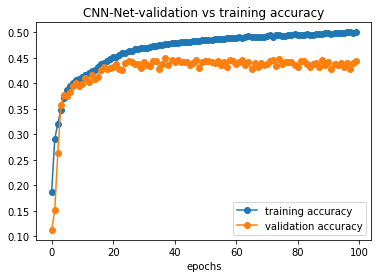

None

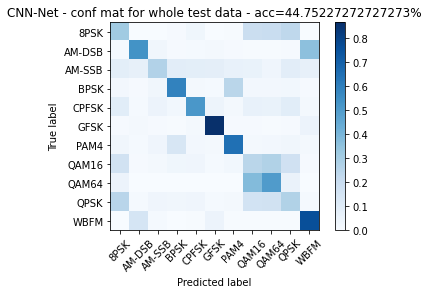

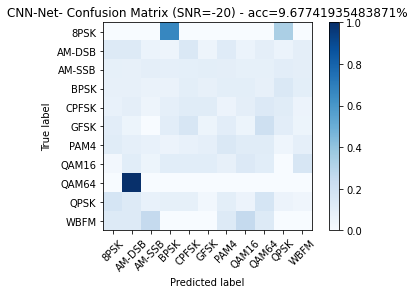

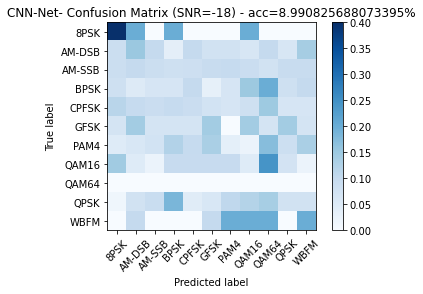

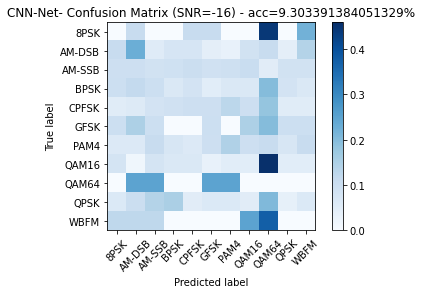

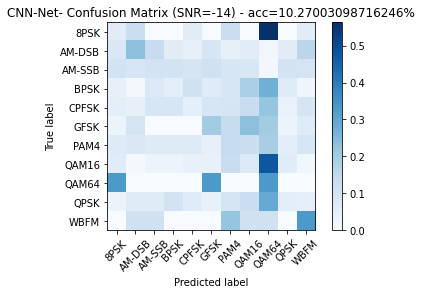

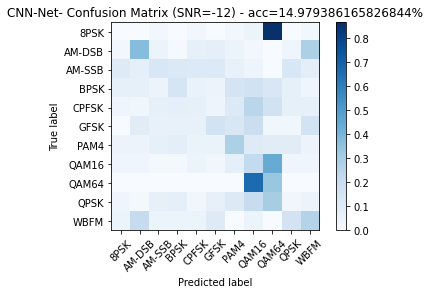

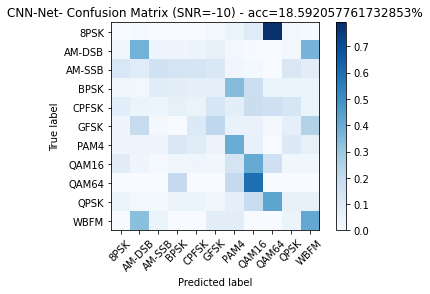

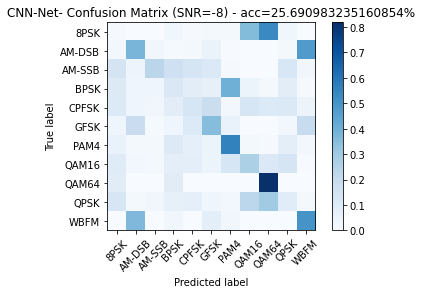

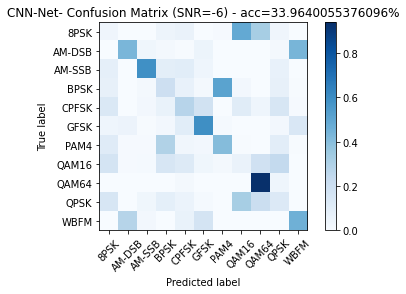

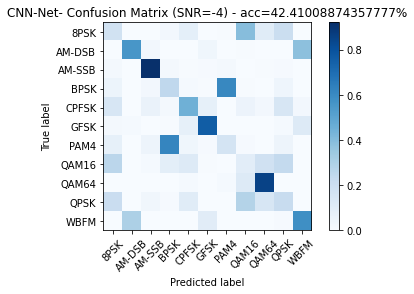

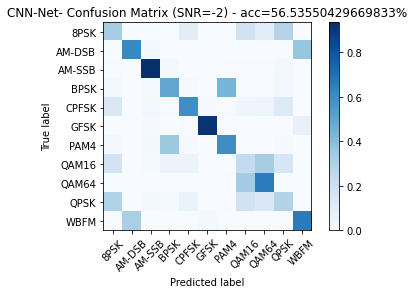

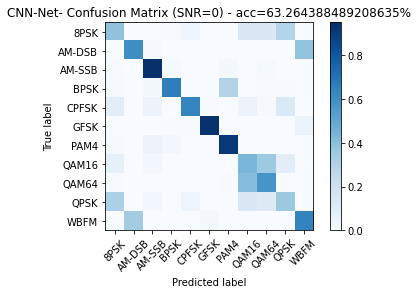

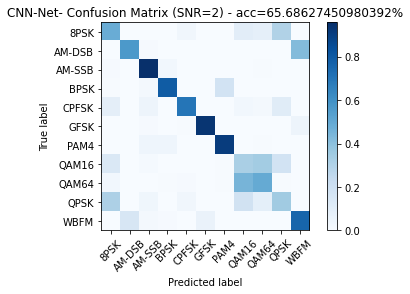

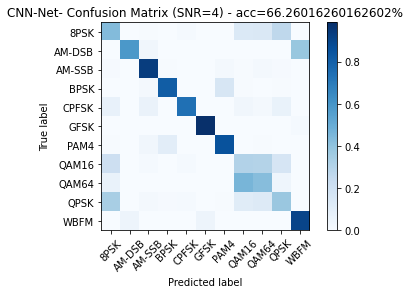

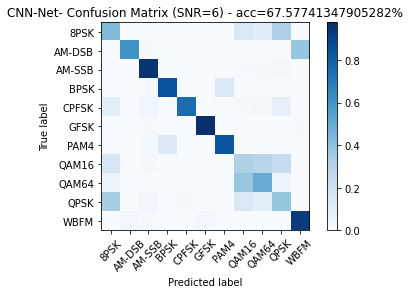

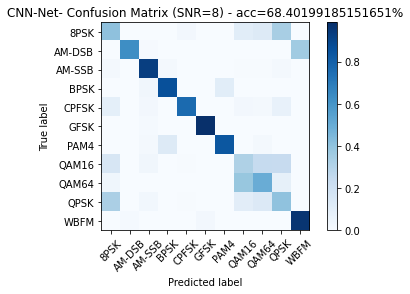

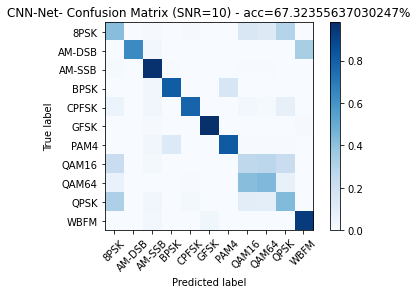

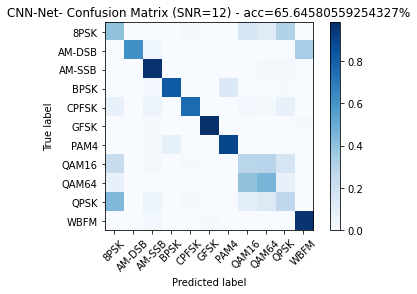

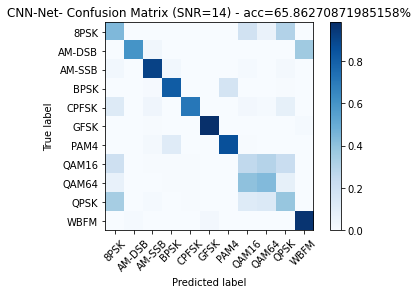

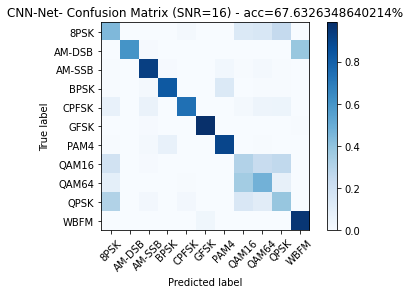

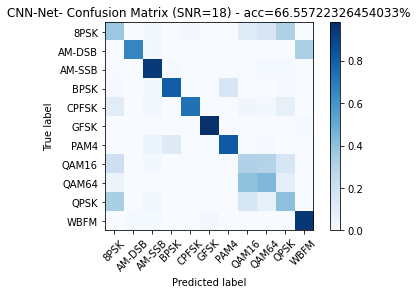

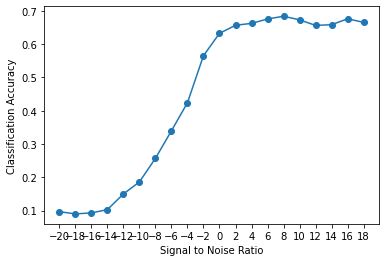

In [ ]:
model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 100, labels_test, labels, 'CNN-Net')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/2016.04C.multisnr"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
score = model1.evaluate(X_test, Y_test, batch_size=batch_size)
print(model1.metrics_names)
print (score)

81030/81030 [==============================] - 0s 4us/step
['loss', 'accuracy']
[0.9581276385726663, 0.62703937292099]


In [ ]:
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D

In [ ]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives -- 
#  - Reshape [N,2,128] to [N,1,2,128] on input
#  - Pass through 2 2DConv/ReLu layers
#  - Pass through 2 Dense layers (ReLu and Softmax)
#  - Perform categorical cross entropy optimization
 
dr = 0.1 # dropout rate (%)
model = keras.models.Sequential()
model.add(Reshape(in_shp+[1], input_shape=in_shp))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 2, 132, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 130, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 130, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 2, 134, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 132, 16)        6160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 132, 16)       

In [ ]:
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Train on 76978 samples, validate on 4052 samples
Epoch 1/100
 - 8s - loss: 2.1628 - accuracy: 0.2657 - val_loss: 1.6574 - val_accuracy: 0.4030
Epoch 2/100
 - 3s - loss: 1.4181 - accuracy: 0.4777 - val_loss: 1.2172 - val_accuracy: 0.5553
Epoch 3/100
 - 3s - loss: 1.1560 - accuracy: 0.5670 - val_loss: 1.1125 - val_accuracy: 0.5775
Epoch 4/100
 - 3s - loss: 1.0721 - accuracy: 0.5964 - val_loss: 1.0717 - val_accuracy: 0.5987
Epoch 5/100
 - 3s - loss: 1.0225 - accuracy: 0.6140 - val_loss: 1.0600 - val_accuracy: 0.6074
Epoch 6/100
 - 3s - loss: 0.9668 - accuracy: 0.6348 - val_loss: 1.0487 - val_accuracy: 0.6069
Epoch 7/100
 - 3s - loss: 0.9099 - accuracy: 0.6581 - val_loss: 1.0596 - val_accuracy: 0.6061
Epoch 8/100
 - 3s - loss: 0.8553 - accuracy: 0.6786 - val_loss: 1.0872 - val_accuracy: 0.6093
Epoch 9/100
 - 3s - loss: 0.7867 - accuracy: 0.7068 - val_loss: 1.1342 - val_accuracy: 0.6064
Epoch 10/100
 - 3s - loss: 0.7242 - accuracy: 0.7292 - val_loss: 1.1821 - val_accuracy: 0.6078
Epoch 11/1

In [ ]:
scscore = model.evaluate(X_test, Y_test, batch_size=batch_size)
print(model.metrics_names)
print (scscore)

81030/81030 [==============================] - 1s 14us/step
['loss', 'accuracy']
[1.0401306500258187, 0.6051462292671204]


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

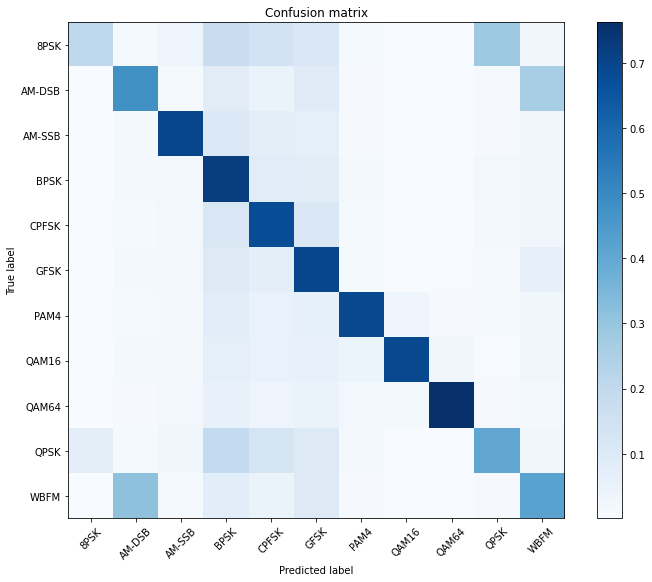

In [ ]:
# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)
# on the right its a color chart to indicate that the darker the color the easier and thee most to identify

Overall Accuracy:  0.12999255767799553
Overall Accuracy:  0.1317276972229049
Overall Accuracy:  0.13609467455621302
Overall Accuracy:  0.1741614906832298
Overall Accuracy:  0.18940493468795355
Overall Accuracy:  0.270223752151463
Overall Accuracy:  0.43644379132990446
Overall Accuracy:  0.5913129318854886
Overall Accuracy:  0.7253467843631778
Overall Accuracy:  0.8017262638717633
Overall Accuracy:  0.8083891784561926
Overall Accuracy:  0.8037521599605035
Overall Accuracy:  0.8431038676720992
Overall Accuracy:  0.872534516765286
Overall Accuracy:  0.8178694158075601
Overall Accuracy:  0.883761105626851
Overall Accuracy:  0.91712158808933
Overall Accuracy:  0.8087173100871731
Overall Accuracy:  0.8731214584873122
Overall Accuracy:  0.9006474103585658


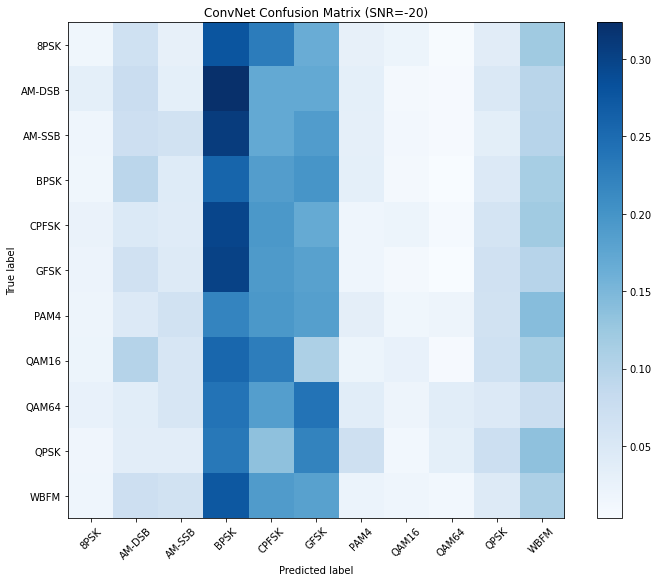

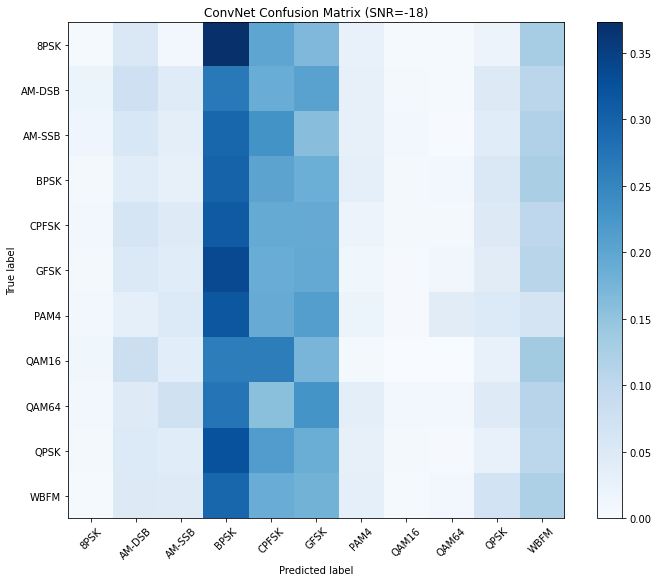

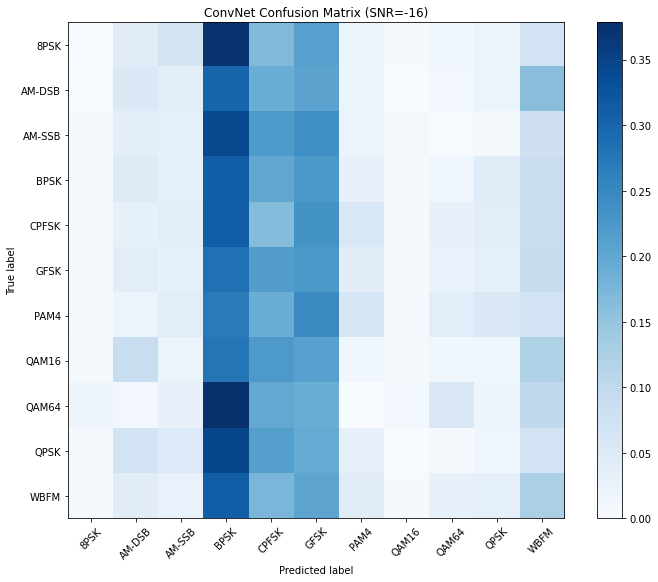

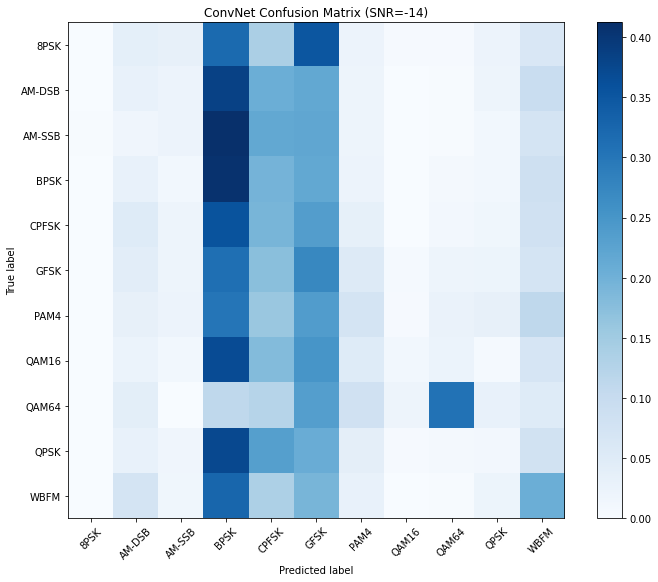

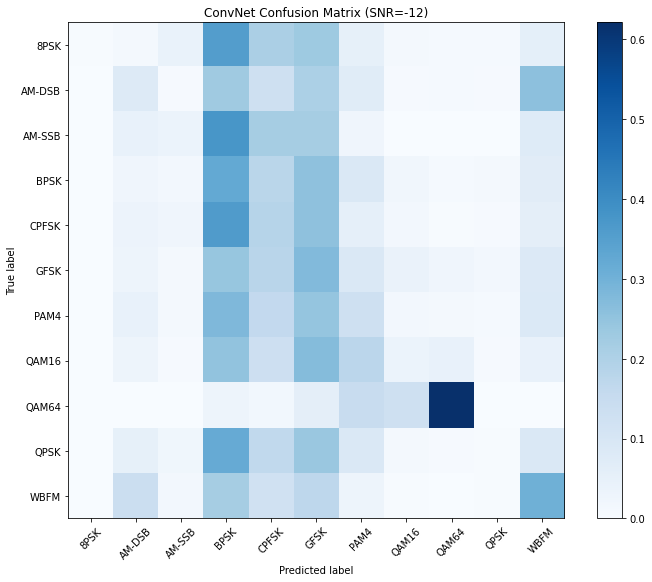

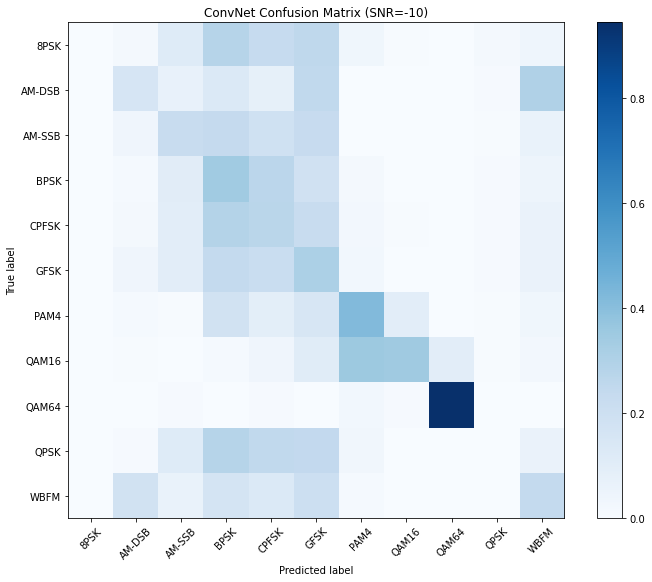

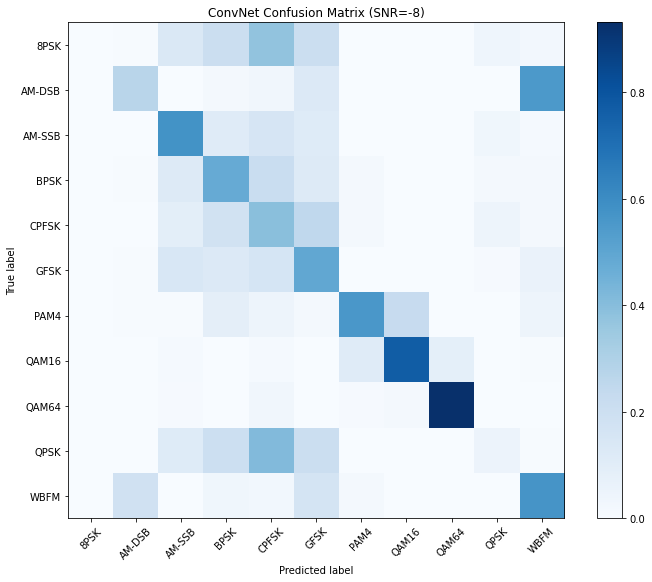

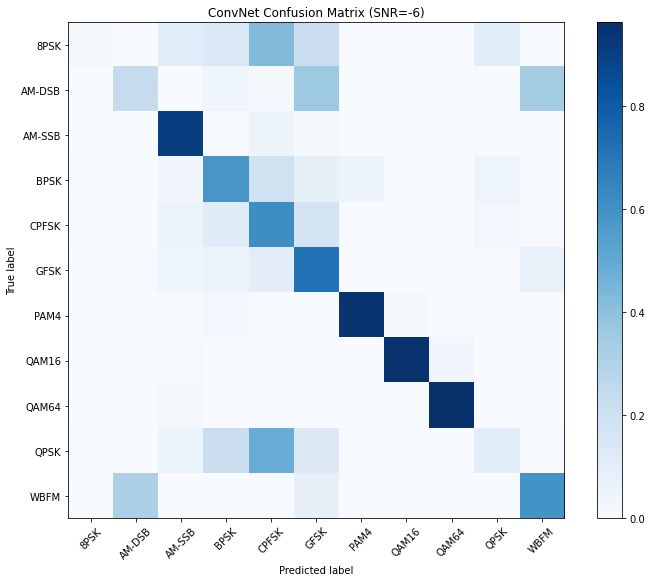

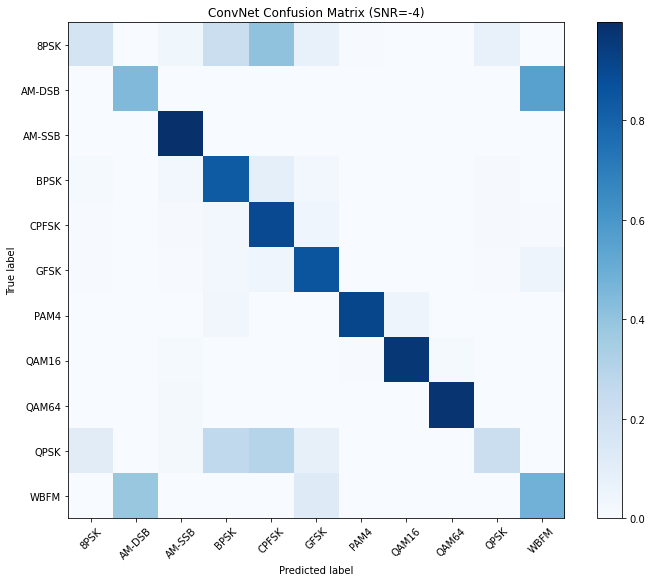

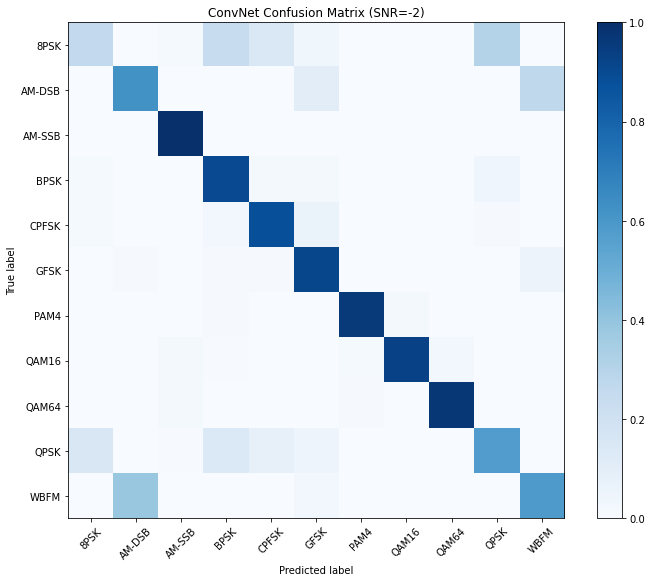

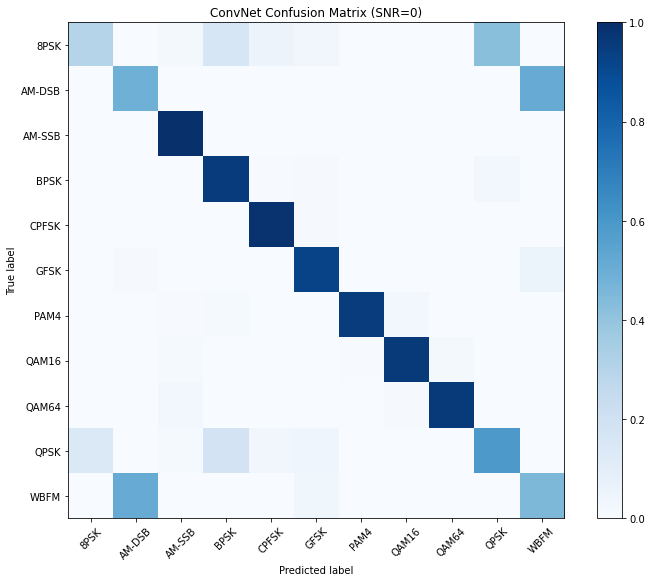

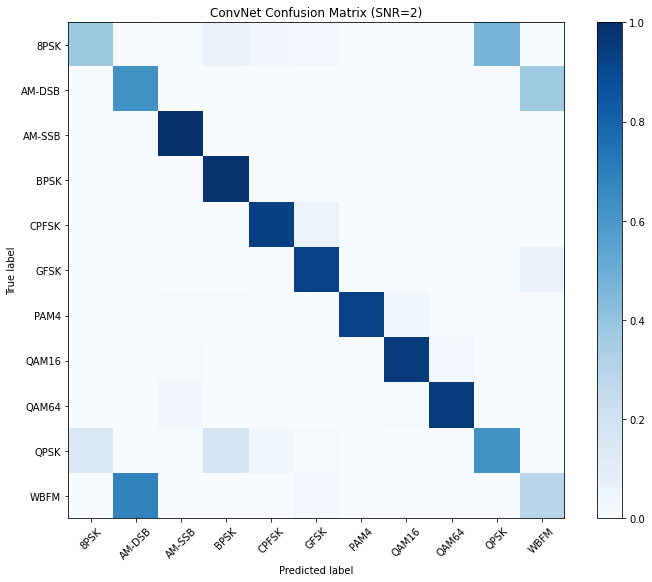

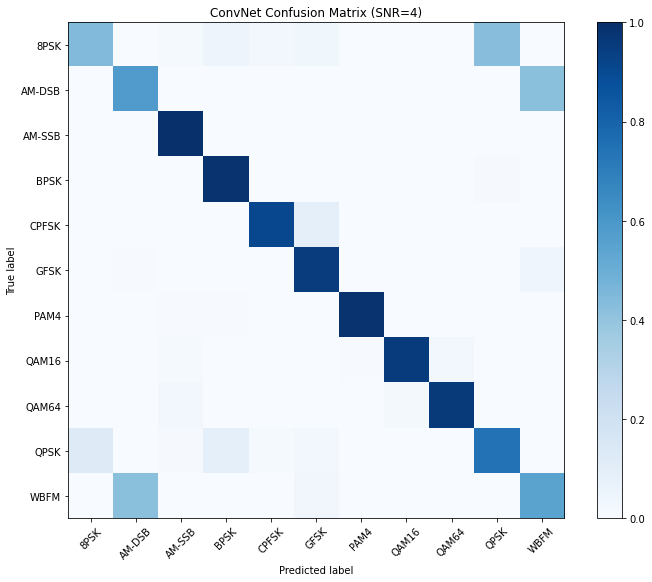

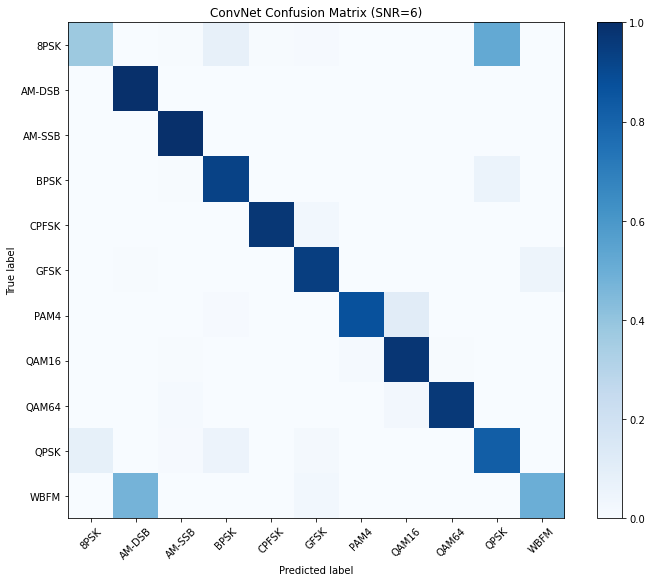

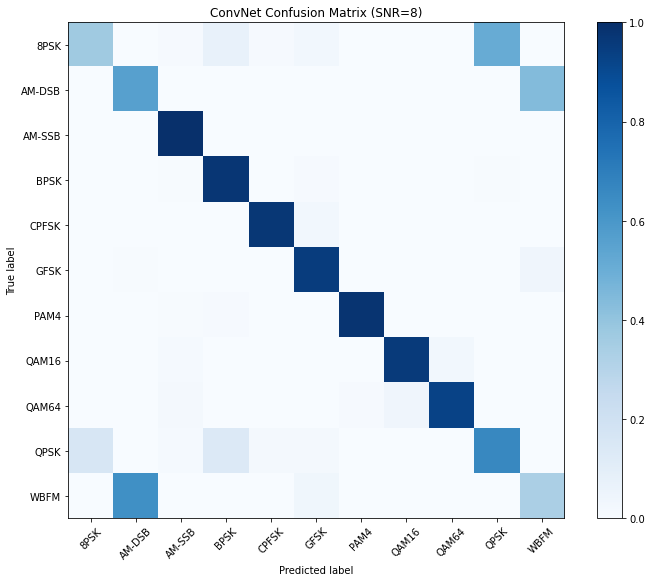

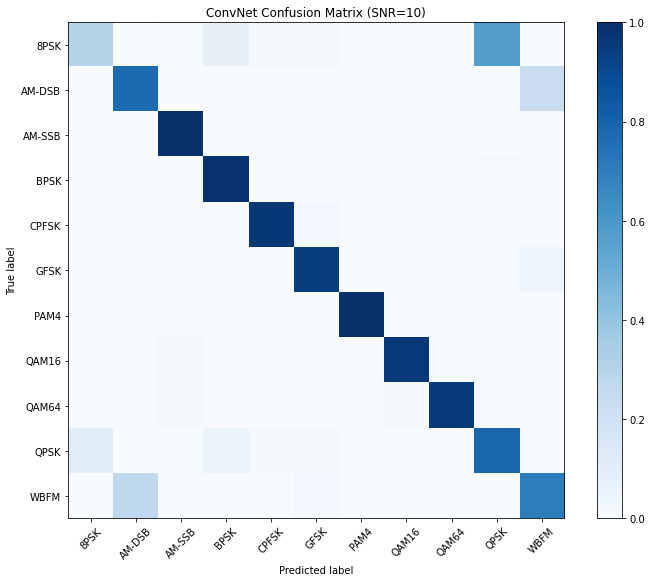

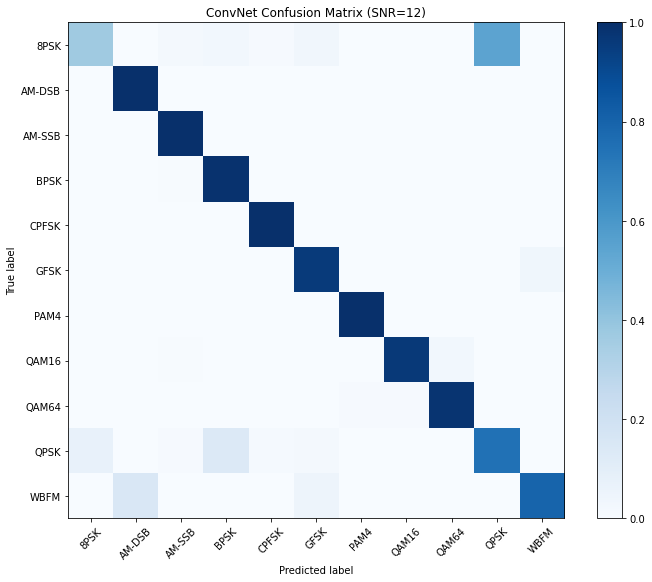

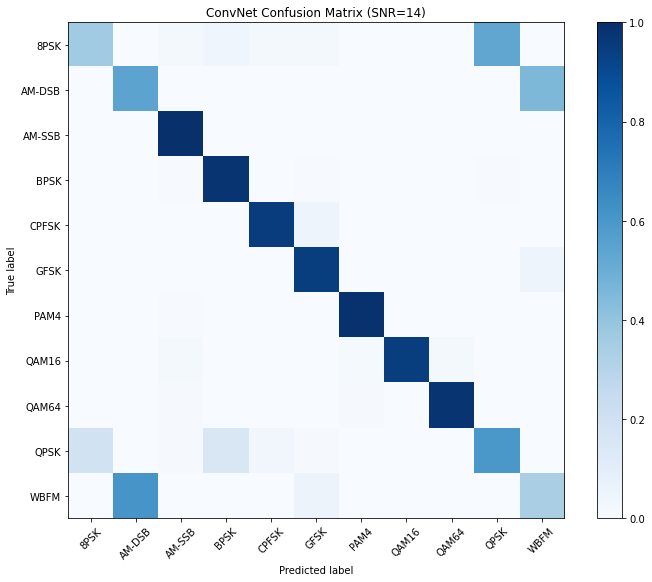

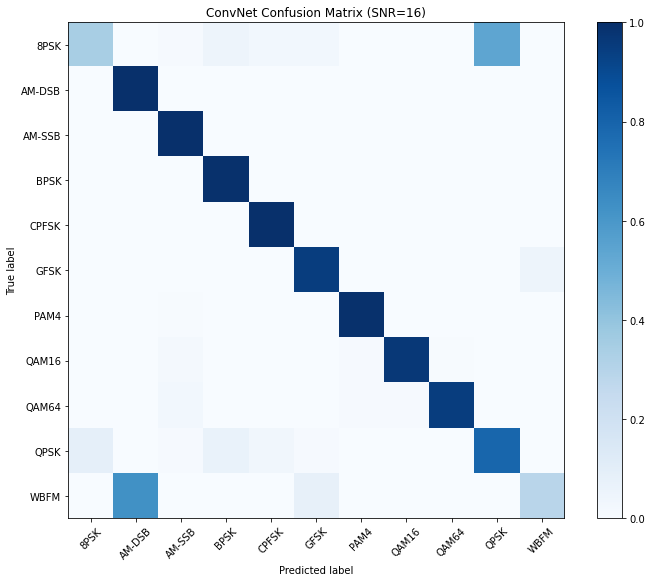

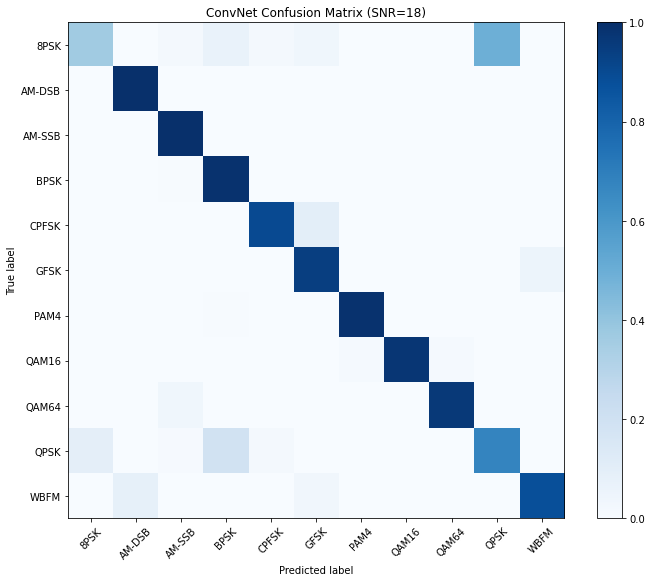

In [ ]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN2 Classification Accuracy on RadioML 2016.10 Alpha')

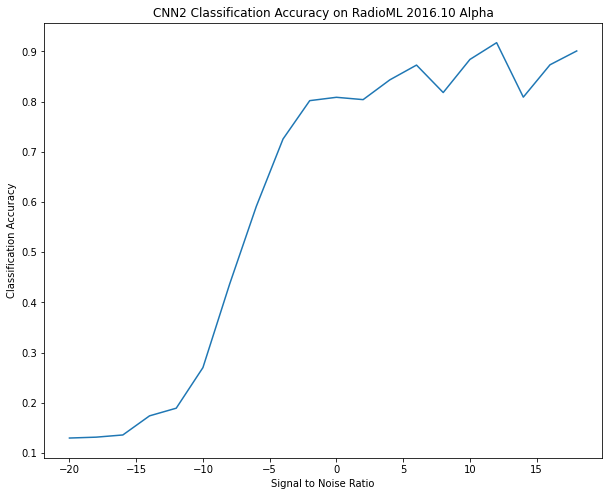

In [ ]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy on RadioML 2016.10 Alpha")

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, BatchNormalization, Conv2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping
from scipy.interpolate import UnivariateSpline
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.convolutional import Convolution1D ,Convolution2D, MaxPooling2D
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
with open('2016.04C.multisnr.pkl','rb') as f:
  data = pickle.load(f,encoding='bytes')

In [ ]:
X = []
labels = [] # label each example by a pair (modulation type, snr)
total_examples = 0
for mod_type, snr in data.keys():
  current_matrix = data[(mod_type, snr)]
  total_examples += current_matrix.shape[0]
  for i in range(current_matrix.shape[0]):
    X.append(current_matrix[i])
    labels.append((str(mod_type, 'ascii'), snr)) # mod_type is of type bytes
X = np.array(X)
labels = np.array(labels)
print(f'loaded {total_examples} signal vectors into X{X.shape} and their corresponding'
      f' labels into labels{labels.shape}')

loaded 162060 signal vectors into X(162060, 2, 128) and their corresponding labels into labels(162060, 2)


In [ ]:

data.keys()

dict_keys([(b'QPSK', 2), (b'PAM4', 8), (b'AM-DSB', -4), (b'GFSK', 6), (b'QAM64', 8), (b'AM-SSB', 12), (b'PAM4', 18), (b'QAM64', -6), (b'QAM16', 2), (b'QAM16', -20), (b'8PSK', -18), (b'PAM4', -6), (b'WBFM', -18), (b'BPSK', 8), (b'CPFSK', 10), (b'WBFM', 6), (b'BPSK', 4), (b'BPSK', -2), (b'QPSK', -20), (b'CPFSK', -8), (b'AM-SSB', 6), (b'QAM64', -20), (b'QAM16', 12), (b'GFSK', -20), (b'AM-SSB', -12), (b'CPFSK', 0), (b'AM-DSB', 6), (b'BPSK', -16), (b'QPSK', -6), (b'8PSK', -12), (b'CPFSK', -18), (b'AM-DSB', -18), (b'QPSK', 8), (b'PAM4', 14), (b'WBFM', -8), (b'AM-DSB', -10), (b'GFSK', 12), (b'QAM64', 2), (b'8PSK', -10), (b'AM-SSB', -18), (b'QAM64', -4), (b'GFSK', -4), (b'AM-DSB', 8), (b'PAM4', -16), (b'QPSK', -16), (b'BPSK', 16), (b'WBFM', -14), (b'CPFSK', 16), (b'WBFM', 0), (b'QPSK', 6), (b'BPSK', 14), (b'AM-DSB', -8), (b'GFSK', -10), (b'CPFSK', -2), (b'AM-SSB', 8), (b'QAM16', 8), (b'QAM16', 6), (b'QAM16', -16), (b'QAM64', 18), (b'AM-SSB', -2), (b'CPFSK', 6), (b'BPSK', 0), (b'BPSK', -6), (b'

In [ ]:
def apply_per_channel(X, func, verbose=False):
  X_out = np.empty_like(X)
  for i in range(X.shape[0]):
    first_channel = np.expand_dims(func(X[i][0]), axis=0) 
    second_channel = np.expand_dims(func(X[i][1]), axis=0)
    X_out[i] = np.concatenate((first_channel, second_channel), axis=0)
    if verbose:
      print(f'done with example {i}')
      
  return X_out
      

X_der = apply_per_channel(X, np.gradient)
print(f'computed derivative per channel, output shape={X_der.shape}')

computed derivative per channel, output shape=(162060, 2, 128)


In [ ]:
# this takes some time
def antiderivative(vec):
  time_steps = np.arange(128)
  antider = UnivariateSpline(time_steps, vec).antiderivative()
  return np.array([antider(t) for t in time_steps])

  
  
X_int = apply_per_channel(X, antiderivative, False)
print(f'computed antiderivative per channel, output shape={X_int.shape}')

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


computed antiderivative per channel, output shape=(162060, 2, 128)


In [ ]:
def get_fft_channel(X):
  cplx_X = 1j*X[:,1,:] + X[:,0,:]
  X_fft = np.empty_like(cplx_X).astype('float32')
  for i in range(X.shape[0]):
    X_fft[i] = np.absolute(np.fft.fft(cplx_X[0]))
        
  return X_fft.reshape(X_fft.shape[0], 1, X_fft.shape[1])

X_fft, freq_axis = get_fft_channel(X), np.fft.fftfreq(128)
print(f'computed the fft of the signals, X_fft{X_fft.shape}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


computed the fft of the signals, X_fft(162060, 1, 128)


In [ ]:

feature_battery = {'raw':X, 'derivative':X_der, 'integration':X_int, 'fft':X_fft}
def combine_features(*feature_names):
  return np.concatenate([feature_battery[feature] for feature in feature_names], axis=1)

In [ ]:

# take 20% of the data for testing and 10% of training for validation
TEST_PERCENTAGE = 0.2
VALIDATION_PERCENTAGE = 0.05

EPOCHS = 20
NUM_CLASSES = 11
BATCH_SIZE = 1024

In [ ]:
def split_data(data, labels, percentage):
  
  split_point = int((1-percentage)*data.shape[0])
  data_train = data[0:split_point]
  data_test = data[split_point:]
  labels_train = labels[0:split_point]
  labels_test = labels[split_point:]
  y_train = labels_train[:,0]
  y_test = labels_test[:,0]
  return data_train, data_test, labels_train, labels_test, y_train, y_test


# permute the examples and their corresponding labels
idx_list = np.random.permutation(labels.shape[0]) # get a permuted index list 
X = X[idx_list]
labels = labels[idx_list]

X_train, X_test, labels_train, labels_test, y_train, y_test = split_data(X,labels, TEST_PERCENTAGE)

print(f'shapes after train test split:\n'
      f'X_train{X_train.shape}, X_test{X_test.shape}, '
      f'labels_train{labels_train.shape}, labels_test{labels_test.shape}, '
      f'y_train{y_train.shape}, y_test{y_test.shape}')

shapes after train test split:
X_train(129648, 2, 128), X_test(32412, 2, 128), labels_train(129648, 2), labels_test(32412, 2), y_train(129648,), y_test(32412,)


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:

def generate_confusion_matrix(model, X,y, one_hot_transformer, batch_size):
    """
      y is the one hot encoded label vector passed to the model.evaluate
    """
    mod_to_idx = {mod:idx for idx,mod in enumerate(one_hot_transformer.classes_)} # use this to map modulation name to index
    y_hat = model.predict(X, batch_size)
    y_hat_onehot = np.zeros_like(y_hat)
    y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
    y_hat_mod = one_hot_transformer.inverse_transform(y_hat_onehot) # transform predictions to strings
    y_mod = one_hot_transformer.inverse_transform(y) # transform ground truth back to strings
    confusion_mat = np.zeros([NUM_CLASSES,NUM_CLASSES])

    acc = np.mean(y_mod == y_hat_mod)
    # fill in the confusion matrix
    for i in range(X.shape[0]):
        
        true_idx = mod_to_idx[y_mod[i]]
        pred_idx = mod_to_idx[y_hat_mod[i]]          
        confusion_mat[pred_idx,true_idx] += 1

    # normalize the matrix row wise
    for i in range(NUM_CLASSES):
        if np.sum(confusion_mat[i,:]) > 0:
          confusion_mat[i,:] /= np.sum(confusion_mat[i,:])
    
    return confusion_mat,acc

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, val_per, batch_size,
                   epochs, labels_test, labels, model_name):
  from IPython.display import display
  
  # get the modulation types into an array
  mod_types = np.unique(labels[:,0])
  
  # fit a label binarizer 
  mod_to_onehot = preprocessing.LabelBinarizer()
  mod_to_onehot.fit(mod_types)

  # transform the y values to one-hot encoding
  y_train = mod_to_onehot.transform(y_train)
  y_test = mod_to_onehot.transform(y_test)
  print(f'y_train{y_train.shape}')
  print(f'y_test{y_test.shape}')
  
  # train the model
  model_info = model.fit(X_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=VALIDATION_PERCENTAGE)
  
  # serialize weights to HDF5
  model.save_weights(f'model-{model_name}.h5')
  print("Saved model to disk")
  
  
  # plot validation accuracy vs training accuracy
  plt.plot(np.arange(len(model_info.history['accuracy'])),model_info.history['accuracy'], '-o', label='training accuracy')
  plt.plot(np.arange(len(model_info.history['accuracy'])), model_info.history['val_accuracy'], '-o', label='validation accuracy')
  plt.legend()
  plt.xlabel('epochs')
  plt.title(f'{model_name}-validation vs training accuracy')
  display(plt.show())
  
  # plot the confussion matrix for the whole test data
  conf_mat, avg_acc = generate_confusion_matrix(model, X_test, y_test, mod_to_onehot, batch_size)
  plot_confusion_matrix(conf_mat, labels=mod_to_onehot.classes_,
                        title=f'{model_name} - conf mat for whole test data - acc={avg_acc * 100}%')
  plt.show()  
  # plot the confusion matrix per snr
  
  snr_accs = {}
  snrs = np.unique(np.unique(labels,axis=0)[:,1]).astype('int32')
  for snr in sorted(snrs):
    idx = np.where(labels_test[:,1]==str(snr))
    X_snr = X_test[idx]
    y_snr = y_test[idx]
    conf_mat, acc = generate_confusion_matrix(model, X_snr, y_snr, mod_to_onehot, batch_size)
    snr_accs[snr] = acc
    plot_confusion_matrix(conf_mat, labels=mod_to_onehot.classes_, 
                          title=f'{model_name}- Confusion Matrix (SNR={snr}) - acc={acc*100}%')
    plt.show()
    
  # plot the accuracy against the snr
  plt.plot(snr_accs.keys(),snr_accs.values(), '-o')
  plt.xlabel("Signal to Noise Ratio")
  plt.ylabel("Classification Accuracy")
  plt.xticks(list(snr_accs.keys()))
  plt.show()

In [ ]:
def build_cnn_net():
  reg = 1e-3
  dropout = 0.2

  cnn_model = Sequential()
  cnn_model.add(Reshape((1,X.shape[1], X.shape[2]), input_shape=(X.shape[1], X.shape[2])))
  cnn_model.add(Convolution2D(64, (3,3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(16, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  cnn_model.add(Dropout(rate=dropout))
  cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))
  cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 2, 64)          256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 2, 16)          9232      
_________________________________________________________________
batch_normalization_10 (Batc (None, 1, 2, 16)          64        
_________________________________________________________________
flatten_7 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

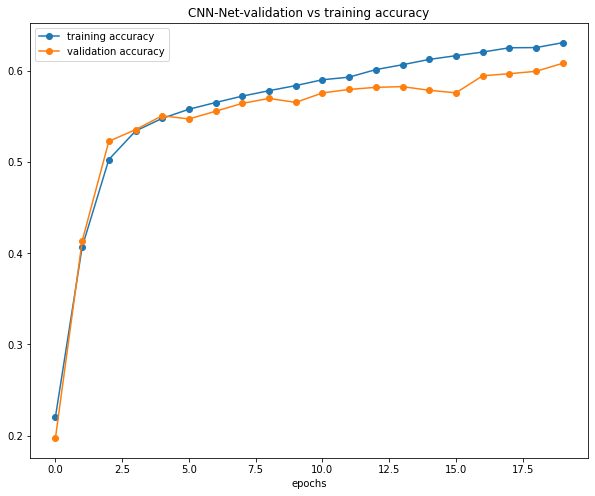

None

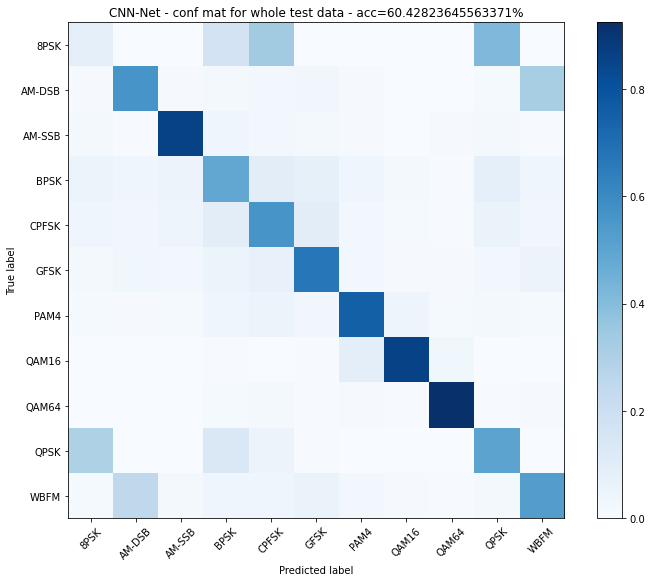

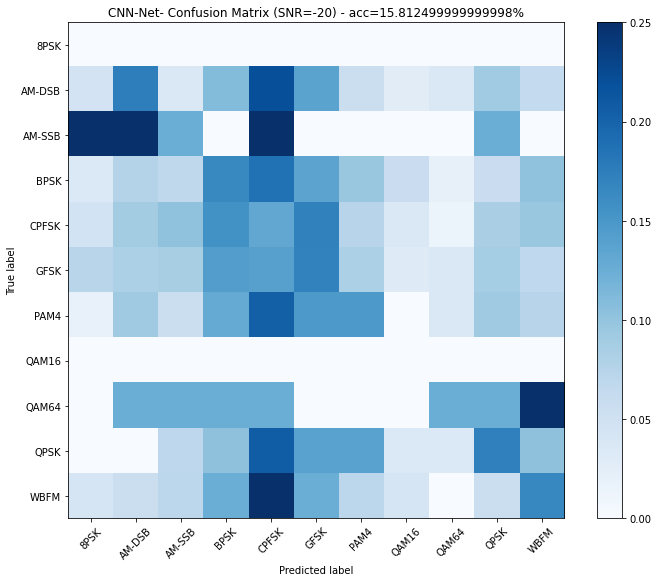

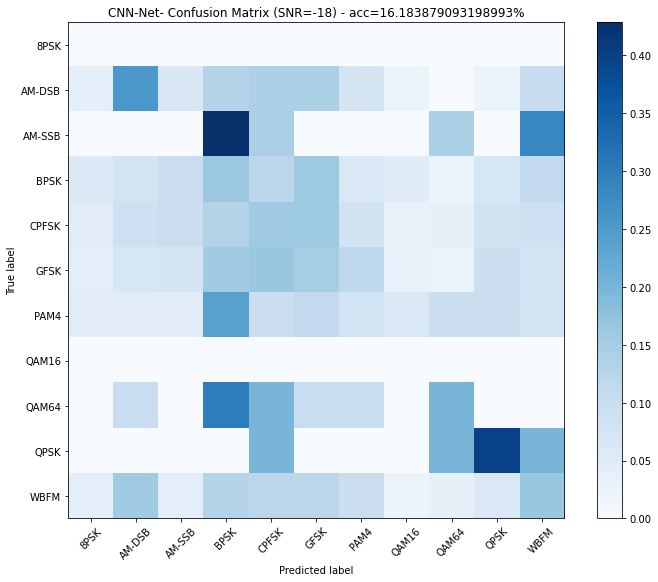

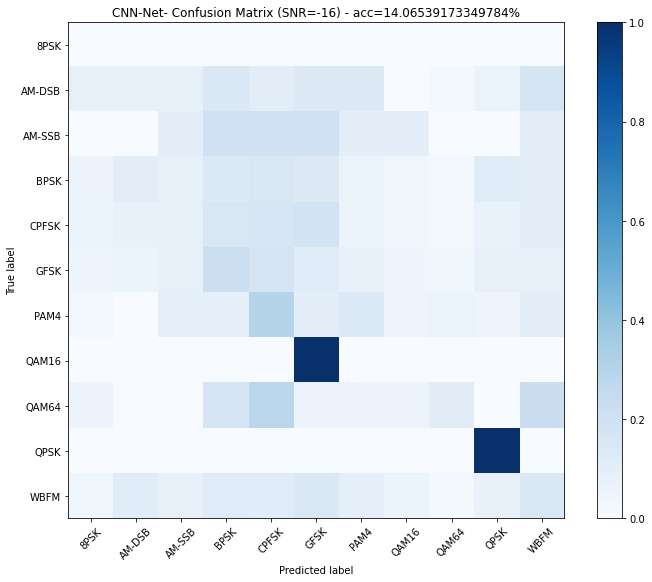

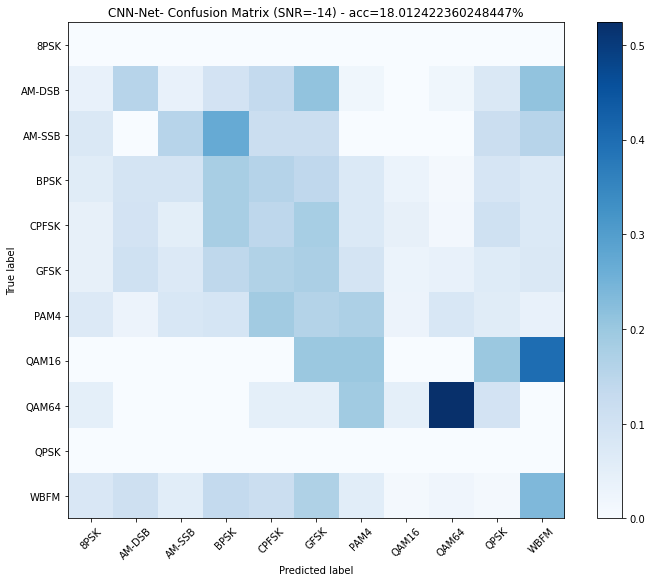

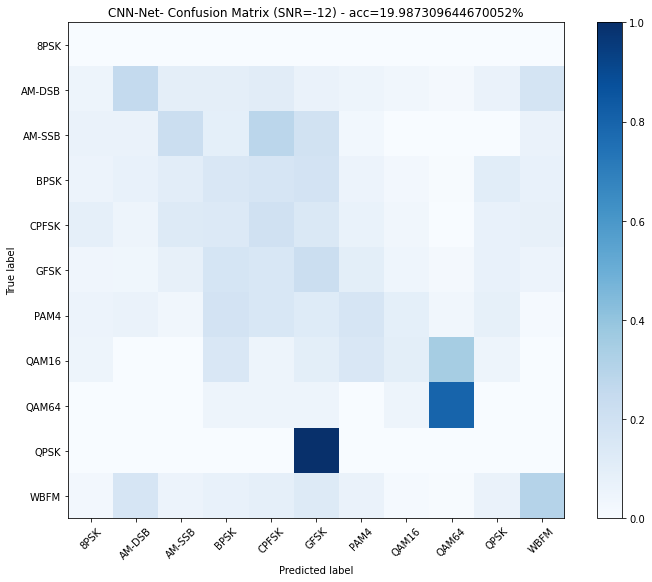

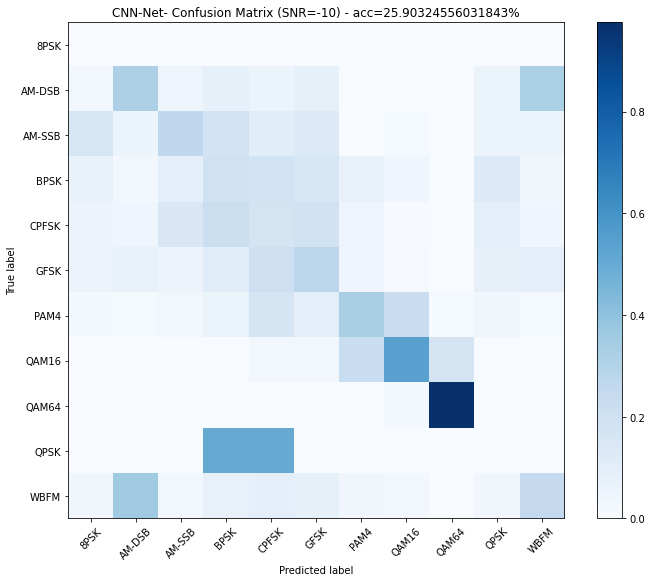

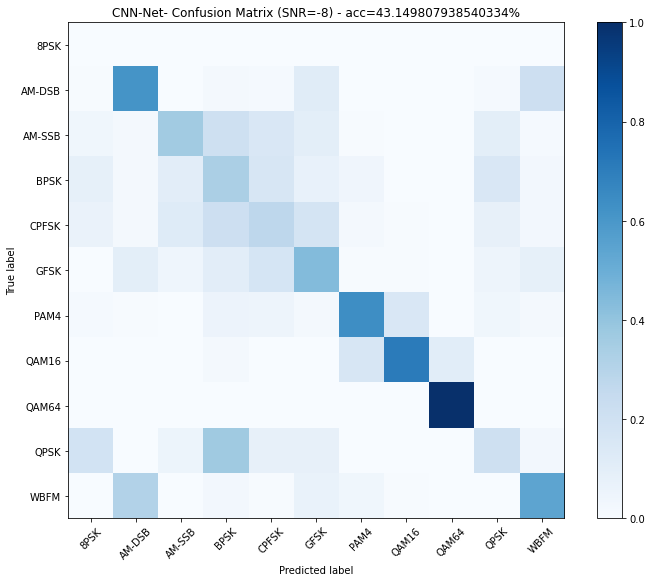

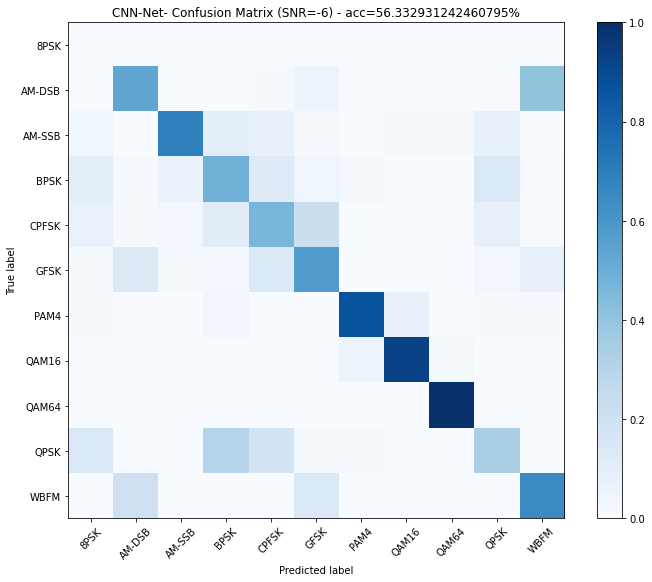

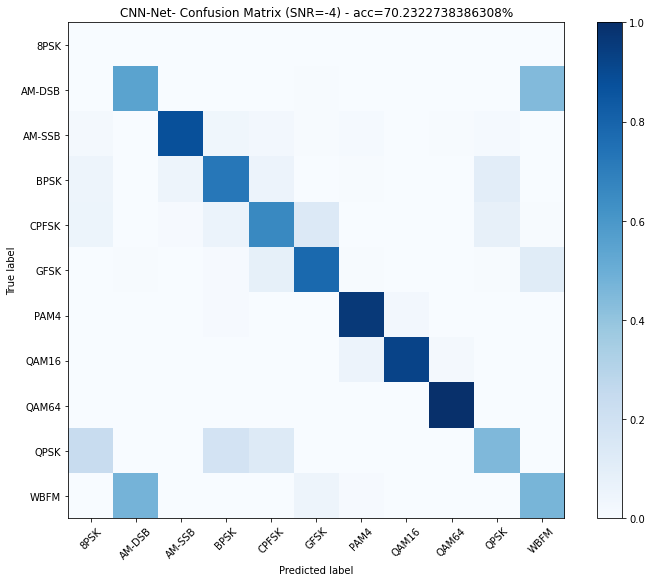

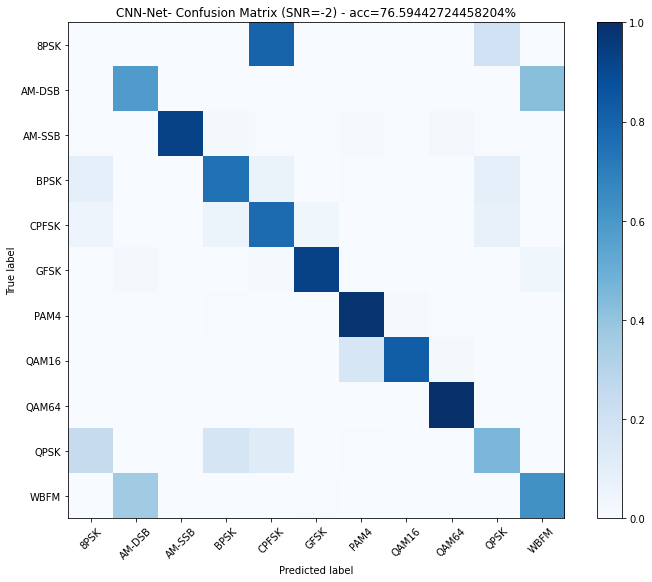

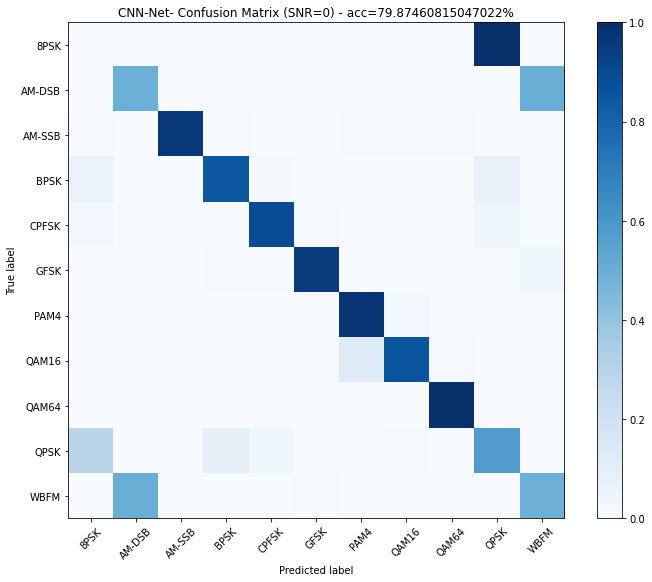

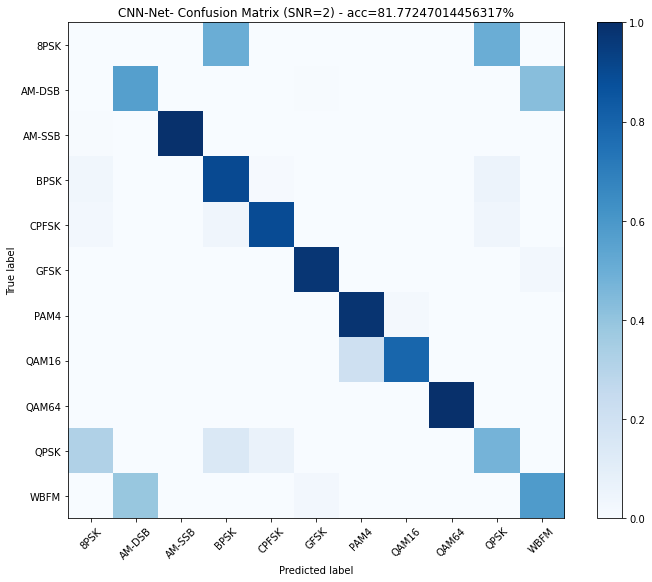

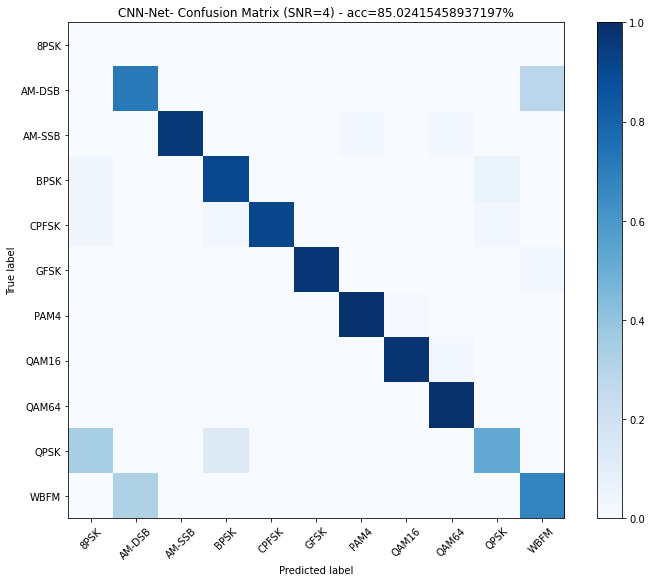

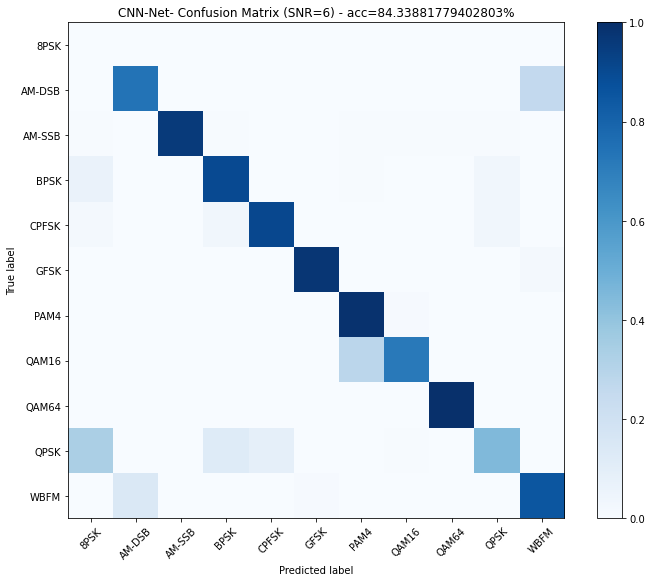

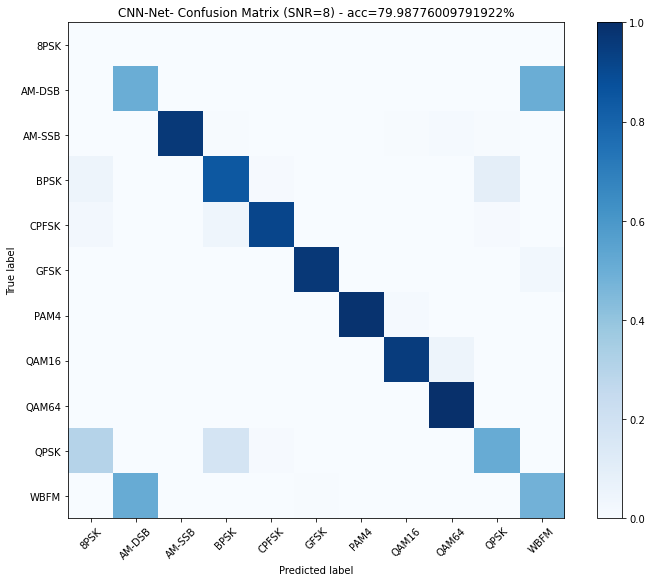

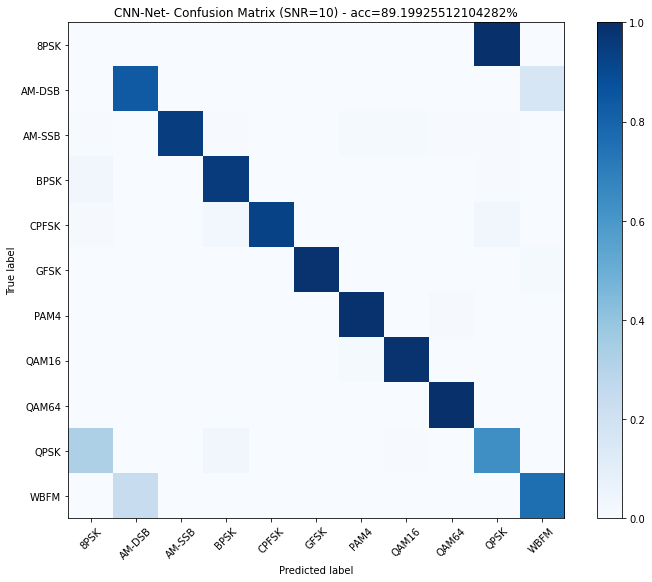

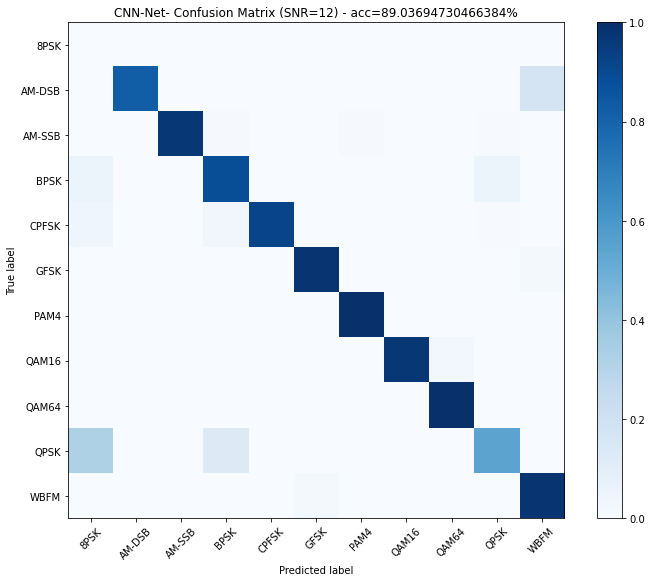

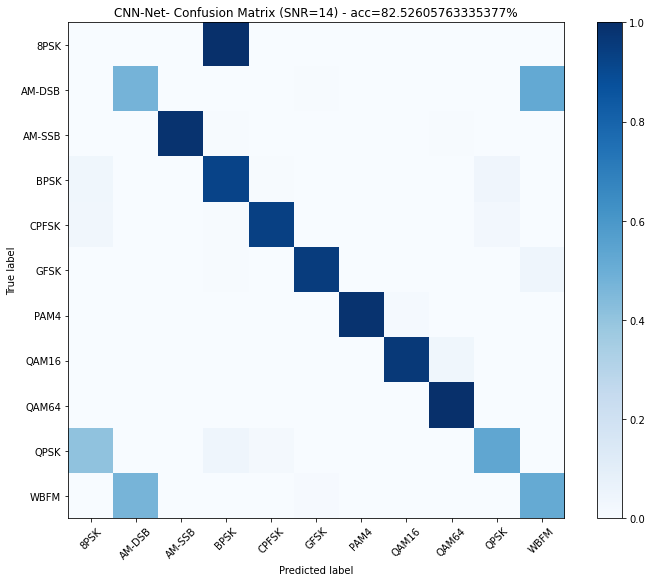

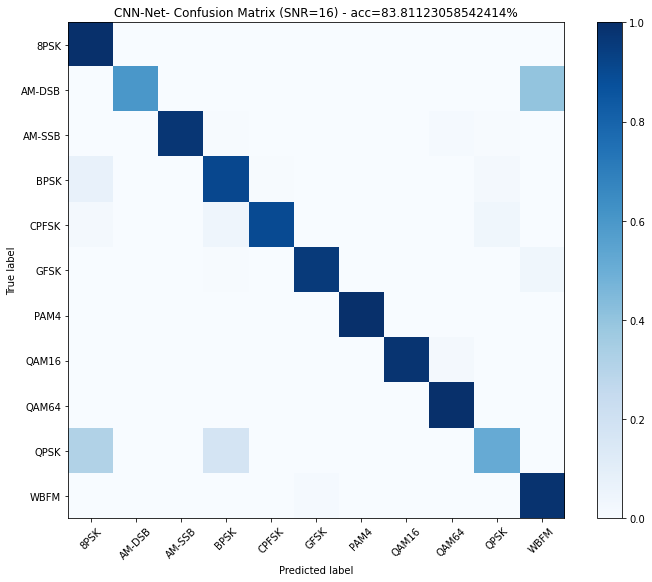

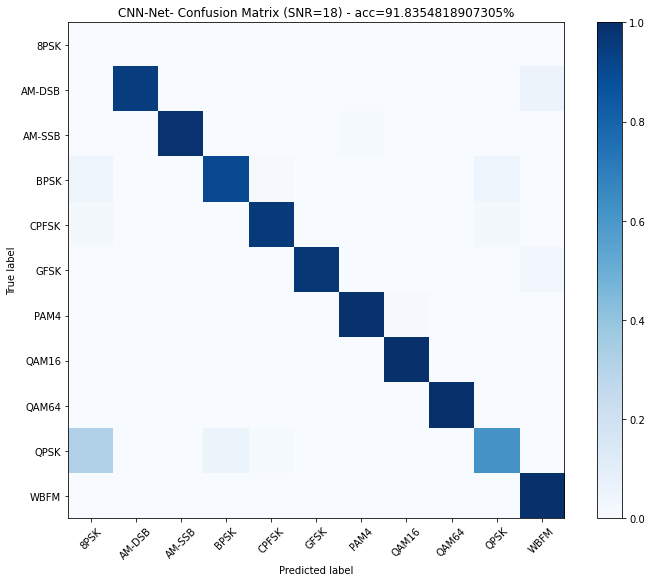

TypeError: ignored

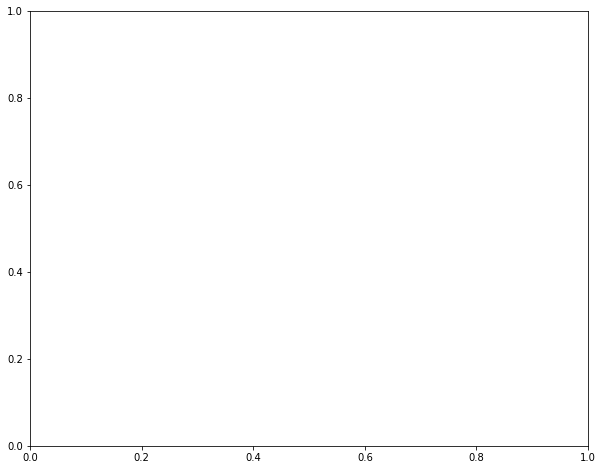

In [ ]:

model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 20, labels_test, labels, 'CNN-Net')

In [ ]:
def build_cnn_net():
  reg = 1e-3
  dropout = 0.2

  cnn_model = Sequential()
  cnn_model.add(Reshape((1,X.shape[1], X.shape[2]), input_shape=(X.shape[1], X.shape[2])))
  cnn_model.add(Convolution2D(64, (3,3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(96, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  cnn_model.add(Dropout(rate=dropout))
  cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))
  cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
batch_normalization_13 (Batc (None, 1, 2, 64)          256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 2, 96)          55392     
_________________________________________________________________
batch_normalization_14 (Batc (None, 1, 2, 96)          384       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 2, 128)         110720    
_________________________________________________________________
batch_normalization_15 (Batc (None, 1, 2, 128)       

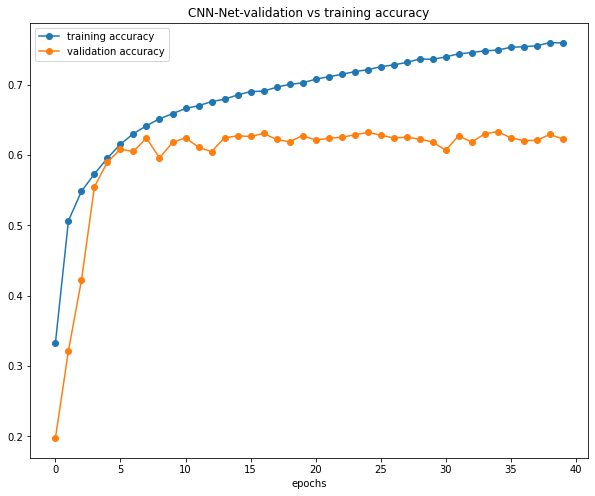

None

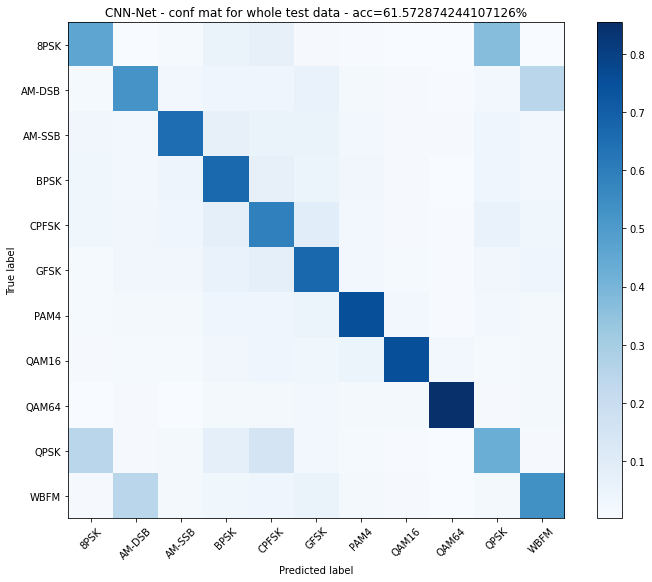

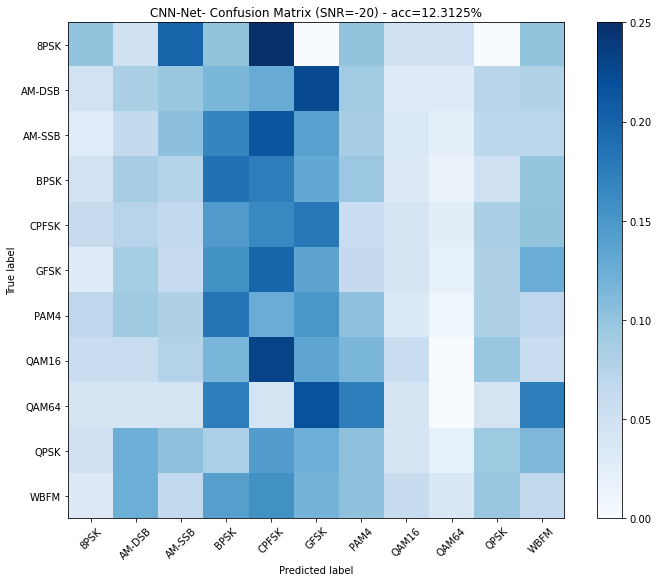

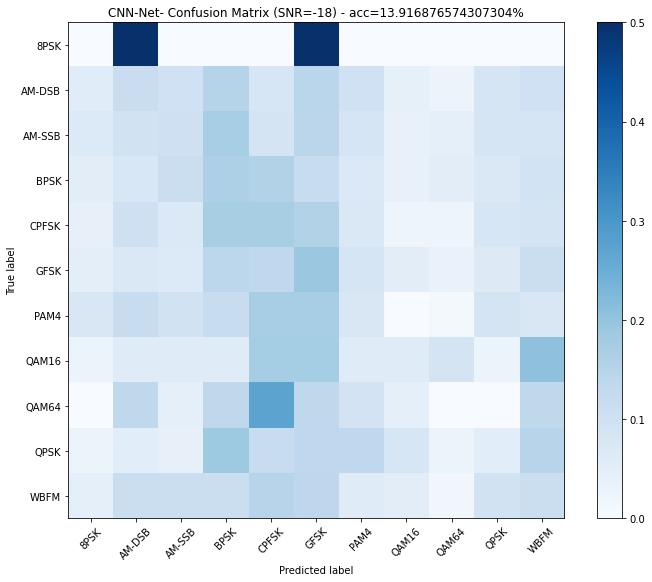

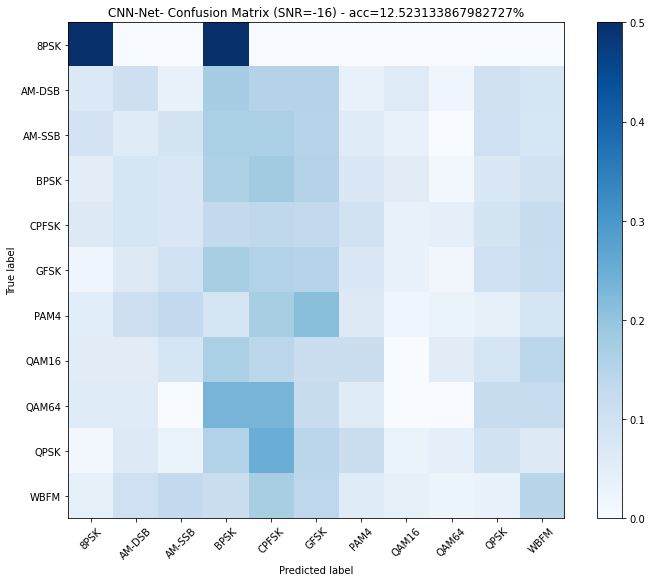

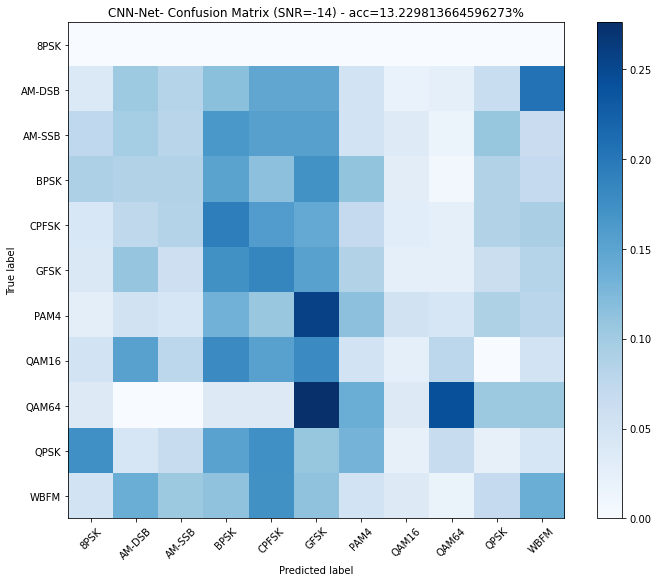

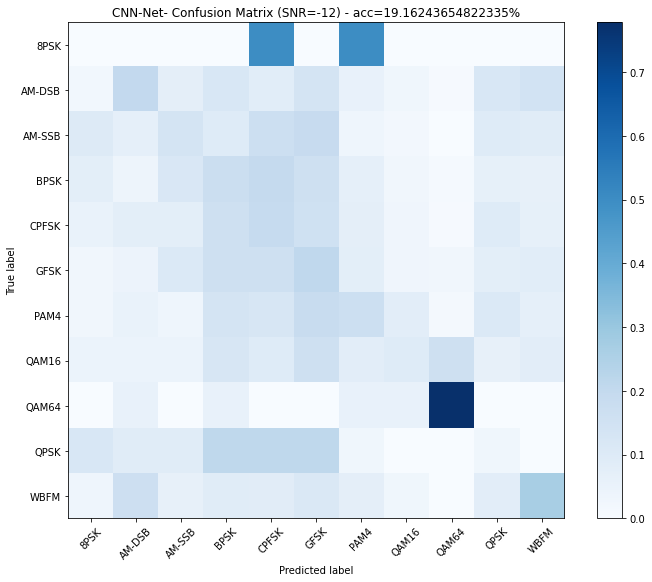

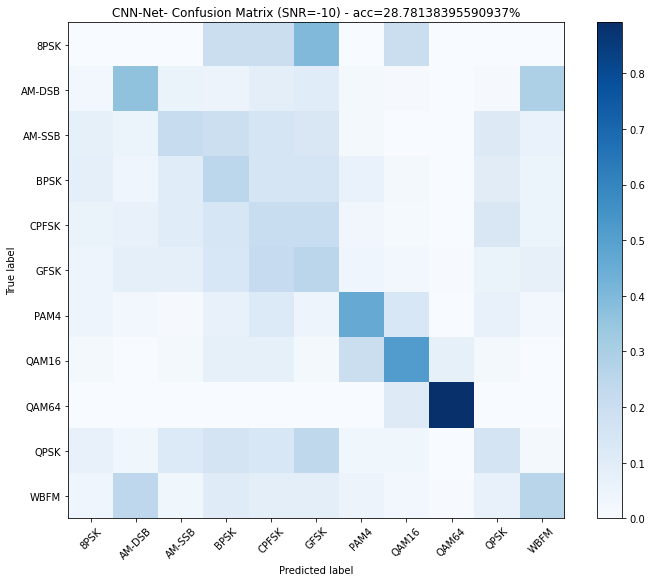

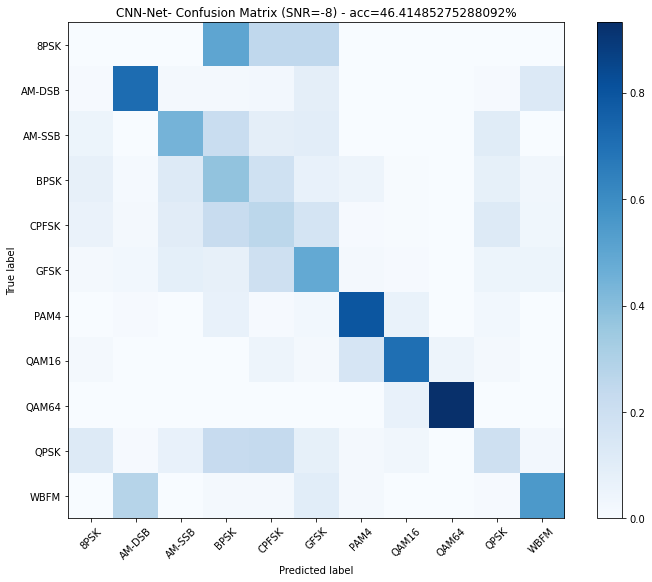

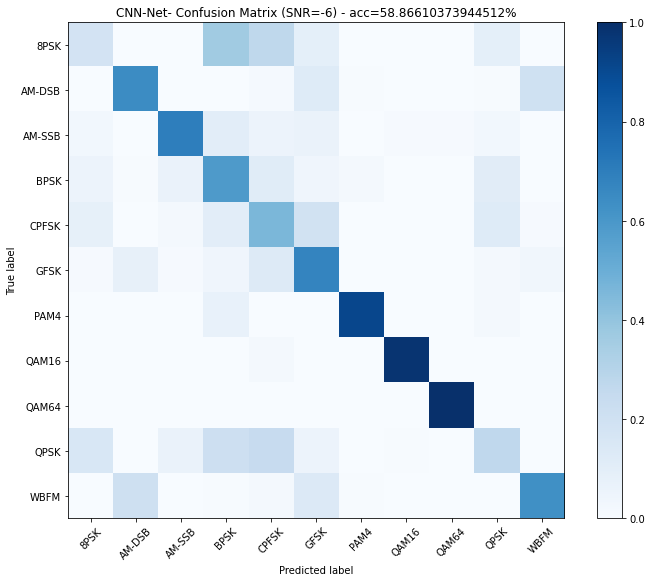

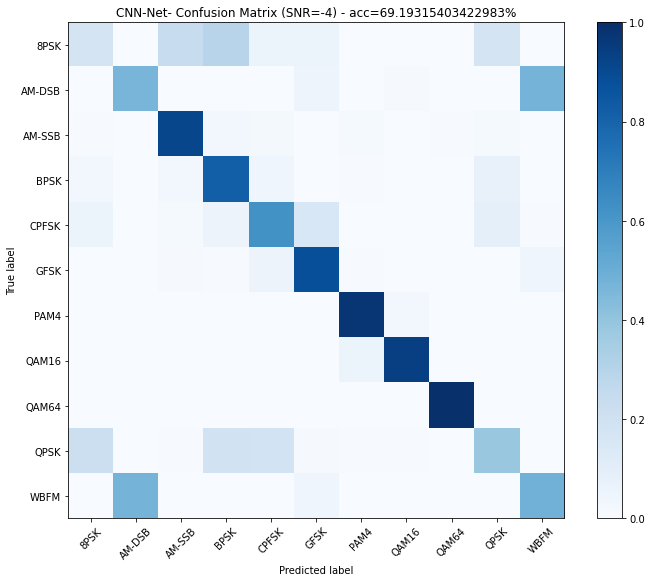

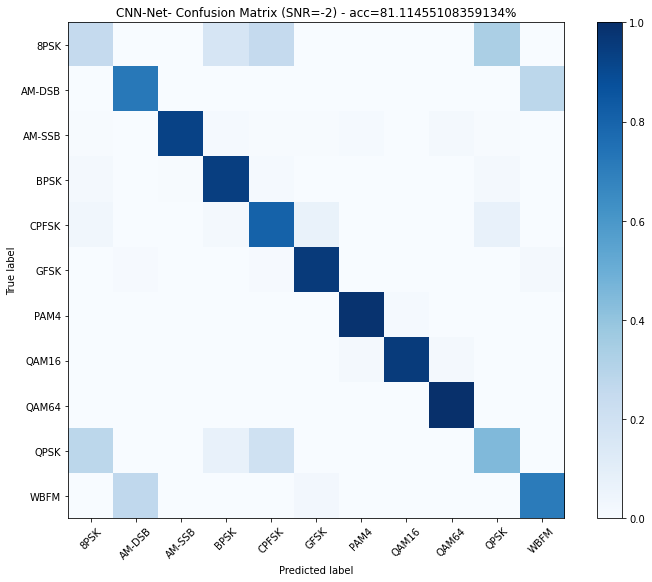

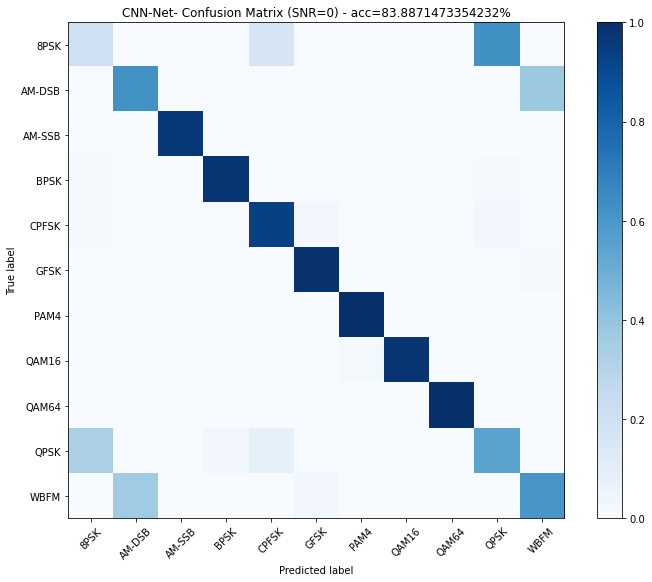

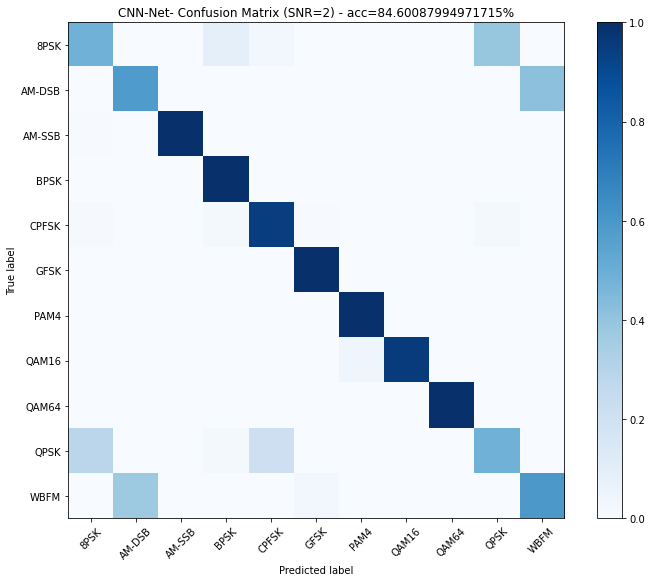

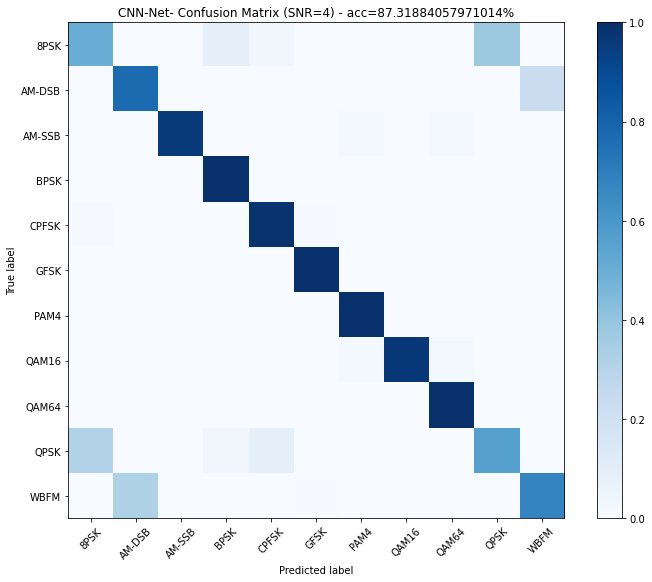

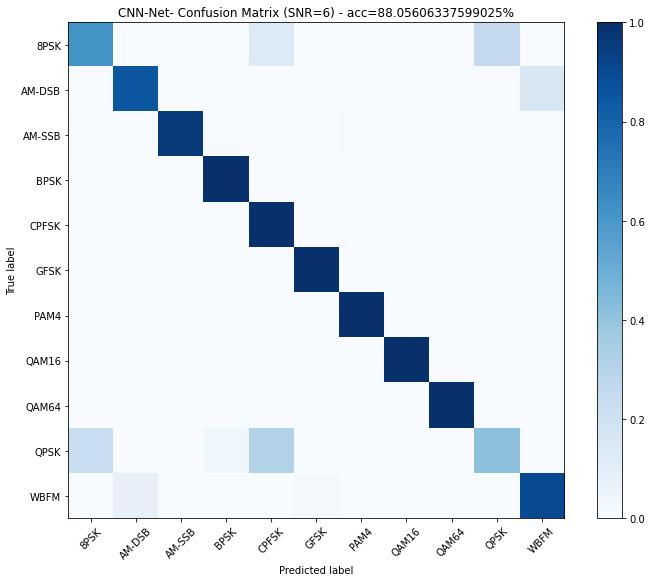

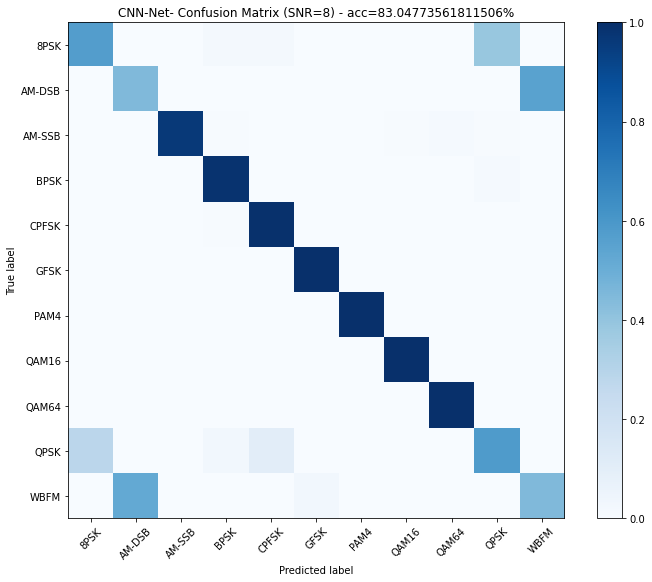

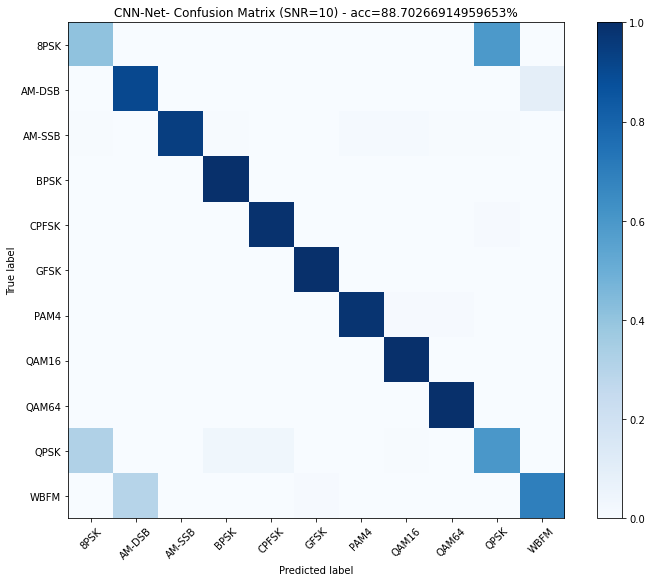

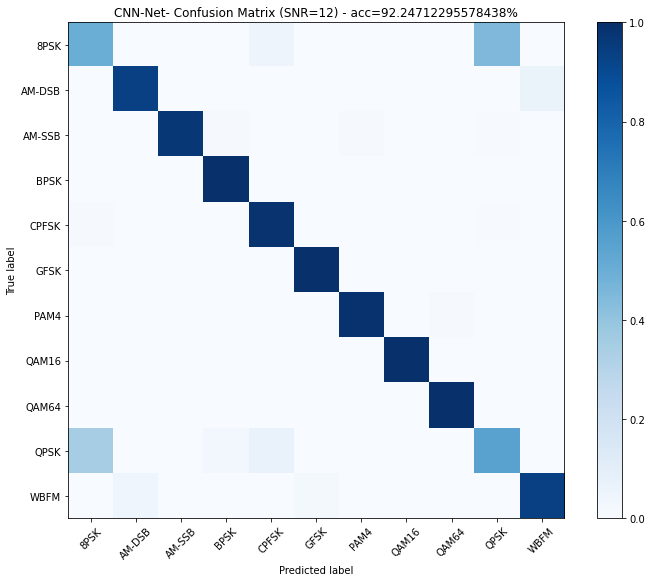

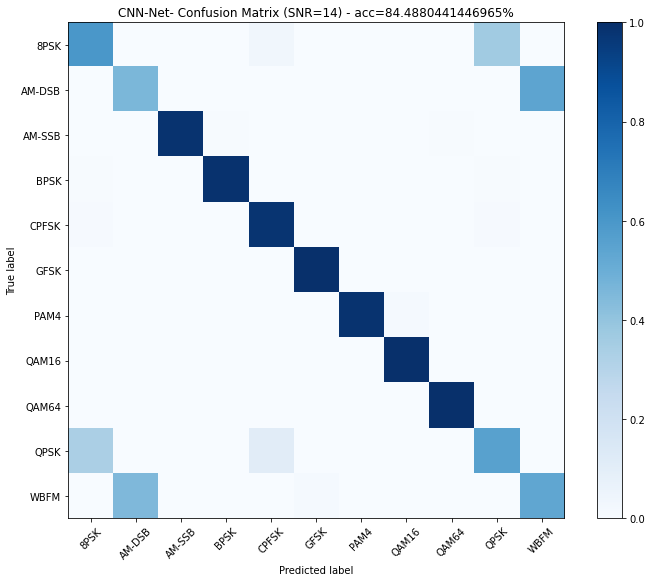

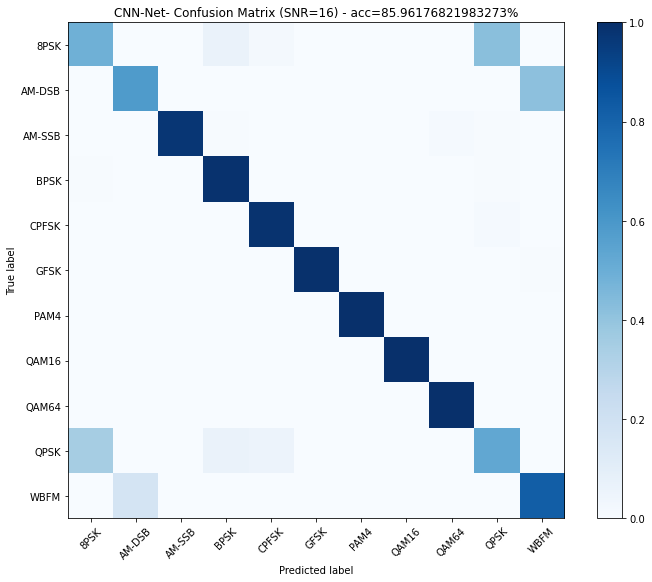

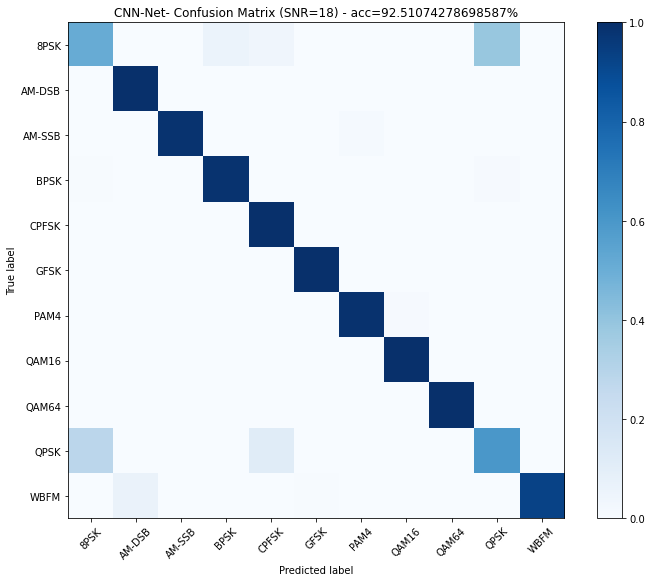

TypeError: ignored

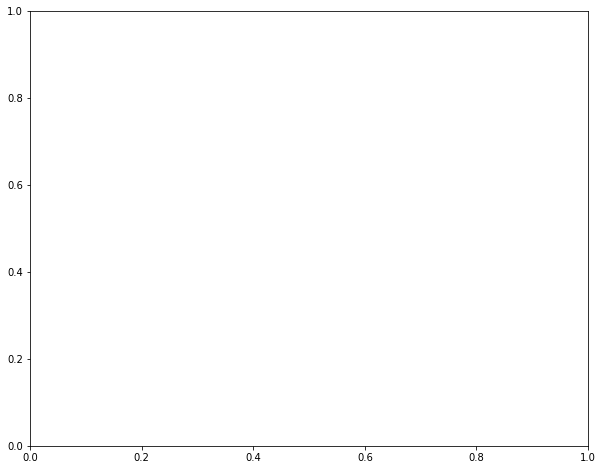

In [ ]:
model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 40, labels_test, labels, 'CNN-Net')

In [ ]:
def build_cnn_net():
  reg = 1e-3
  dropout = 0.2

  cnn_model = Sequential()
  cnn_model.add(Reshape((1,X.shape[1], X.shape[2]), input_shape=(X.shape[1], X.shape[2])))
  cnn_model.add(Convolution2D(64, (3,3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(96, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  cnn_model.add(Dropout(rate=dropout))
  cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))
  cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
batch_normalization_16 (Batc (None, 1, 2, 64)          256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 2, 96)          55392     
_________________________________________________________________
batch_normalization_17 (Batc (None, 1, 2, 96)          384       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 2, 128)         110720    
_________________________________________________________________
batch_normalization_18 (Batc (None, 1, 2, 128)       

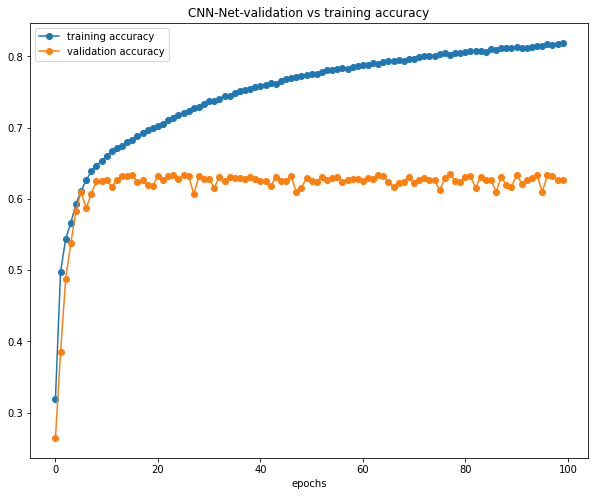

None

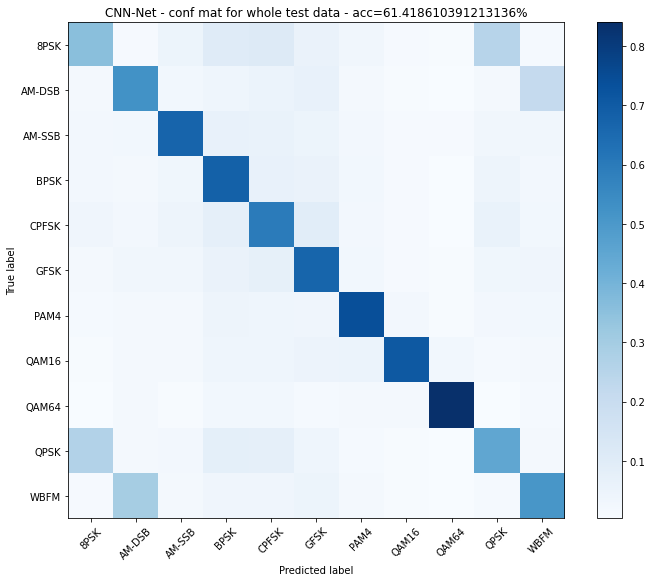

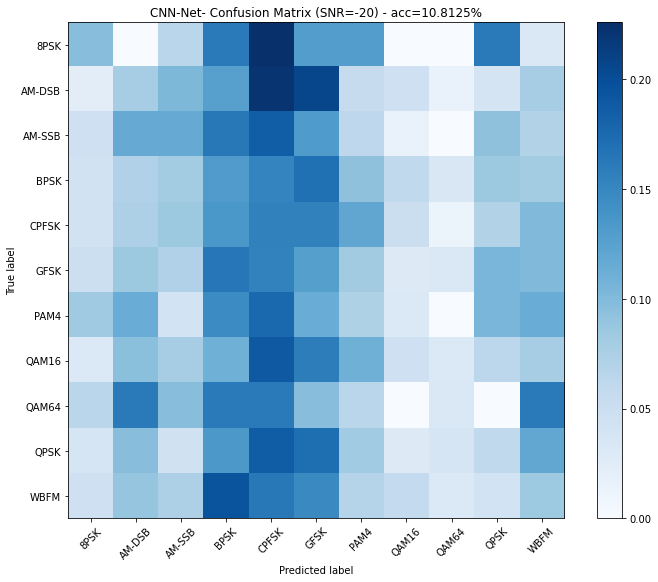

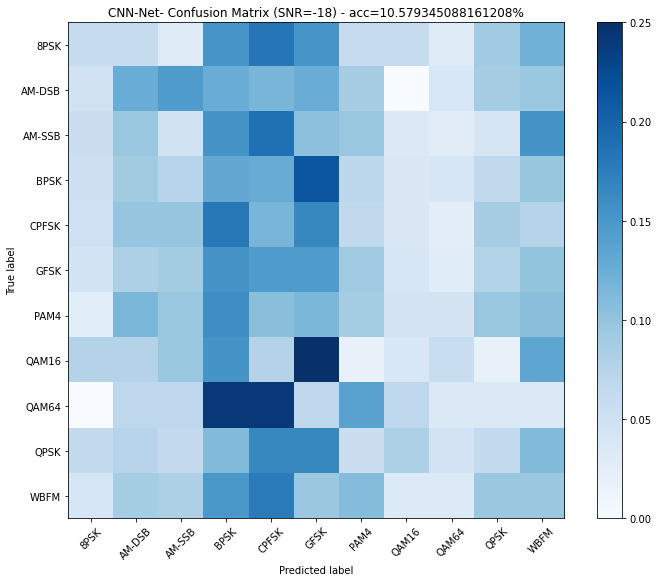

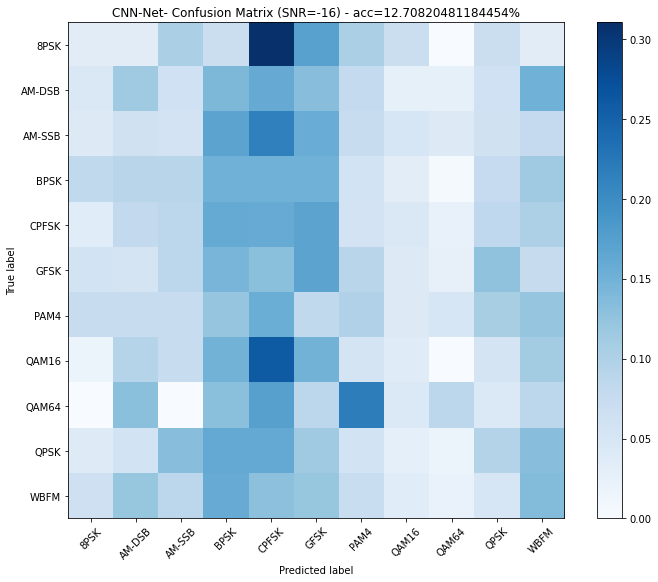

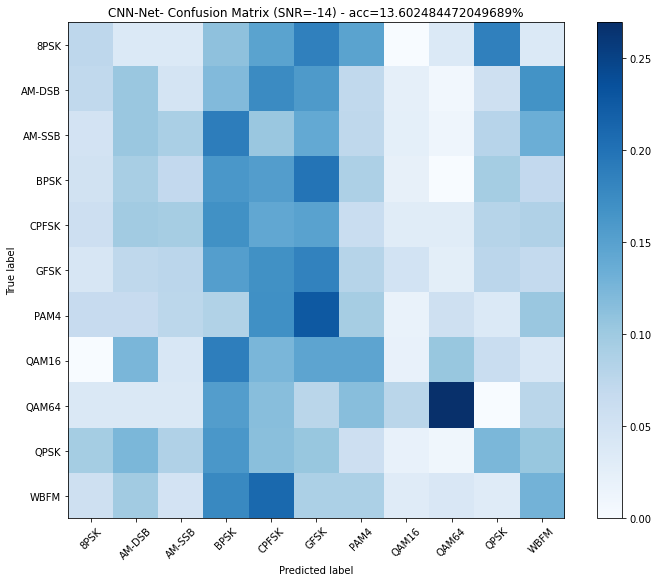

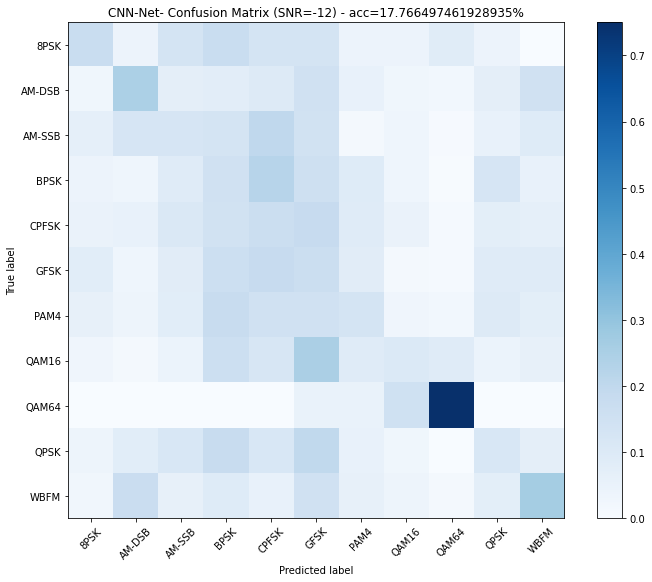

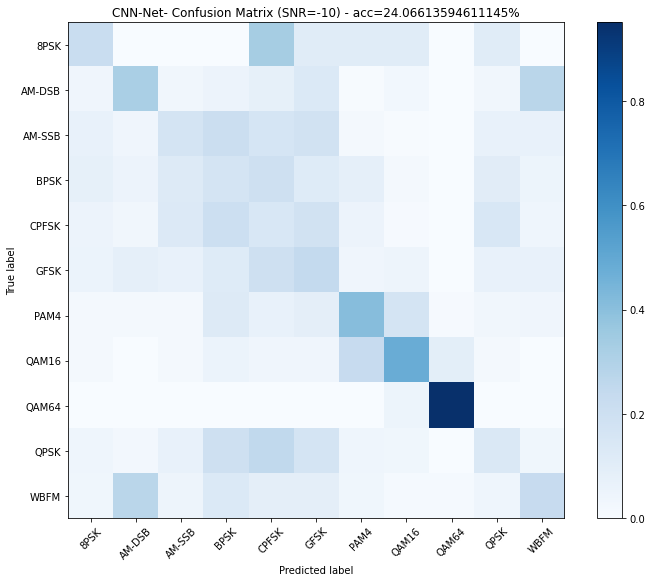

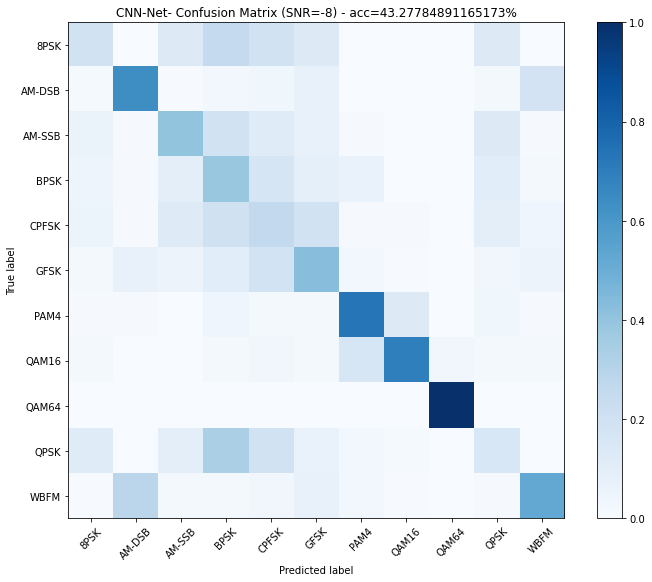

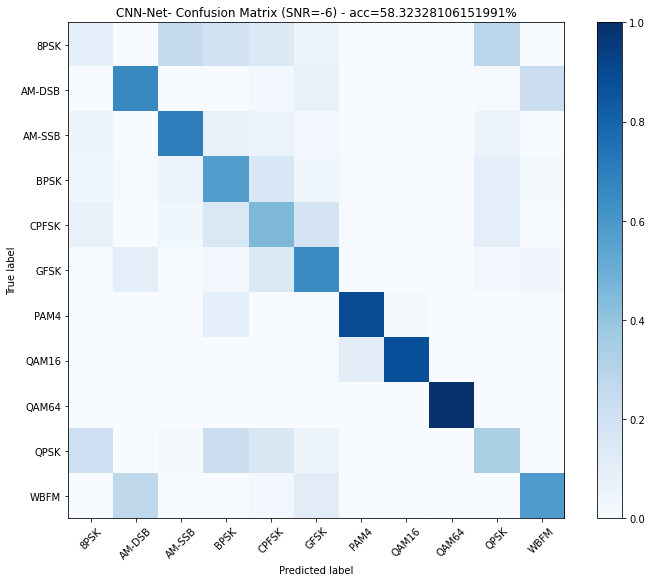

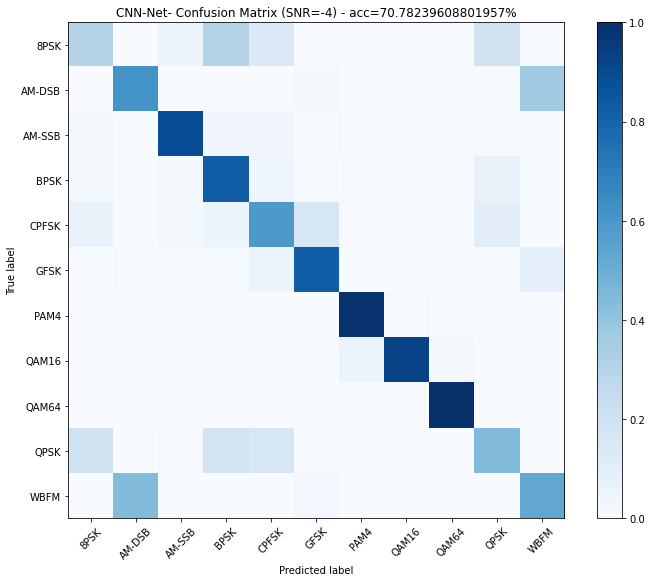

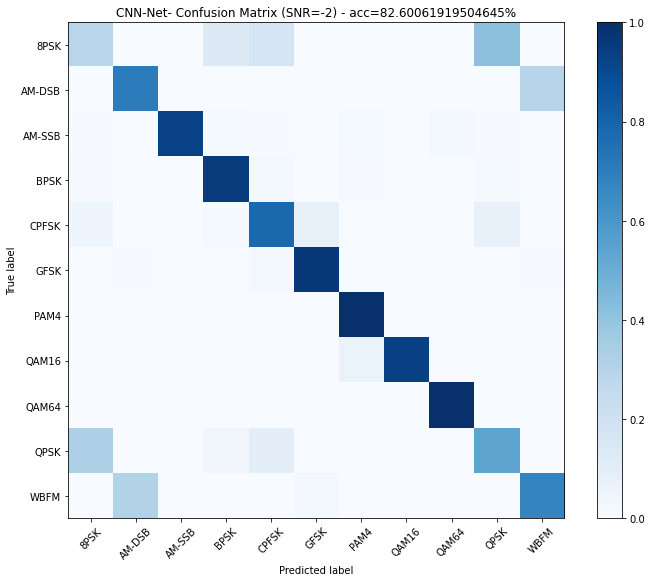

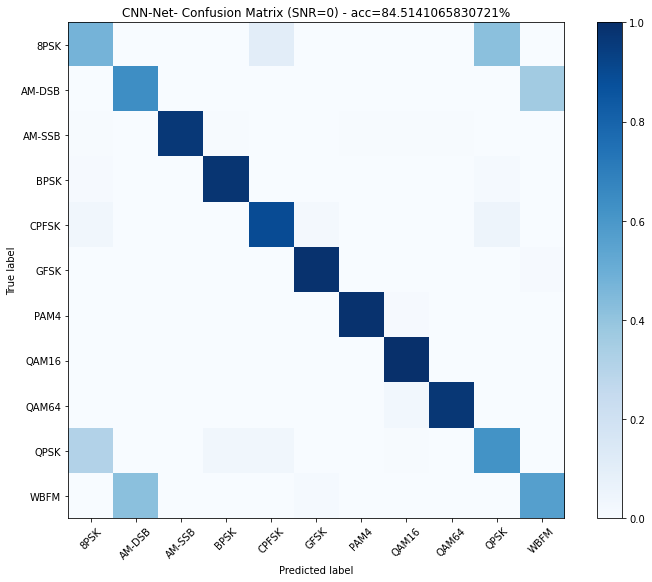

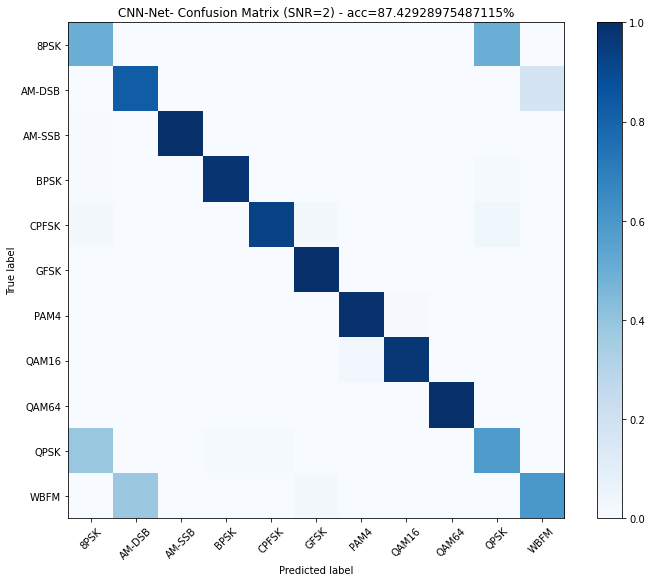

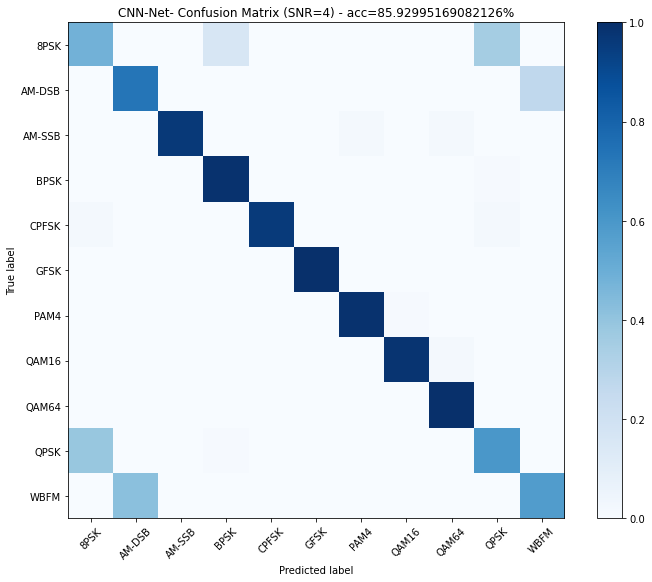

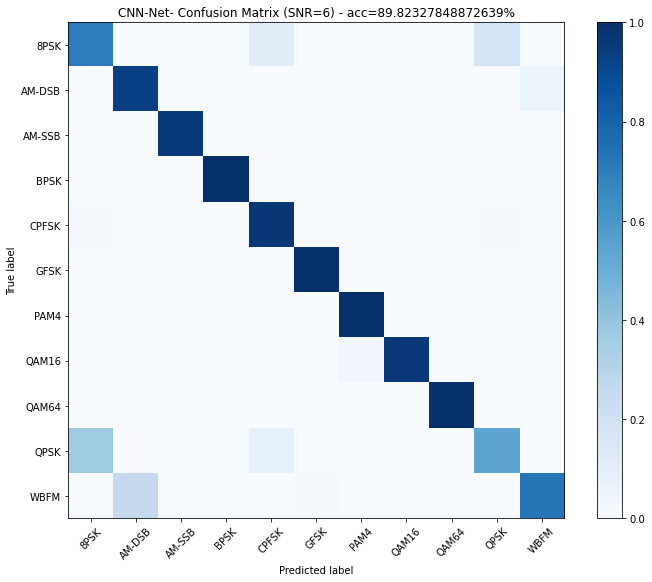

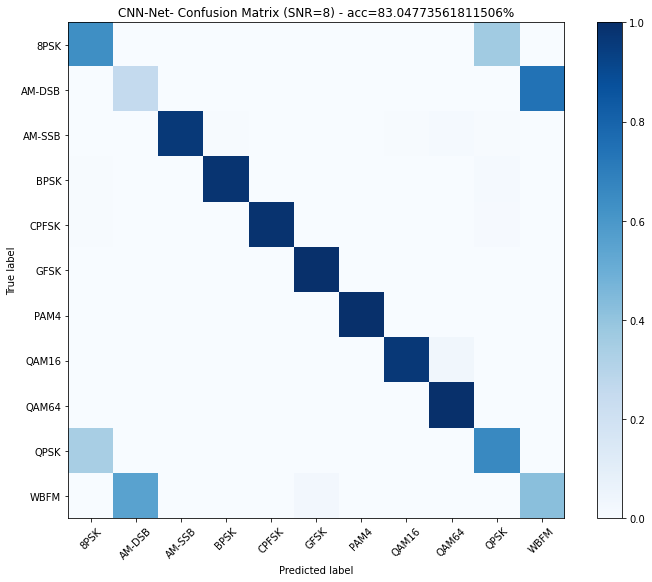

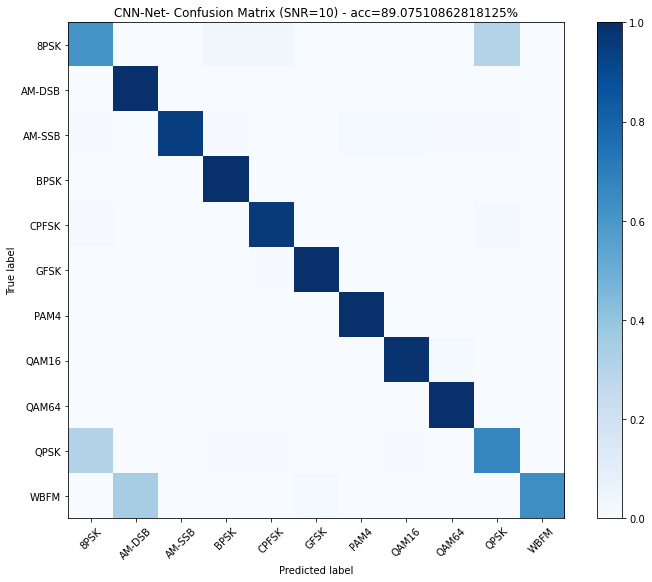

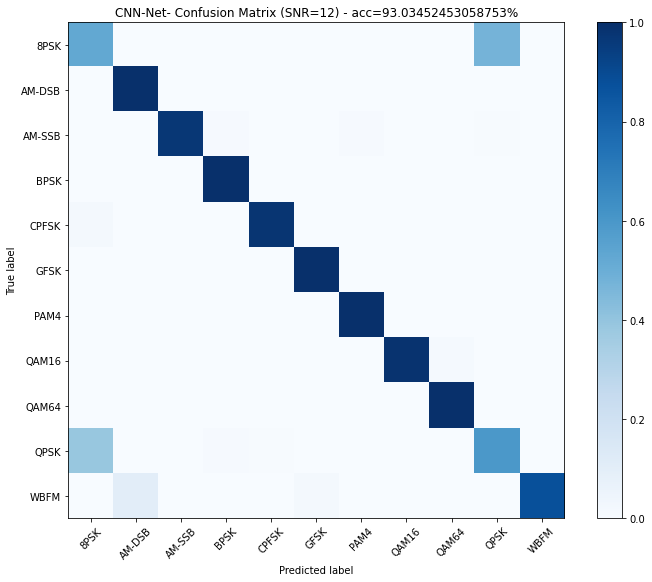

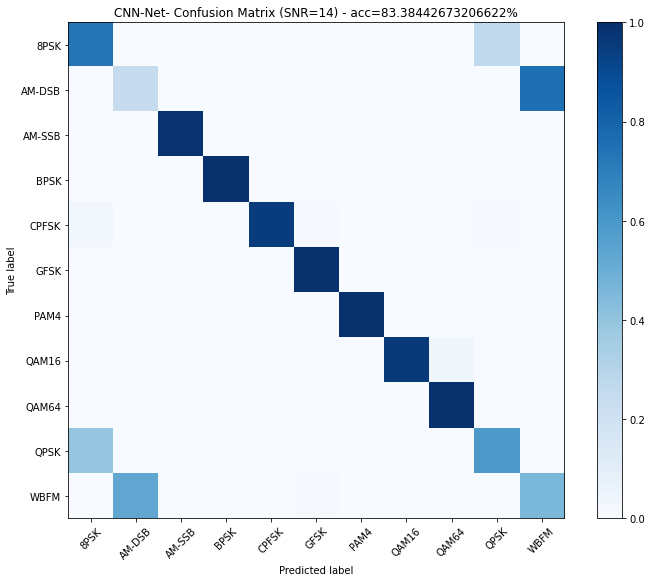

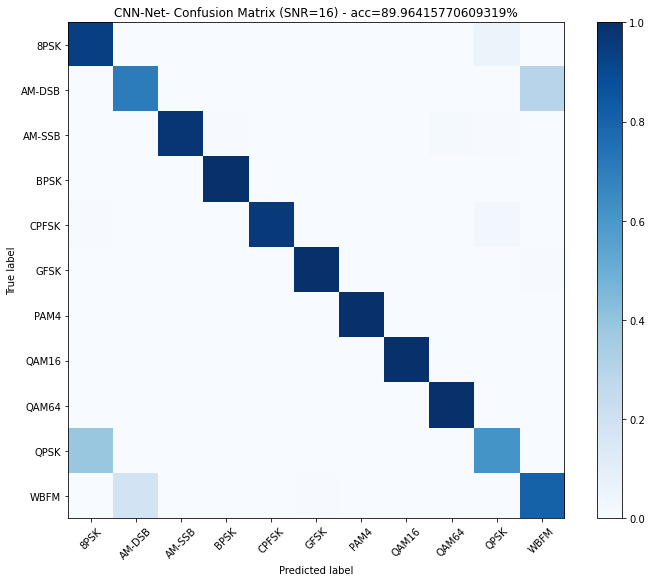

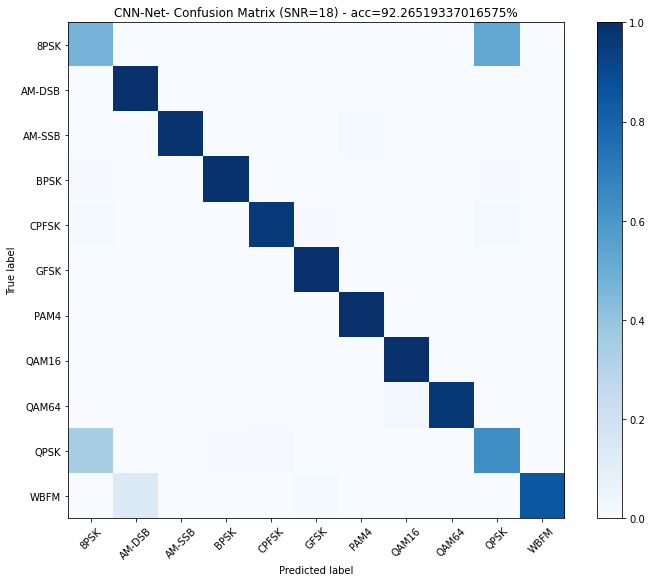

TypeError: ignored

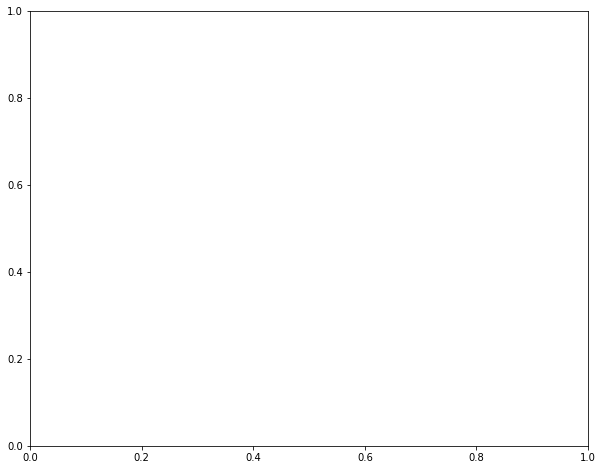

In [ ]:
model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 100, labels_test, labels, 'CNN-Net')

In [ ]:
def build_cnn_net():
  reg = 1e-3
  dropout = 0.2

  cnn_model = Sequential()
  cnn_model.add(Reshape((1,X.shape[1], X.shape[2]), input_shape=(X.shape[1], X.shape[2])))
  cnn_model.add(Convolution2D(64, (3,3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(96, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(256, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  cnn_model.add(Dropout(rate=dropout))
  cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))
  cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
batch_normalization_19 (Batc (None, 1, 2, 64)          256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 2, 96)          55392     
_________________________________________________________________
batch_normalization_20 (Batc (None, 1, 2, 96)          384       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 2, 128)         110720    
_________________________________________________________________
batch_normalization_21 (Batc (None, 1, 2, 128)       

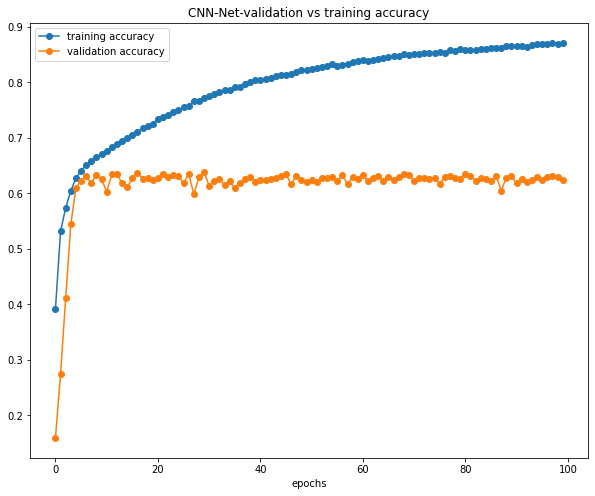

None

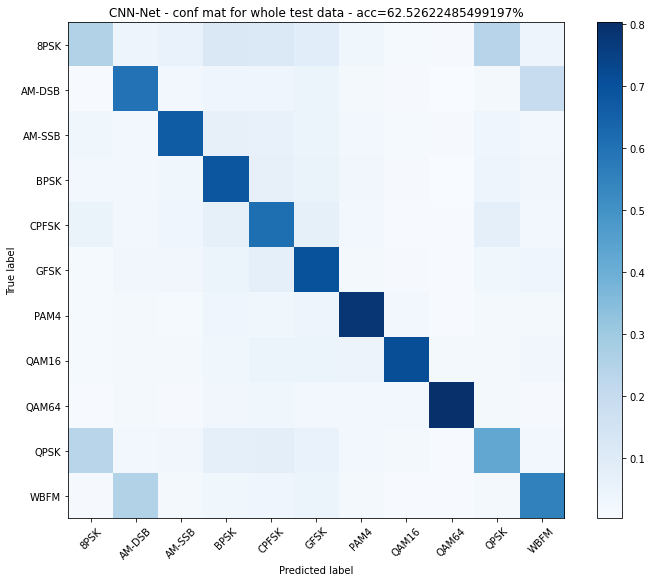

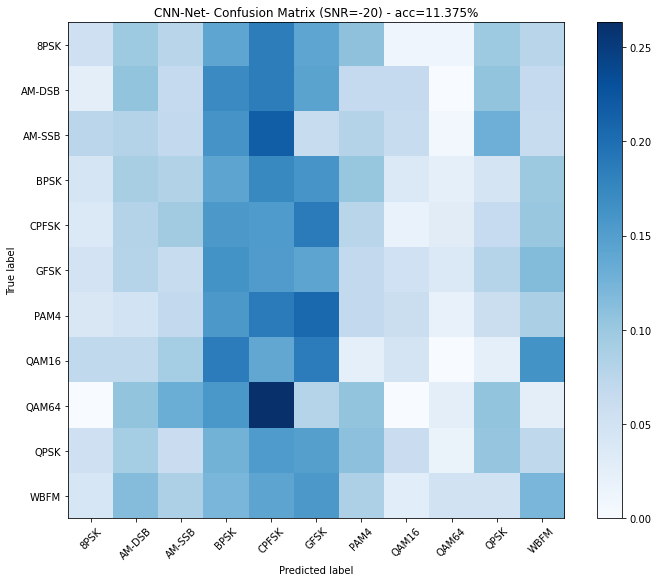

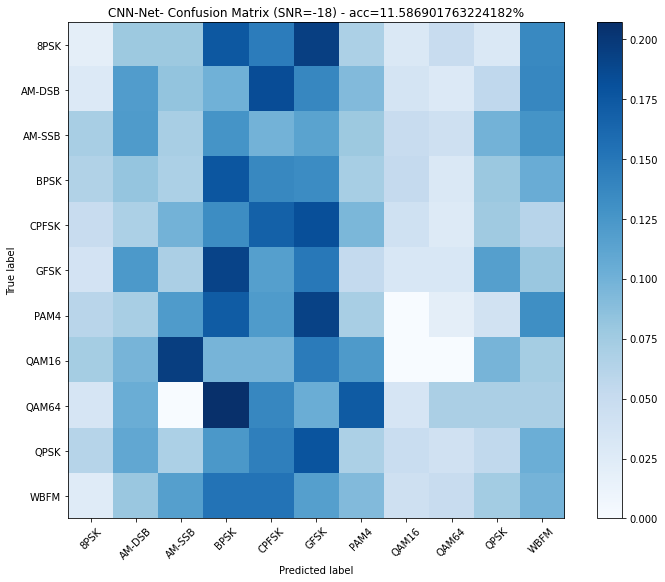

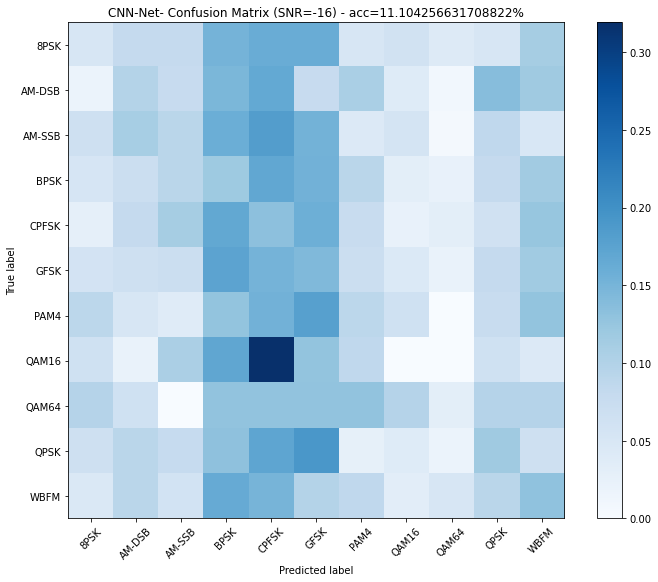

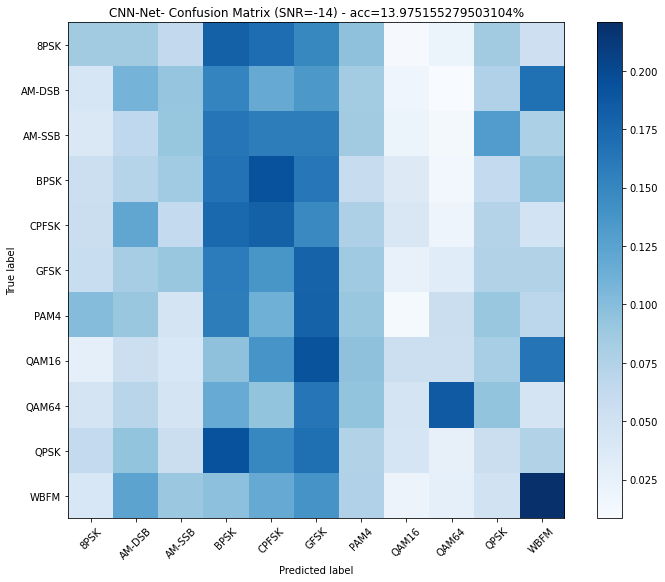

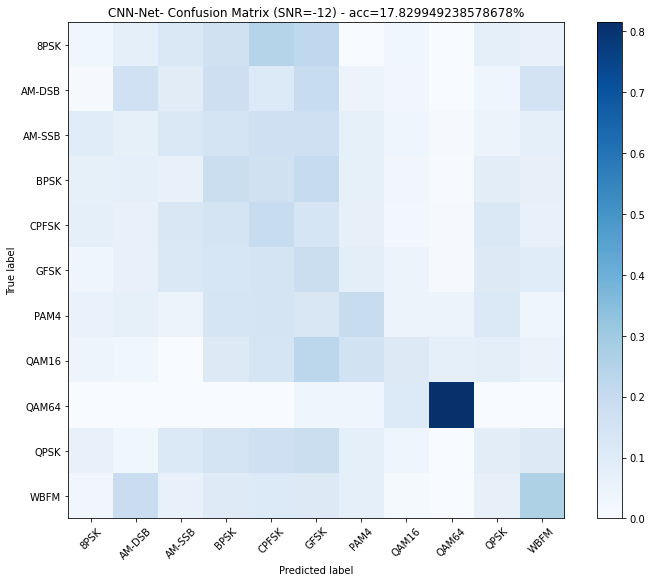

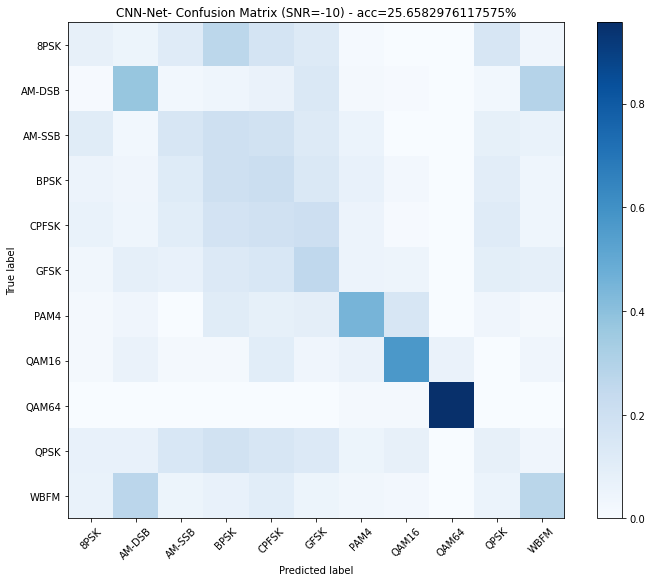

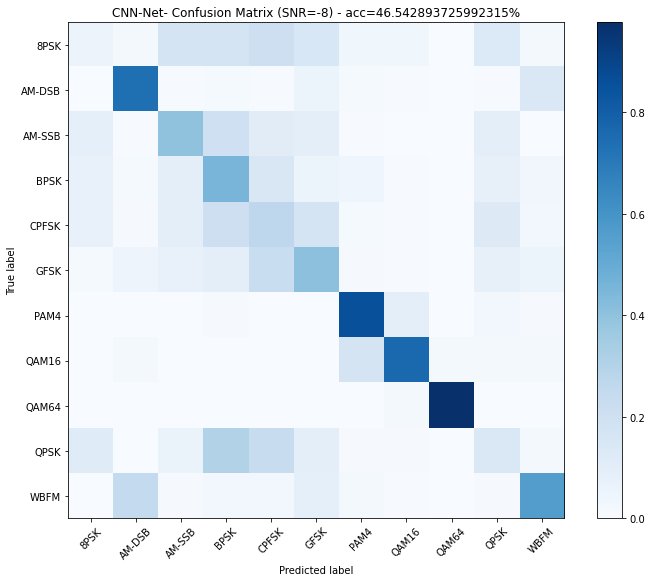

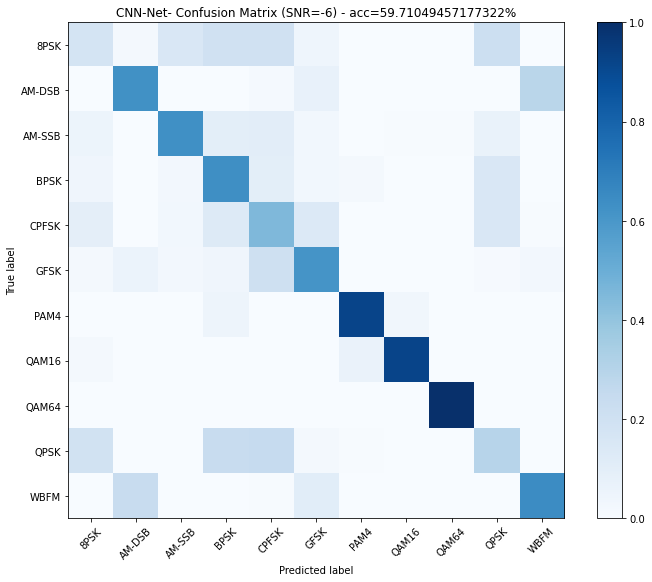

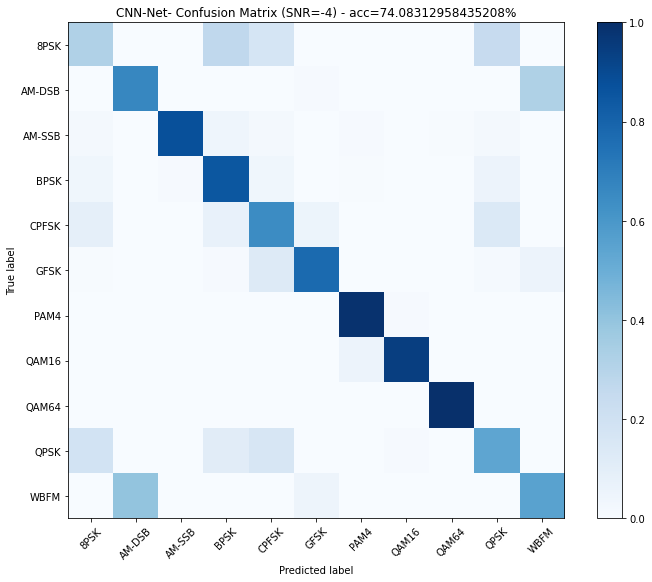

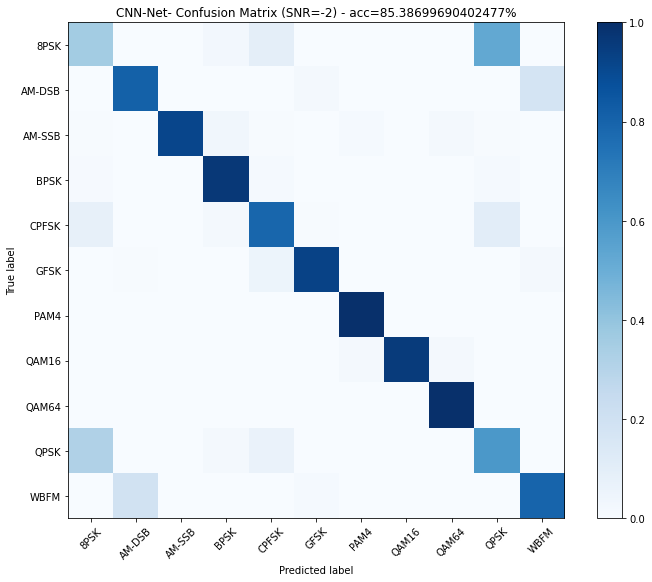

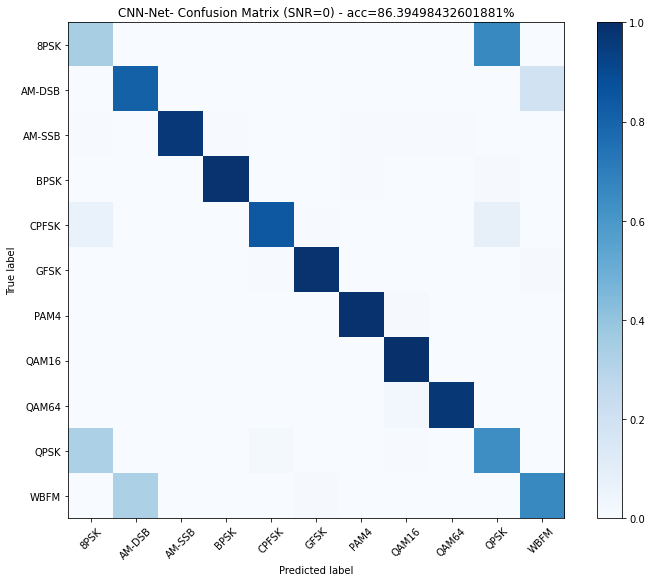

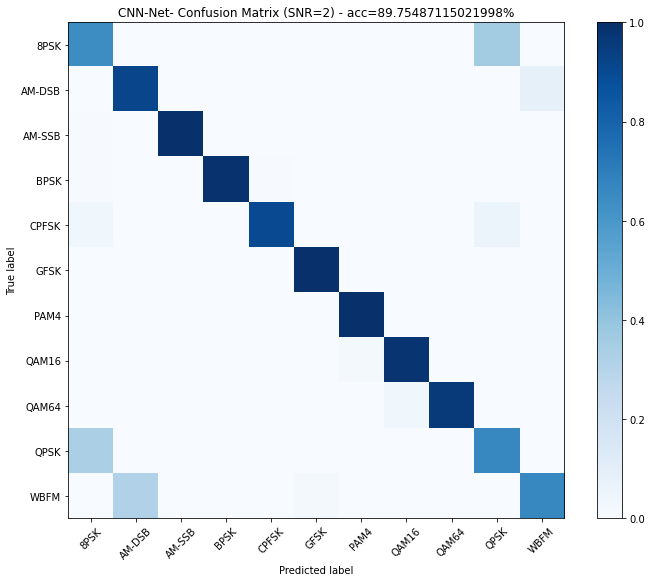

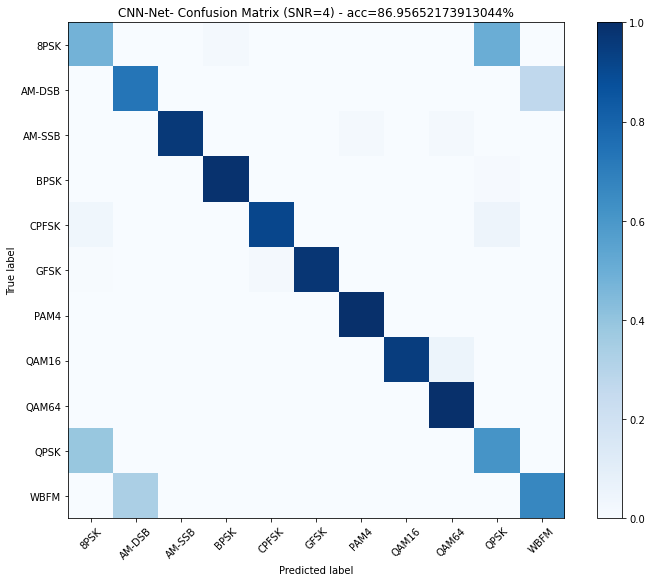

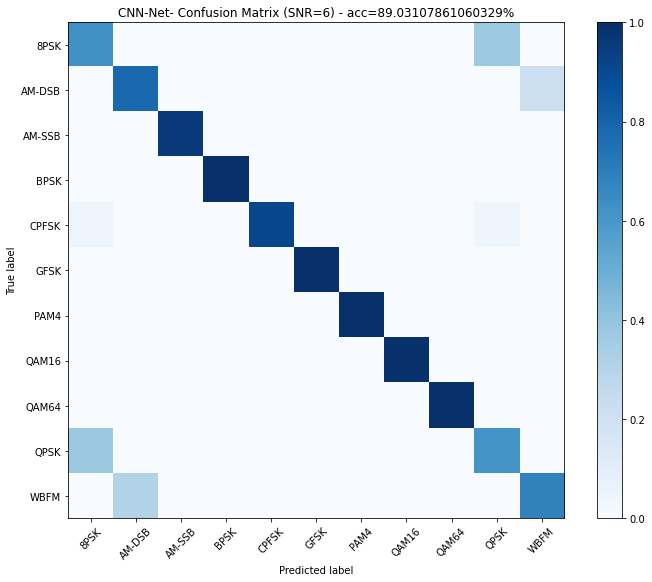

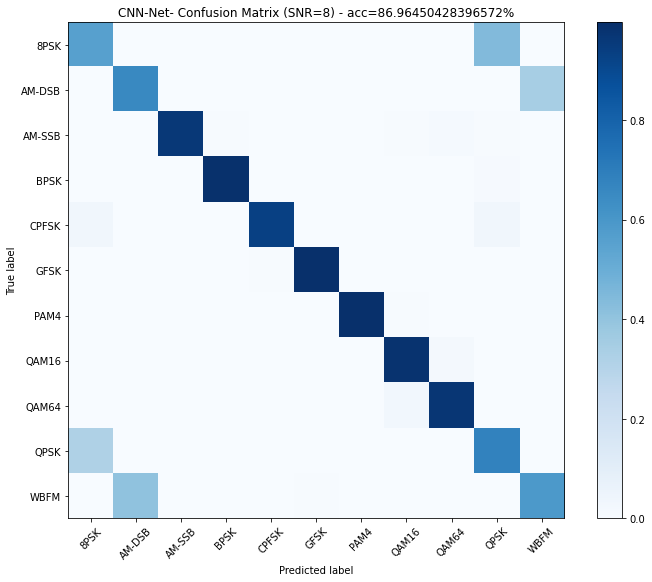

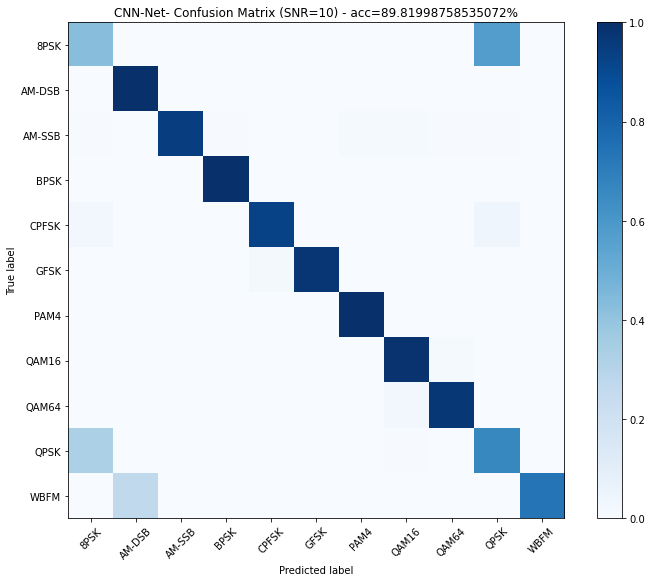

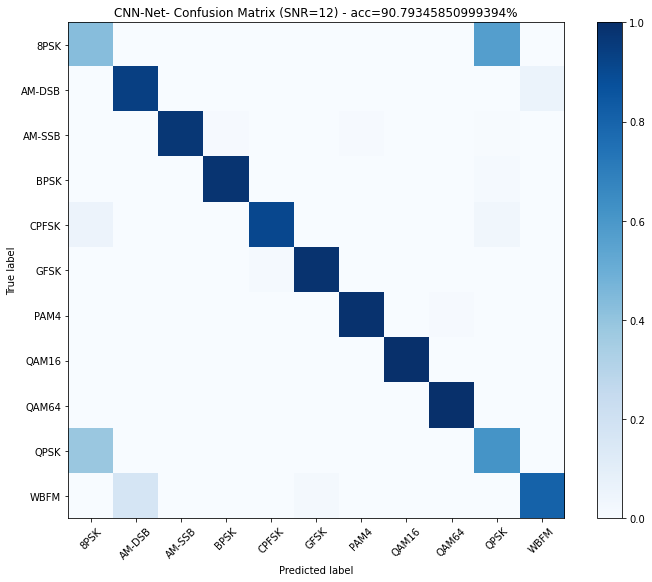

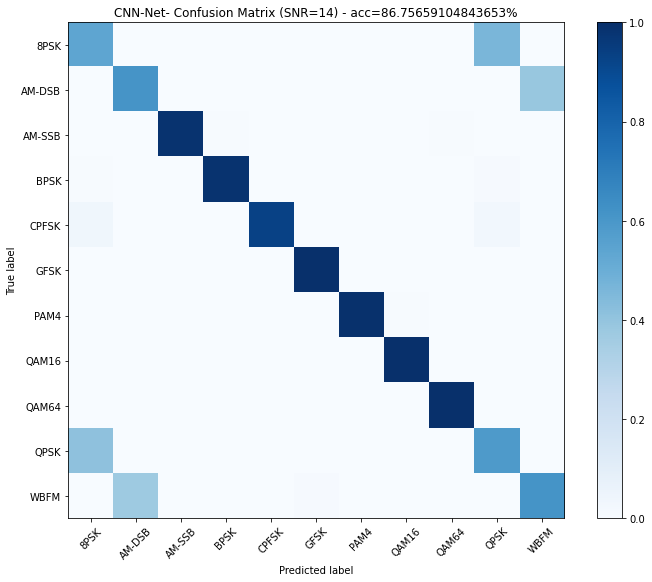

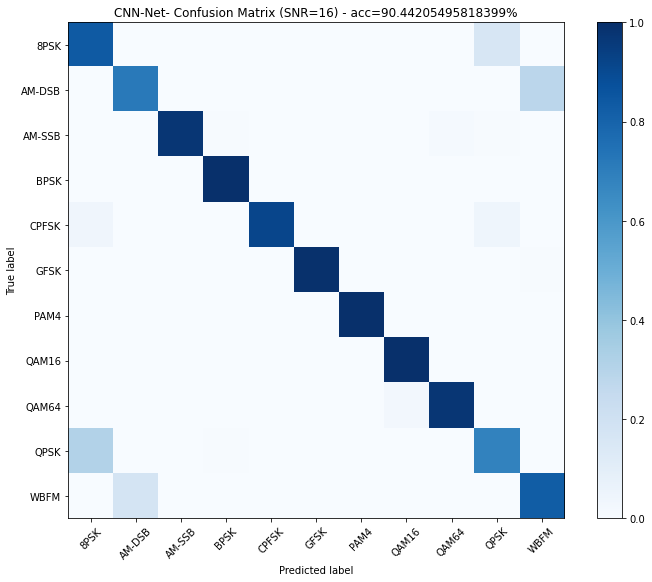

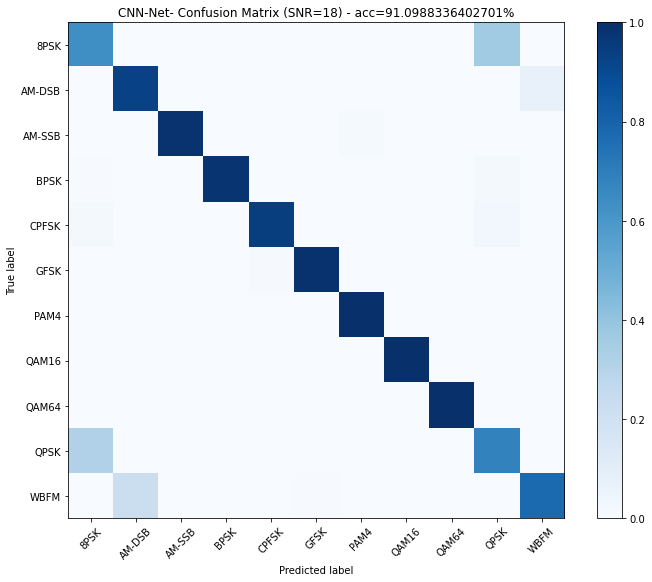

TypeError: ignored

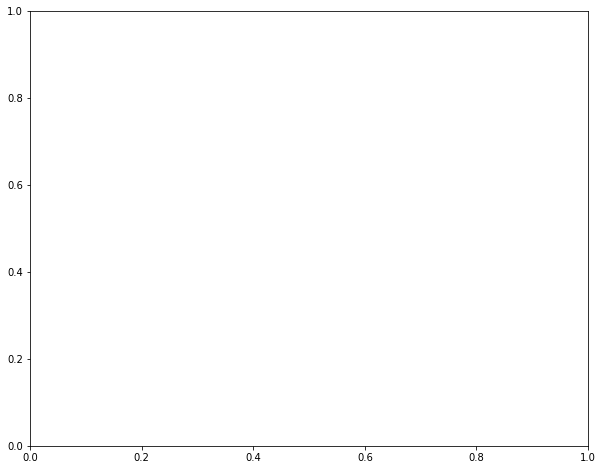

In [ ]:
model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 100, labels_test, labels, 'CNN-Net')

In [ ]:
def build_cnn_net():
  reg = 1e-3
  dropout = 0.2

  cnn_model = Sequential()
  cnn_model.add(Reshape((1,X.shape[1], X.shape[2]), input_shape=(X.shape[1], X.shape[2])))
  cnn_model.add(Convolution2D(64, (3,3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(96, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(128, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(256, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Convolution2D(512, (3, 3), padding="same", activation='relu'))
  cnn_model.add(BatchNormalization())
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(reg)))
  cnn_model.add(Dropout(rate=dropout))
  cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))
  cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 2, 64)          73792     
_________________________________________________________________
batch_normalization_23 (Batc (None, 1, 2, 64)          256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 2, 96)          55392     
_________________________________________________________________
batch_normalization_24 (Batc (None, 1, 2, 96)          384       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 2, 128)         110720    
_________________________________________________________________
batch_normalization_25 (Batc (None, 1, 2, 128)       

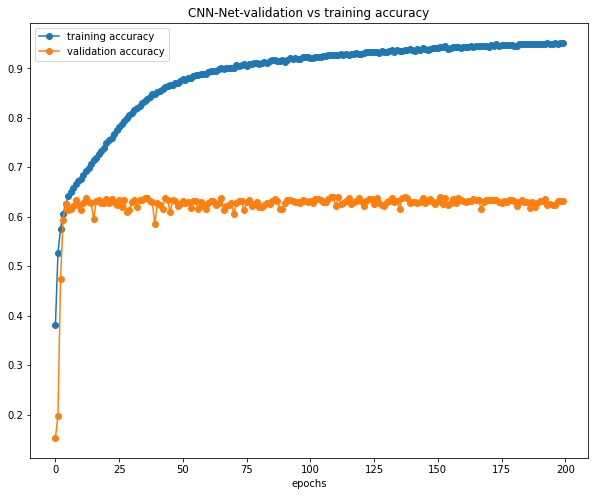

None

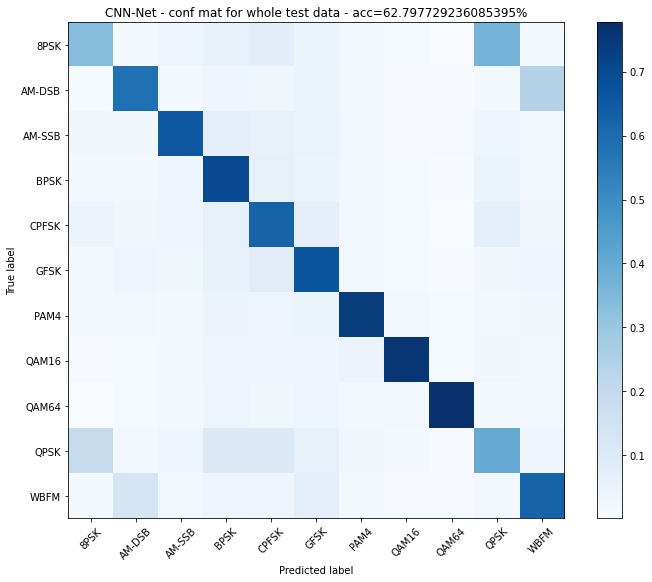

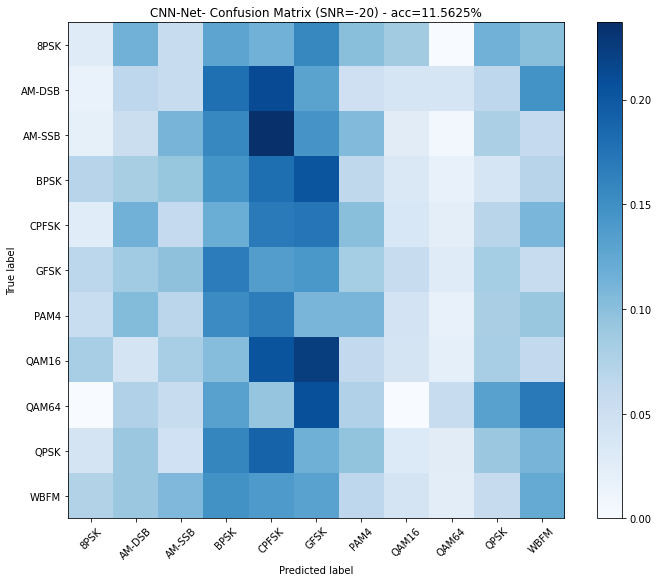

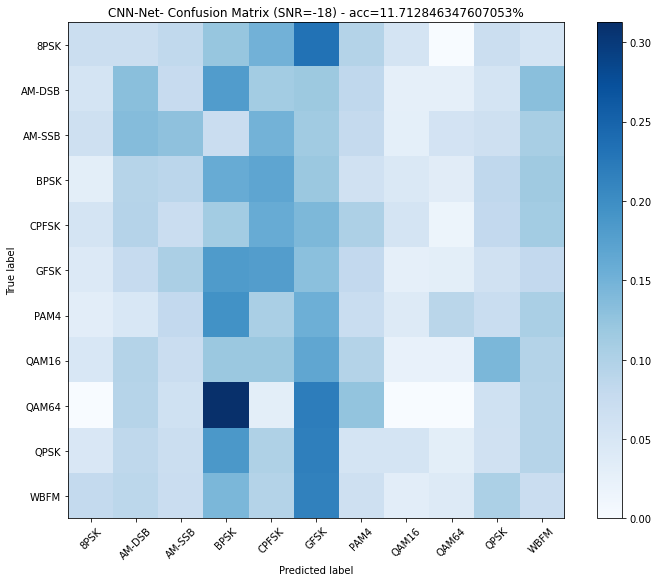

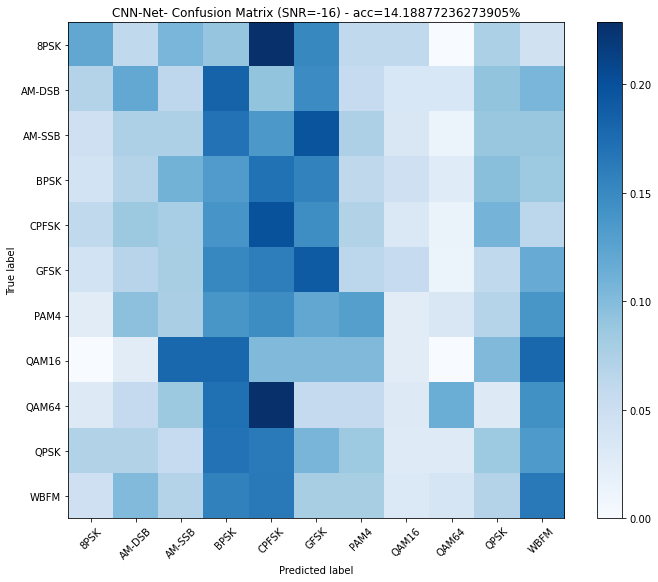

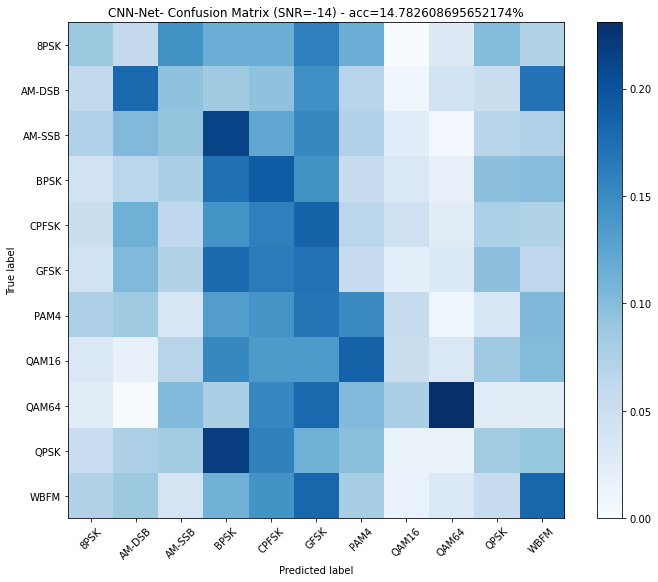

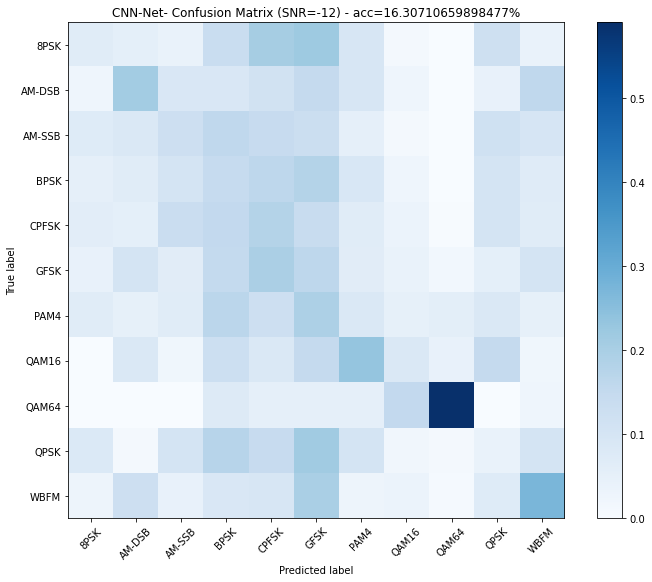

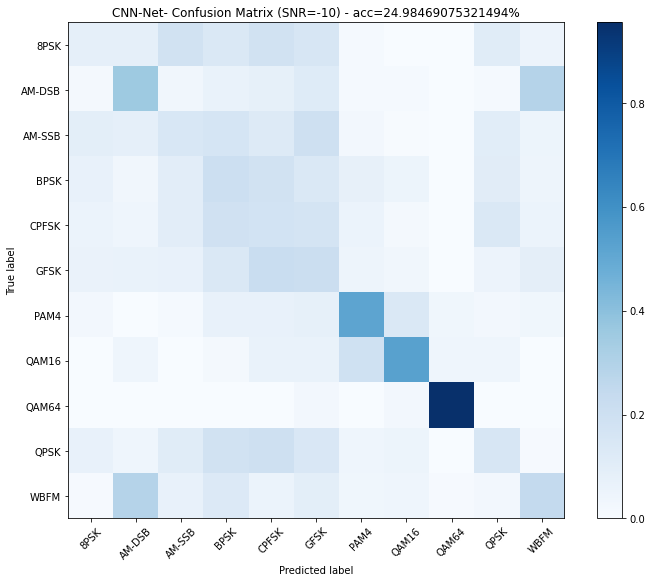

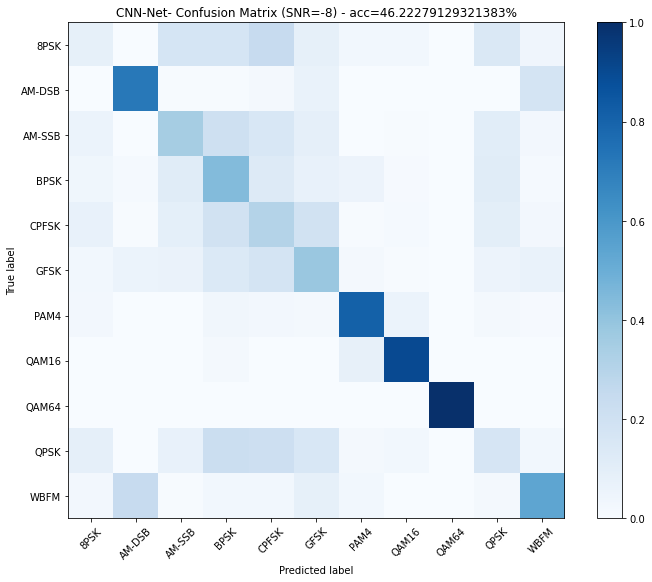

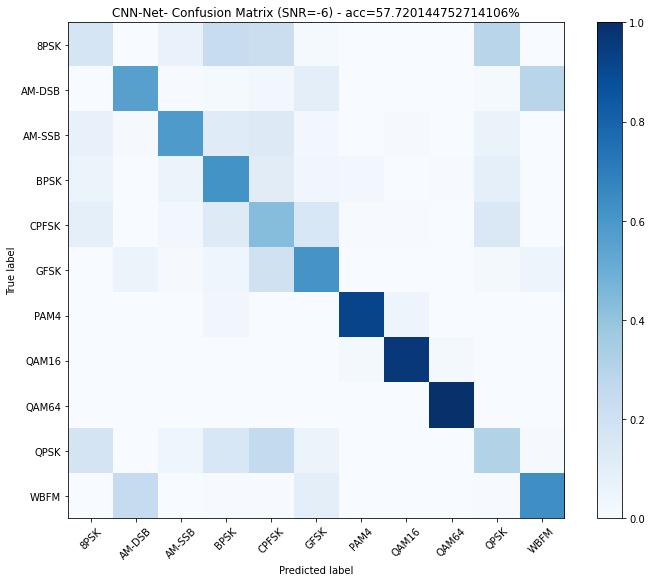

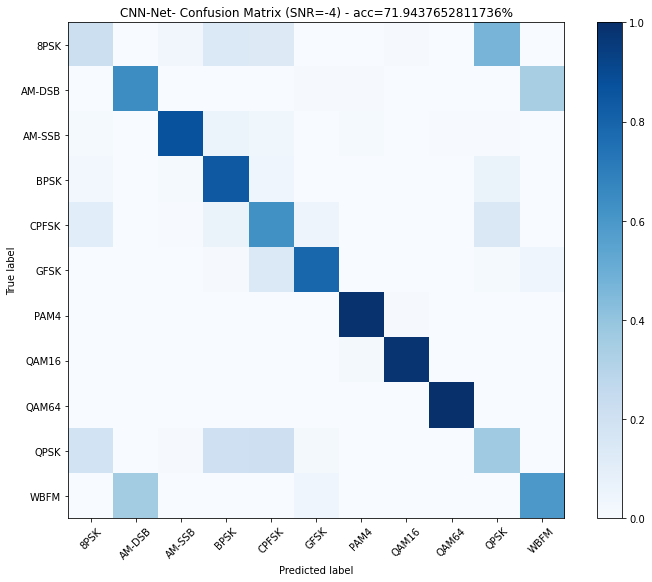

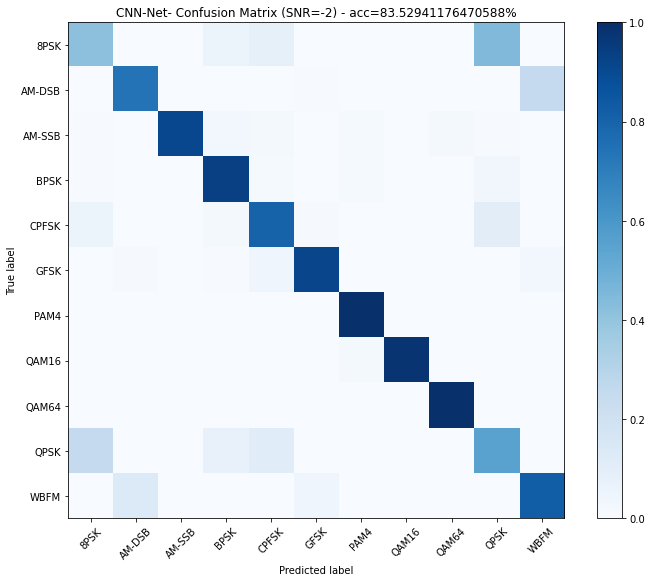

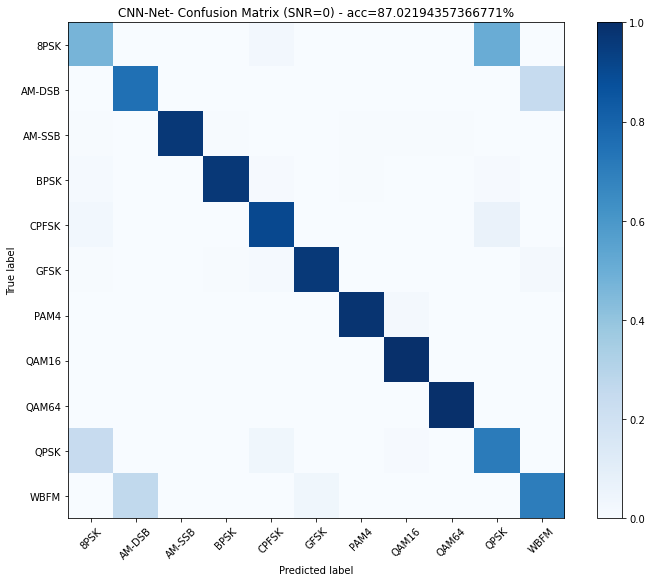

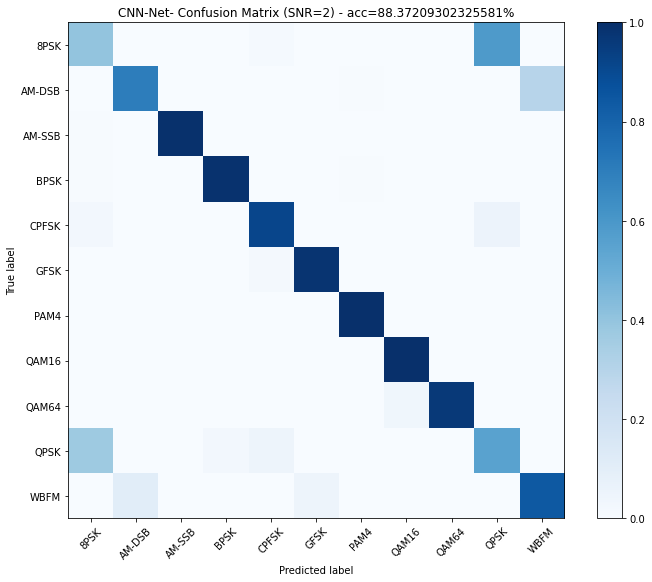

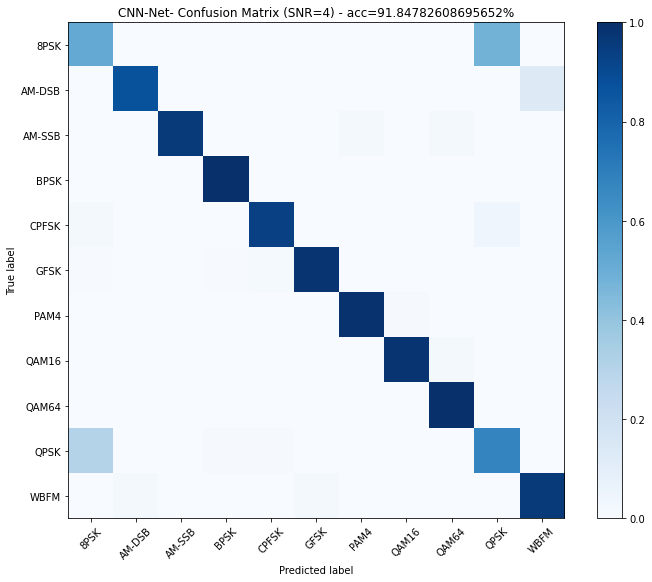

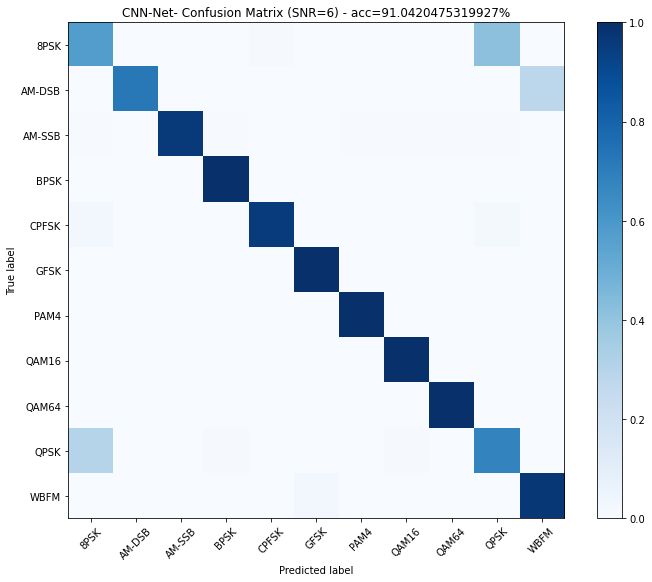

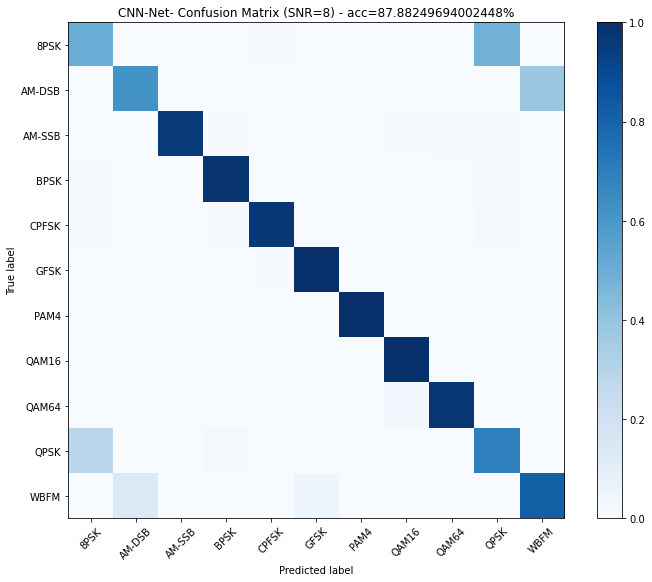

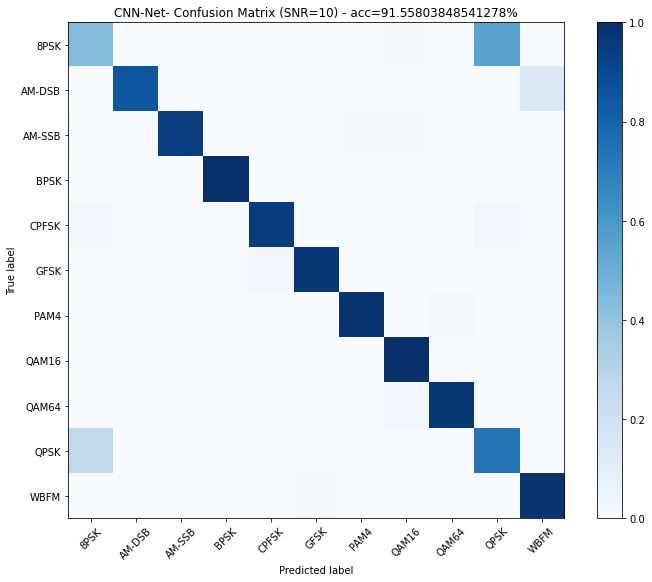

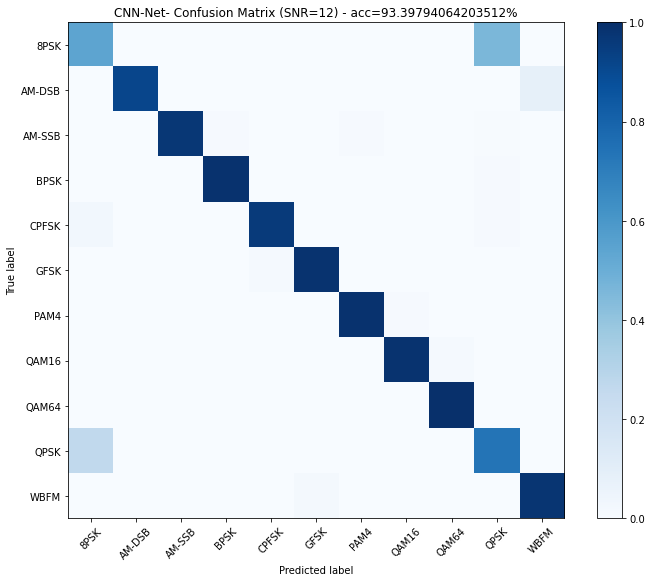

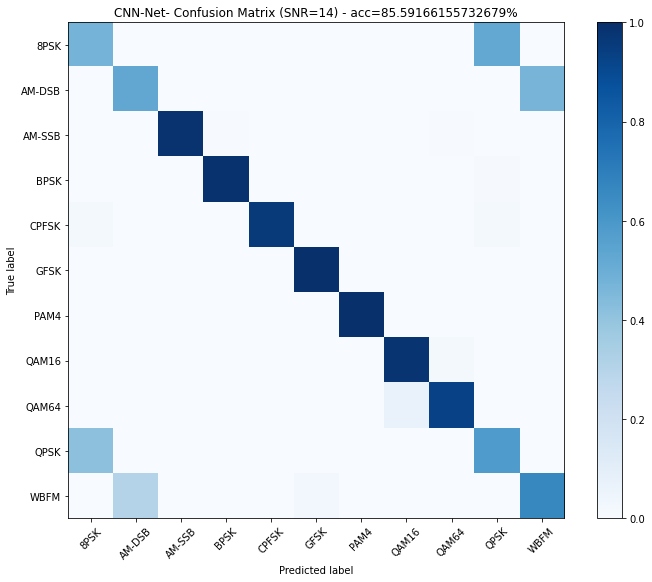

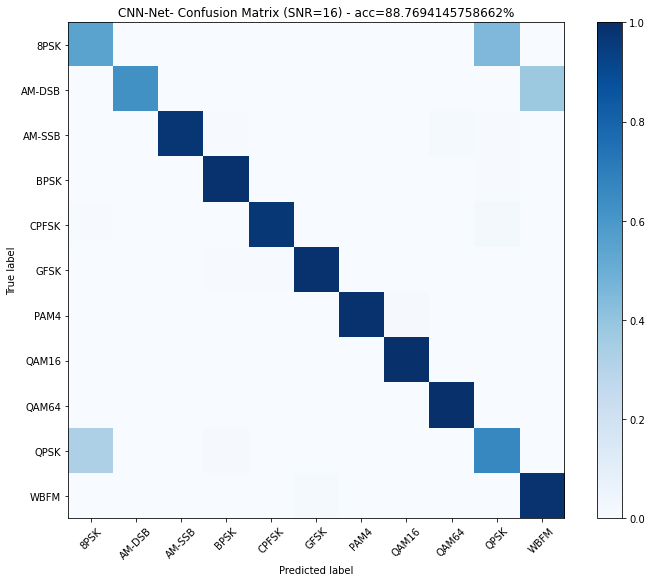

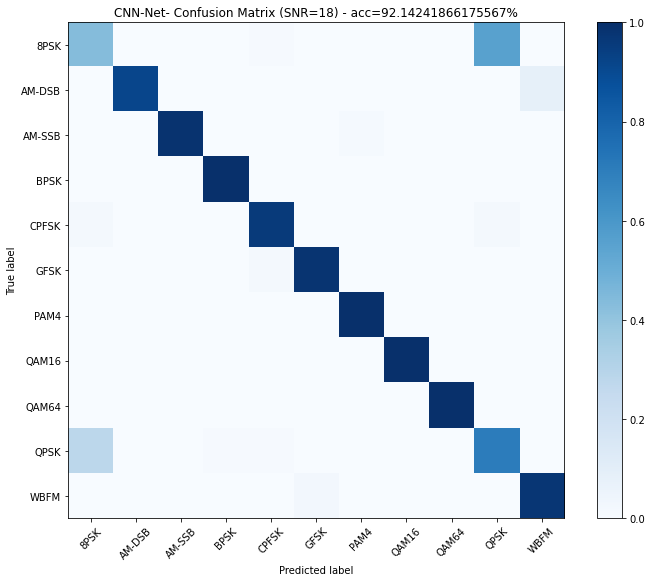

TypeError: ignored

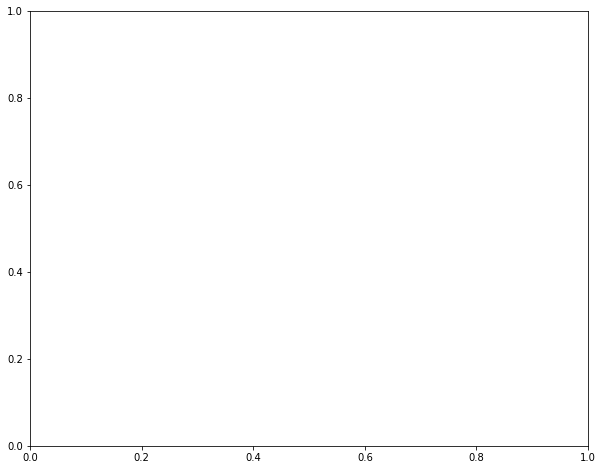

In [ ]:
model = build_cnn_net()
evaluate_model(model, X_train, y_train, X_test, y_test, VALIDATION_PERCENTAGE, BATCH_SIZE, 200, labels_test, labels, 'CNN-Net')

In [ ]:
!ls

 CNN-accuHist.npy		        labels.csv
 CNN-lossHist.npy		        LICENSE.TXT
'CNN_LSTM Training performance.png'     model-CNN-Net.h5
 CNN-valAccuHist.npy		        model.h5
 CNN-valLossHist.npy		        model.json
 CNN-Weights_best.h5		        my_modelColectral.h5
 Colectral.h5			        my_modelVGGColectral.h5
 convmodrecnets_CNN2_0.5.wts.h5         newmodel.h5
 hmnist_28_28_L.csv		        results_all_CNN_LSTM_d0.5.dat
 hmnist_28_28_RGB.csv		        results_cnn2_d0.5.dat
 hmnist_64_64_L.csv		        RML2016.10a_dict.pkl
 hmnist_8_8_L.csv		        RML2016.10a.tar
 hmnist_8_8_RGB.csv		        RML2016.10a.tar.bz2
 kaggle.json			        RML2016.10b.dat
 kather_texture_2016_image_tiles_5000   RML2016.10b.tar.bz2
 Kather_texture_2016_image_tiles_5000  'RML2016 (1).10b.dat'
 kather_texture_2016_larger_images_10   spect.png
 Kather_texture_2016_larger_images_10   spectrograms.csv


In [ ]:
import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
import math
import numpy as np
import matplotlib.pyplot as plt
import  random, sys, keras
import _pickle as cpickle
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import pickle

In [ ]:
# Load the dataset
#  from a certain local path
with open('RML2016.10a_dict.pkl','rb') as f:
  Xd = pickle.load(f,encoding='bytes')
print("Dataset imported")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):
            lbl.append((mod,snr))

X = np.vstack(X)

Dataset imported


In [ ]:
print ("Dataset formatted into shape: ",X.shape)
# print out the snrs and mods
print ("Dataset with SNRs: ",snrs)
print ("Dataset with Modulations: ",mods)
print ("Data prepared")


Dataset formatted into shape:  (220000, 2, 128)
Dataset with SNRs:  [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Dataset with Modulations:  [b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
Data prepared


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



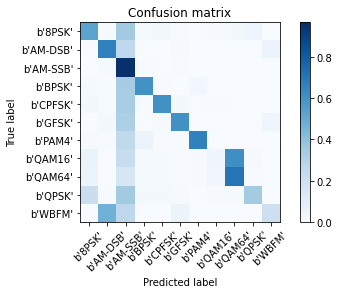

In [ ]:
# Plot confusion matrix for the whole dataset
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

